# Actuarial Loss Prediction

#### Exploration, engineering, modeling, prediction and explanation of workers' compensation claims. 


### Data Description 
#### The dataset is downloaded from Kaggle "Actuarial loss prediction". It includes 90,000 realistic, synthetically generated worker compensation insurance policies, all of which have had an accident. For each record there is demographic and worker related information, as well as a text description of the accident.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [209]:
# Read the CSV data file
df = pd.read_csv('train.csv')
df.head(3)

ClaimNumber    DateTimeOfAccident          DateReported  Age Gender  \
0   WC8285054  2002-04-09T07:00:00Z  2002-07-05T00:00:00Z   48      M   
1   WC6982224  1999-01-07T11:00:00Z  1999-01-20T00:00:00Z   43      F   
2   WC5481426  1996-03-25T00:00:00Z  1996-04-14T00:00:00Z   30      M   

  MaritalStatus  DependentChildren  DependentsOther  WeeklyWages  \
0             M                  0                0       500.00   
1             M                  0                0       509.34   
2             U                  0                0       709.10   

  PartTimeFullTime  HoursWorkedPerWeek  DaysWorkedPerWeek  \
0                F                38.0                  5   
1                F                37.5                  5   
2                F                38.0                  5   

                                    ClaimDescription  \
0  LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY   
1  STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...   
2                   CUT ON SHARP EDGE CUT LEFT THUMB   

   InitialIncurredCalimsCost  UltimateIncurredClaimCost  
0                       1500                4748.203388  
1                       5500                6326.285819  
2                       1700                2293.949087

In [210]:
# Rename incorrect column name
df.rename(columns={"InitialIncurredCalimsCost":"InitialIncurredClaimsCost"}, inplace=True)

In [211]:
# Data size
df.shape

(54000, 15)

In [212]:
# Drop any duplicate entry
df.drop_duplicates(inplace=True)

In [213]:
# Data size
df.shape

(54000, 15)

In [214]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 0 to 53999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                54000 non-null  object 
 1   DateTimeOfAccident         54000 non-null  object 
 2   DateReported               54000 non-null  object 
 3   Age                        54000 non-null  int64  
 4   Gender                     54000 non-null  object 
 5   MaritalStatus              53971 non-null  object 
 6   DependentChildren          54000 non-null  int64  
 7   DependentsOther            54000 non-null  int64  
 8   WeeklyWages                54000 non-null  float64
 9   PartTimeFullTime           54000 non-null  object 
 10  HoursWorkedPerWeek         54000 non-null  float64
 11  DaysWorkedPerWeek          54000 non-null  int64  
 12  ClaimDescription           54000 non-null  object 
 13  InitialIncurredClaimsCost  54000 non-null  int

In [215]:
# Some stats
df.describe().T

count          mean           std         min  \
Age                        54000.0     33.842370     12.122165   13.000000   
DependentChildren          54000.0      0.119185      0.517780    0.000000   
DependentsOther            54000.0      0.009944      0.109348    0.000000   
WeeklyWages                54000.0    416.364807    248.638669    1.000000   
HoursWorkedPerWeek         54000.0     37.735084     12.568704    0.000000   
DaysWorkedPerWeek          54000.0      4.905759      0.552129    1.000000   
InitialIncurredClaimsCost  54000.0   7841.146019  20584.075006    1.000000   
UltimateIncurredClaimCost  54000.0  11003.369169  33390.991292  121.886805   

                                  25%         50%          75%          max  
Age                         23.000000    32.00000    43.000000       81.000  
DependentChildren            0.000000     0.00000     0.000000        9.000  
DependentsOther              0.000000     0.00000     0.000000        5.000  
WeeklyWages                200.000000   392.20000   500.000000     7497.000  
HoursWorkedPerWeek          38.000000    38.00000    40.000000      640.000  
DaysWorkedPerWeek            5.000000     5.00000     5.000000        7.000  
InitialIncurredClaimsCost  700.000000  2000.00000  9500.000000  2000000.000  
UltimateIncurredClaimCost  926.338449  3371.24173  8197.248648  4027135.935

### Missing value imputation

In [216]:
# check missing values in every column
df.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                29
DependentChildren             0
DependentsOther               0
WeeklyWages                   0
PartTimeFullTime              0
HoursWorkedPerWeek            0
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredClaimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

#### 29 missing values in the Marital Status column

In [217]:
# Categories of marital status
df["MaritalStatus"].value_counts(dropna = False)

S      26161
M      22516
U       5294
NaN       29
Name: MaritalStatus, dtype: int64

#### Various ways to deal with missing data:
    i) Exclude rows with missing values 
    ii) Imputation of missing values with some operation of existing values (constant, mean, median, etc)
    iii) "Smart" imputing by using a trained model to guess missing values
    iV) Use multiple-copula imputation.

In [218]:
# Import
from sklearn.impute import SimpleImputer

In [219]:
# Create an instance of SimpleImputer and fill with the most frequent values
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[["MaritalStatus"]] = imp.fit_transform(X=df[["MaritalStatus"]])


In [220]:
# Again check the categories of marital status
df["MaritalStatus"].value_counts(dropna = False)

S    26190
M    22516
U     5294
Name: MaritalStatus, dtype: int64

### Exploratory Data Analysis (EDA)

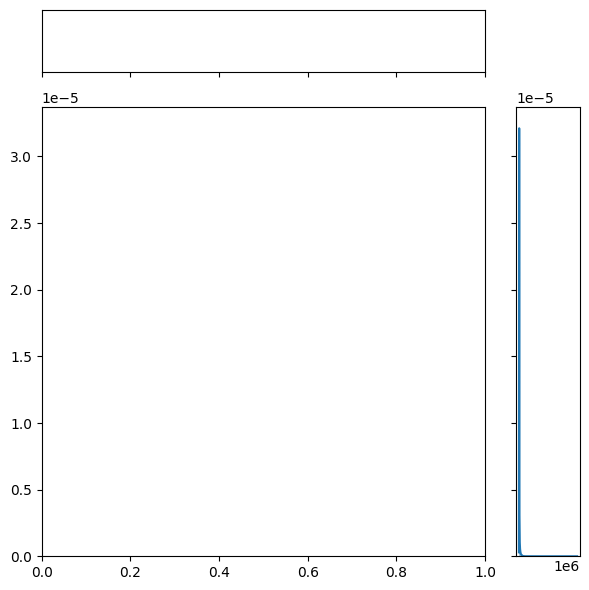

In [221]:
# Visualize the target variable
sns.distplot(df["UltimateIncurredClaimCost"])
plt.tight_layout()
plt.savefig("plots/1target.png", dpi=100.)
plt.show()


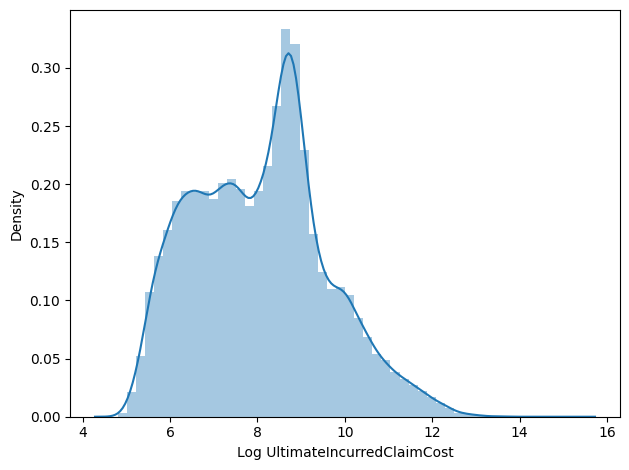

In [222]:
# The target variable is highly skewed. Plot in log scale:

df["Log UltimateIncurredClaimCost"] = np.log(df["UltimateIncurredClaimCost"])

# Visualize the target variable
sns.distplot(df["Log UltimateIncurredClaimCost"])
plt.tight_layout()
plt.savefig("plots/1target_log.png", dpi=100.)
plt.show()


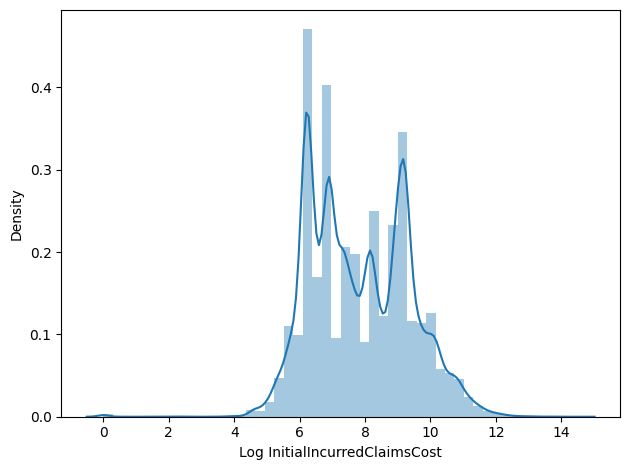

In [223]:
# Simiarly take log of InitialIncurredClaimsCost:

df["Log InitialIncurredClaimsCost"] = np.log(df["InitialIncurredClaimsCost"])

# Visualize the target variable
sns.distplot(df["Log InitialIncurredClaimsCost"])
plt.tight_layout()
plt.savefig("plots/1claim_log.png", dpi=100.)
plt.show()


In [224]:
# Visualize other numeric independent variables

# How many non-categorical columns are there?
noncat = df.columns[df.dtypes != "object"]
print(noncat, len(noncat))

noncat = ['Age', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 
          'HoursWorkedPerWeek', 'DaysWorkedPerWeek']

Index(['Age', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'InitialIncurredClaimsCost',
       'UltimateIncurredClaimCost', 'Log UltimateIncurredClaimCost',
       'Log InitialIncurredClaimsCost'],
      dtype='object') 10


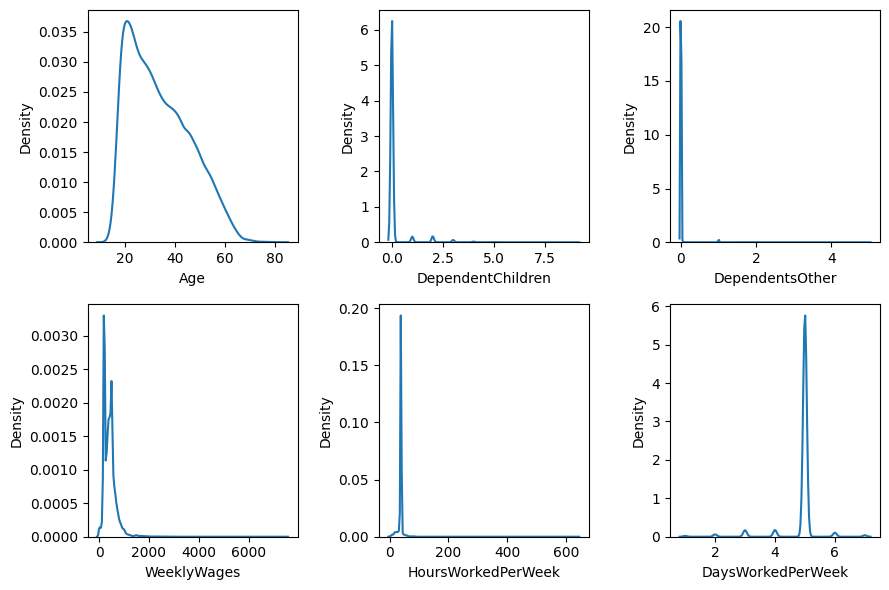

In [225]:
# Plot all non-categorical variables to see if any feature stand out
fig , ax = plt.subplots(2,3,figsize = (9,6))
for i , subplots in zip (df[noncat], ax.flatten()):  
    sns.kdeplot(x=df[noncat][i], data=df, ax=subplots)
plt.tight_layout()
plt.savefig("plots/2noncat_dist.png", dpi=100.)
plt.show()

##### Most of the workers are at the younger side (~20is), have no children or dependents, and work 5 days a week. Some outliers in HoursWorkedPerWeek. Lets check outliers:

In [226]:
df[["HoursWorkedPerWeek"]].describe()

HoursWorkedPerWeek
count        54000.000000
mean            37.735084
std             12.568704
min              0.000000
25%             38.000000
50%             38.000000
75%             40.000000
max            640.000000

In [227]:
# Checking outliers
print(len(df["HoursWorkedPerWeek"][df["HoursWorkedPerWeek"] > 168]), "workers work more than 168 hrs in a week (not possible, wrong entry?)")
print(len(df["HoursWorkedPerWeek"][df["HoursWorkedPerWeek"] == 0]), "workers work 0 hrs in a week (namesake employees?)")


36 workers work more than 168 hrs in a week (not possible, wrong entry?)
29 workers work 0 hrs in a week (namesake employees?)


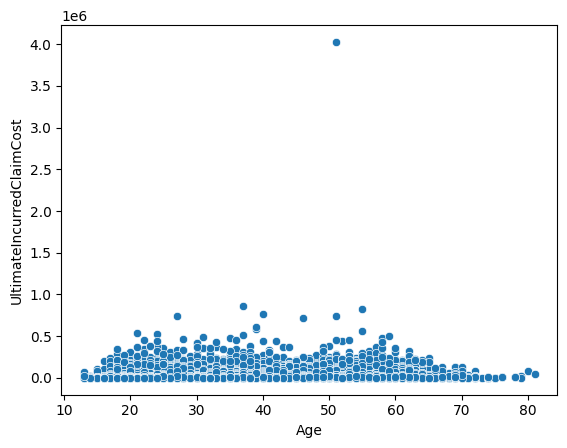

In [228]:
# Any correlation with Age?
sns.scatterplot(x="Age", y="UltimateIncurredClaimCost", data=df)
plt.show()

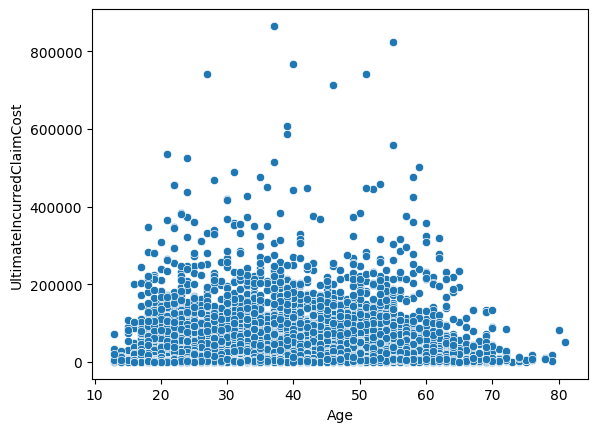

In [229]:
# Remove outlier
df = df[df["UltimateIncurredClaimCost"] < 4e6].reset_index(drop=True)

# Plot after removing the outlier
sns.scatterplot(x="Age", y="UltimateIncurredClaimCost", data=df)
plt.savefig("plots/3target_age.png", dpi=100.)
plt.show()

#### No correlation between Age and UltimateIncurredClaimCost

In [230]:
cat = df.columns[df.dtypes == "object"]
print(cat, len(cat))

cat = ['Gender', 'MaritalStatus', 'PartTimeFullTime']

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Gender',
       'MaritalStatus', 'PartTimeFullTime', 'ClaimDescription'],
      dtype='object') 7


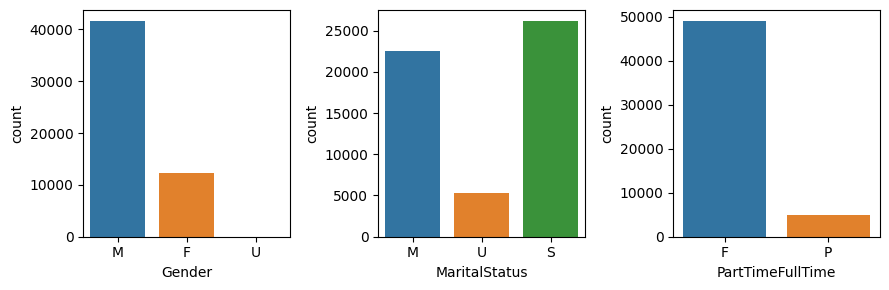

In [231]:
# Plot all Categorical variables to see if any feature stand out
fig , ax = plt.subplots(1,3,figsize = (9,3))
for i , subplots in zip (df[cat], ax.flatten()):  
    sns.countplot(x=df[cat][i], data=df, ax=subplots)
plt.tight_layout()
plt.savefig("plots/4cat_dist.png", dpi=100.)
plt.show()

#### Variation of dependent variable with independent variables


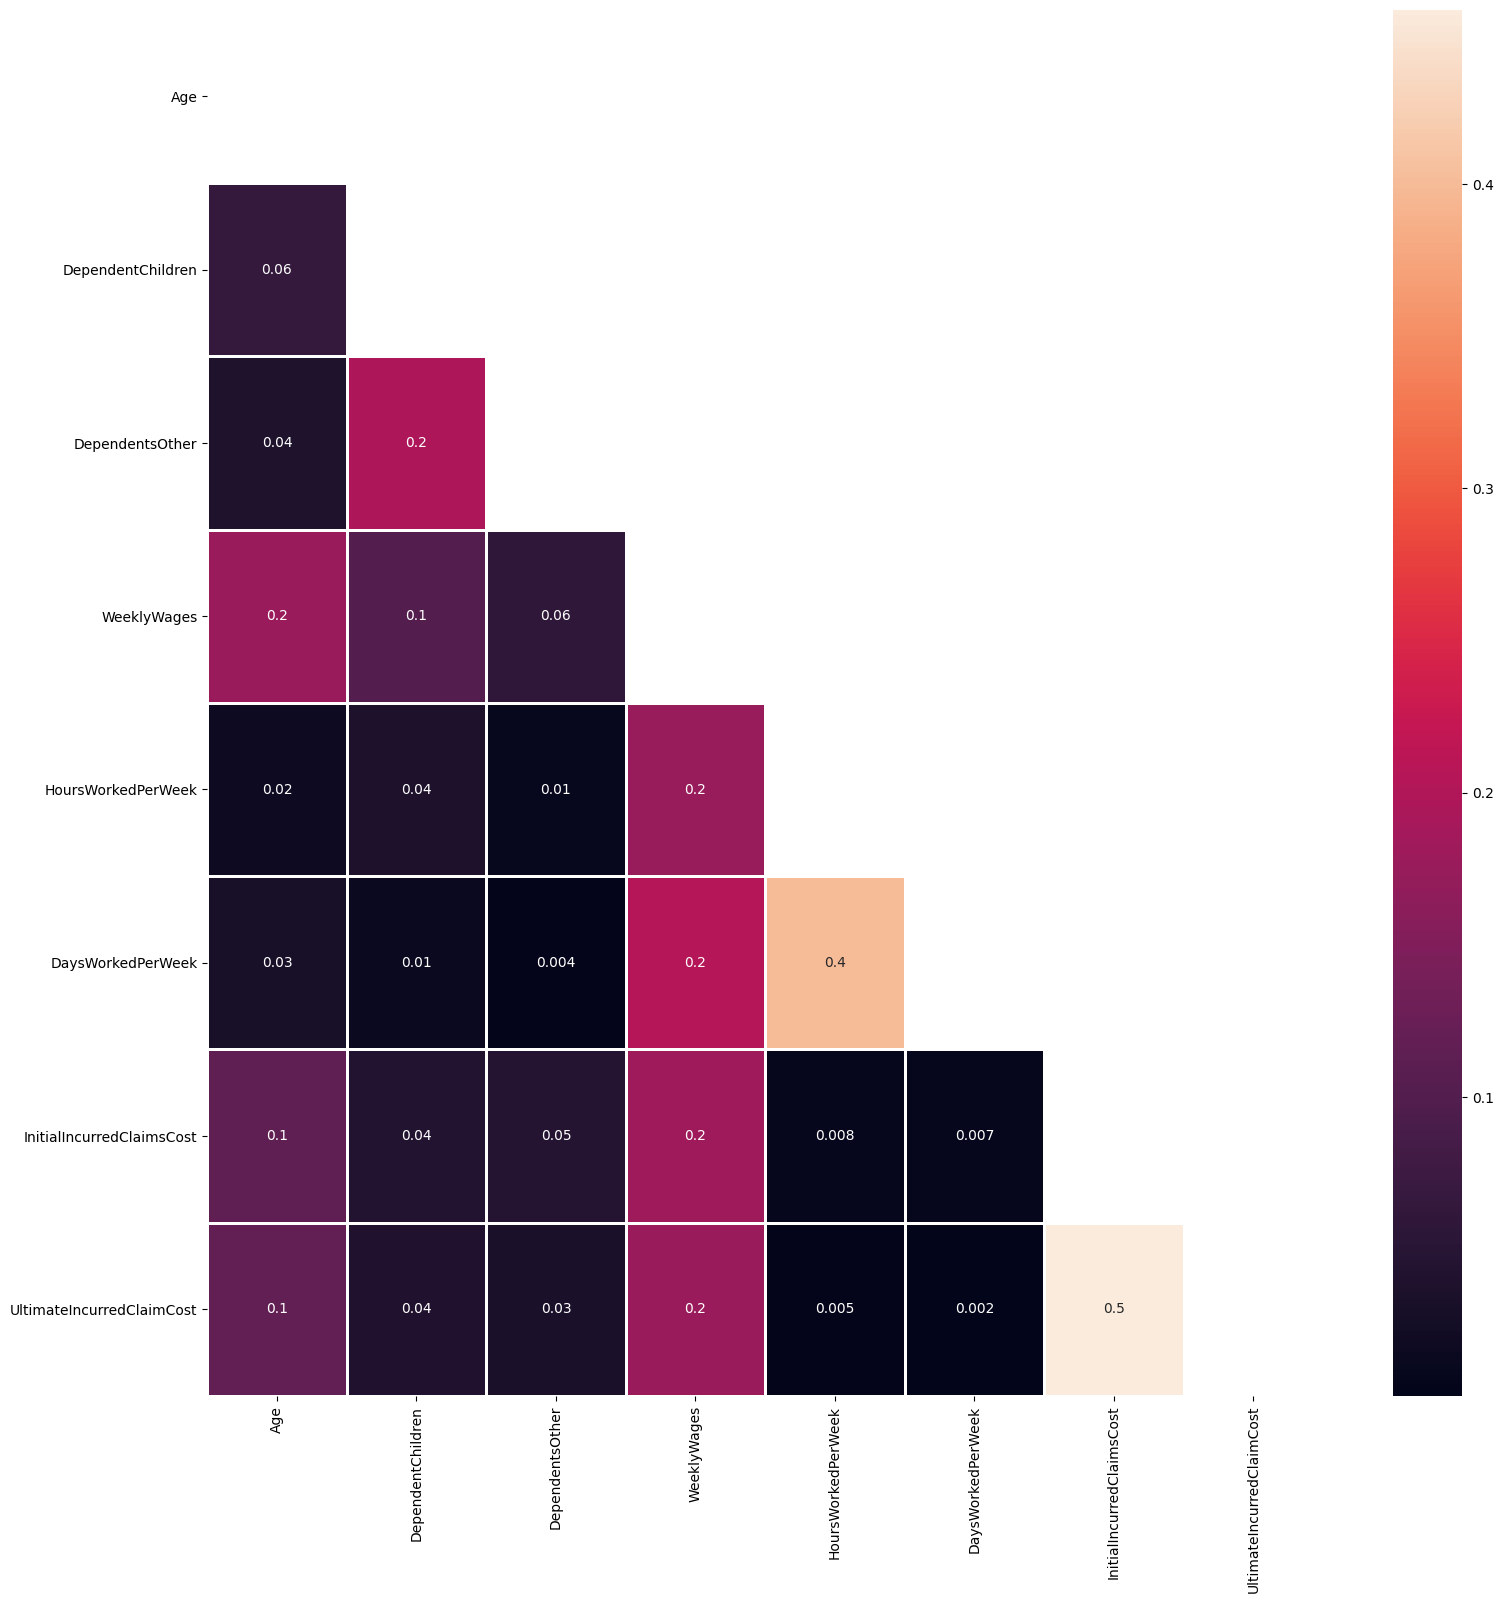

In [232]:
# Heat map to visualize correlation between numerical features and target:
plt.figure(figsize=(18,18))
corr = df.drop(columns=["Log InitialIncurredClaimsCost", "Log UltimateIncurredClaimCost"]).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.1g', linewidth = 1)
plt.savefig("plots/5heatmap.png", dpi=100.)
plt.show()


##### Strong correlations between initial and ultimate claim cost. Weak correlations with age and weekly wages.

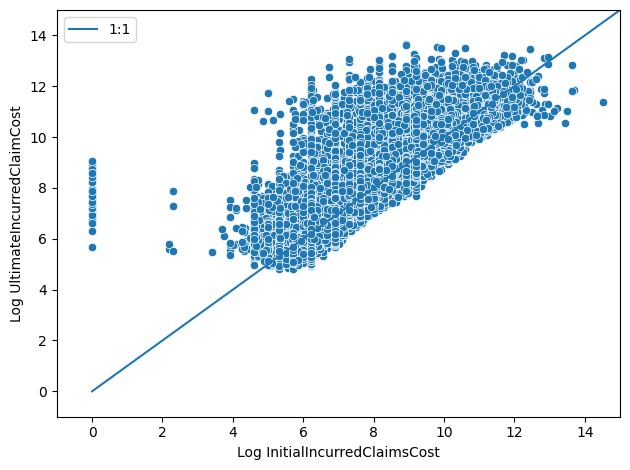

In [245]:
# plot of possible correlations
sns.scatterplot(x="Log InitialIncurredClaimsCost", y="Log UltimateIncurredClaimCost", data=df)
# sns.jointplot(x="Log InitialIncurredClaimsCost", y="Log UltimateIncurredClaimCost", data=df, kind="kde", color="#4CB391")
plt.plot([0,15], [0,15], label="1:1")
plt.legend()
plt.axis([-1,15,-1,15])
plt.tight_layout()
plt.savefig("plots/6initClaim_finalClaim.png", dpi=100.)
plt.show()

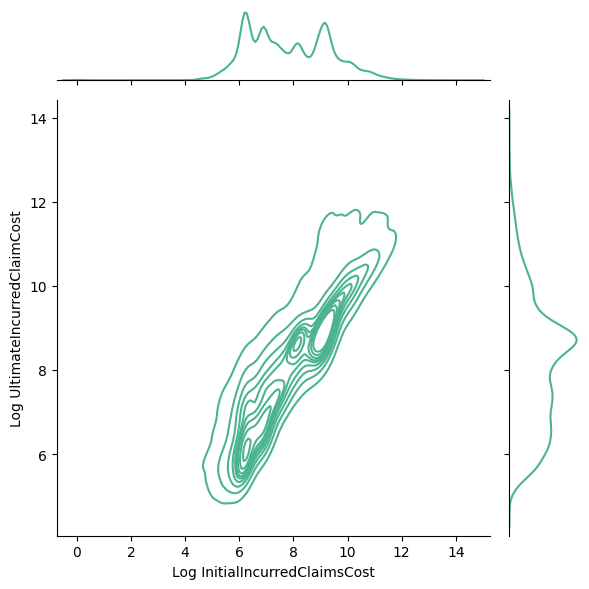

In [257]:
# plot of possible correlations
sns.jointplot(x="Log InitialIncurredClaimsCost", y="Log UltimateIncurredClaimCost", data=df, kind="kde", color="#4CB391")

# plt.axis([-1,15,-1,15])
plt.tight_layout()
plt.savefig("plots/6initClaim_finalClaim_kde.png", dpi=100.)
plt.show()

##### It seems the majority of the data is above the one-to-one line so they are paid more than the initial claim. But need to quantify to be sure.'

In [34]:
# Quantify
print("Ratio where Ultimate payment > Initial claim = ", len(df[df["UltimateIncurredClaimCost"]/df["InitialIncurredClaimsCost"] > 1])/len(df))
print("Ratio where Ultimate payment < Initial claim = ", len(df[df["UltimateIncurredClaimCost"]/df["InitialIncurredClaimsCost"] < 1])/len(df))
      

Ratio where Ultimate payment > Initial claim =  0.5395840663715995
Ratio where Ultimate payment < Initial claim =  0.46041593362840055


##### The imbalance is not how it is implied by the plot

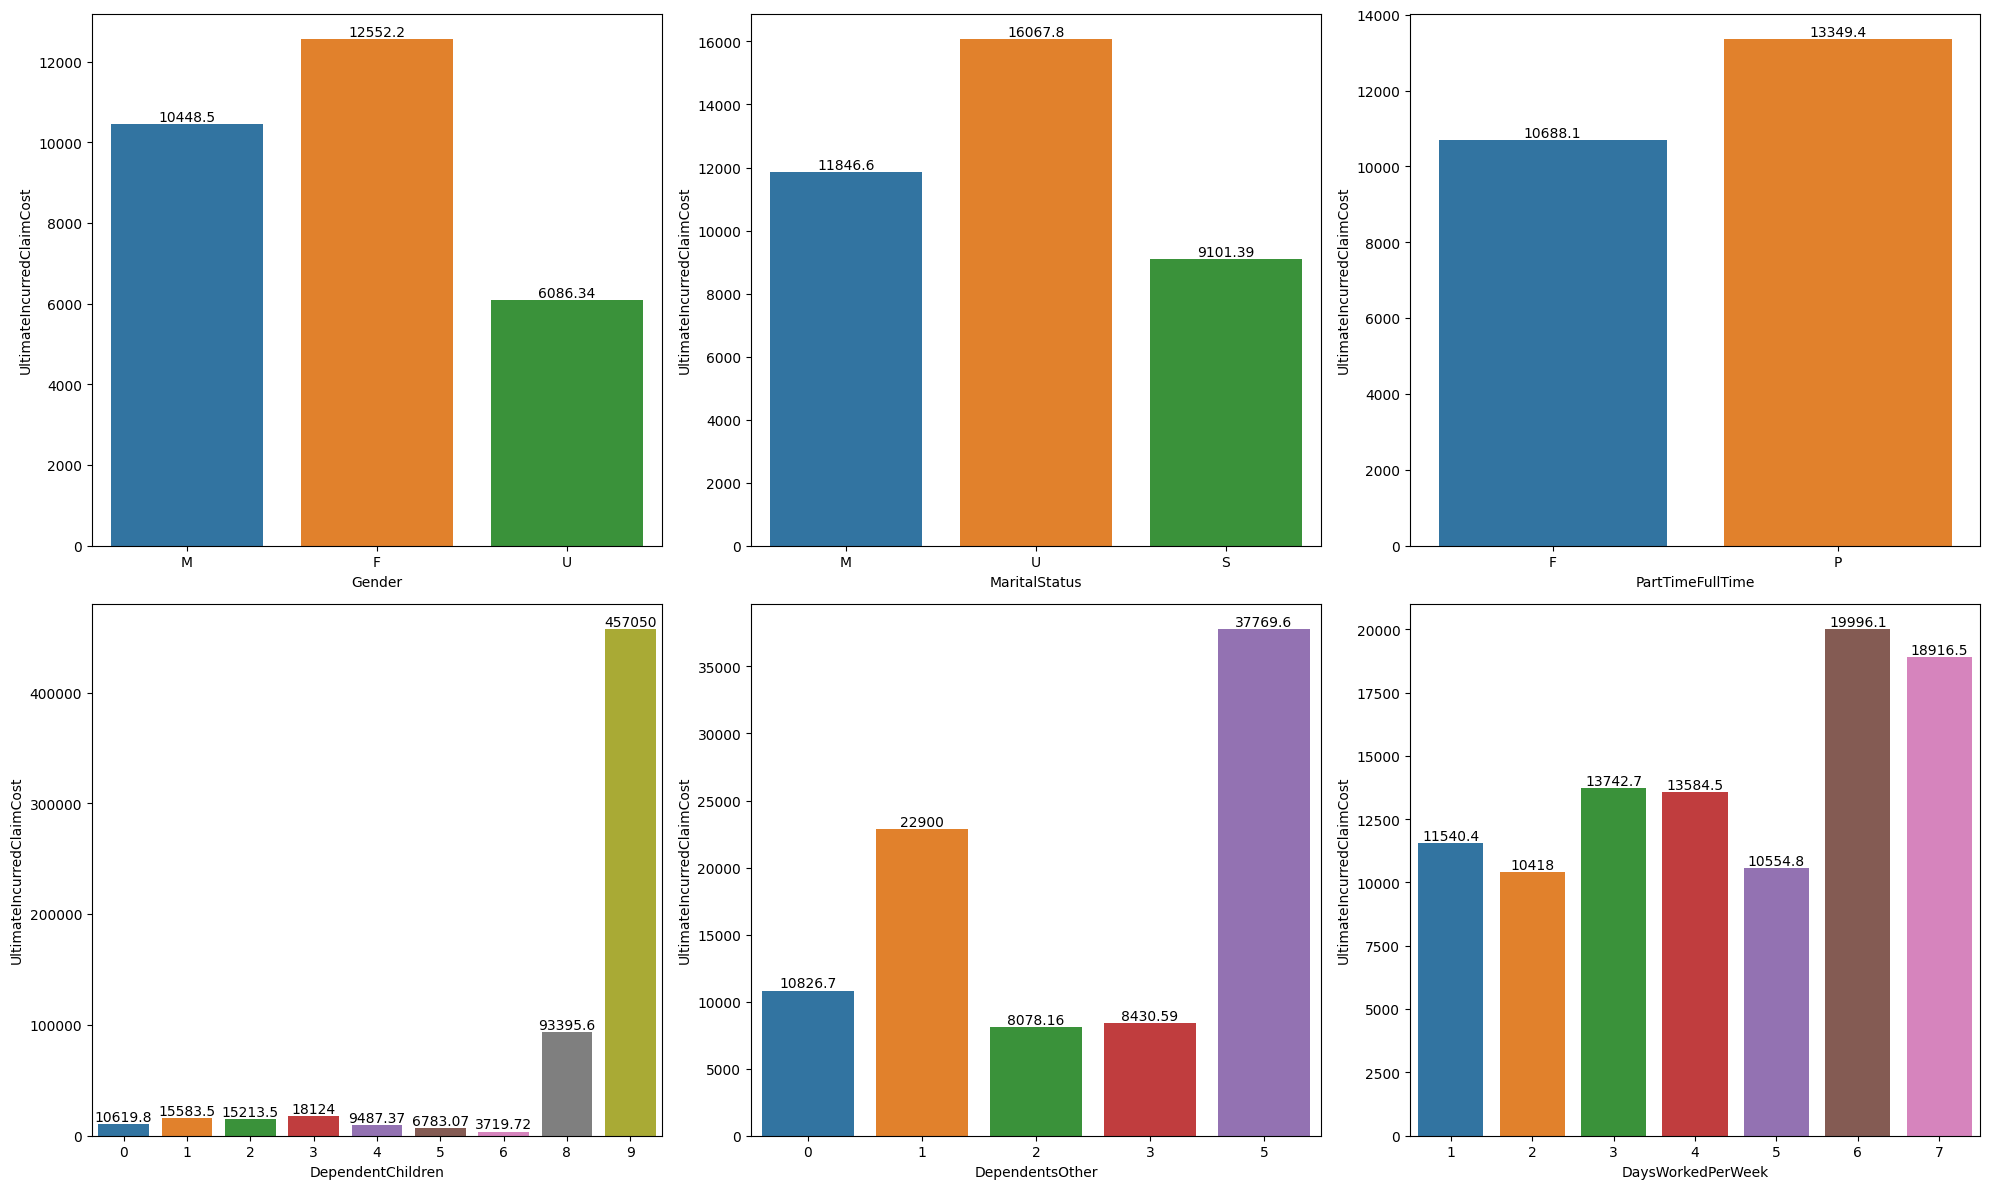

In [35]:
plt.subplots(2,3,figsize=(20,12))
# sns.set(font_scale=2)

plt.subplot(231)
ax=sns.barplot(data=df, x="Gender", y='UltimateIncurredClaimCost', ci=None)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(232)
ax=sns.barplot(data=df, y="UltimateIncurredClaimCost", x='MaritalStatus',ci=None)
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(233)
ax=sns.barplot(data=df, y="UltimateIncurredClaimCost", x='PartTimeFullTime',ci=None)
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(234)
ax=sns.barplot(data=df, x="DependentChildren", y='UltimateIncurredClaimCost', ci=None)
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(235)
ax=sns.barplot(data=df, x="DependentsOther", y='UltimateIncurredClaimCost', ci=None)
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(236)
ax=sns.barplot(data=df, x="DaysWorkedPerWeek", y='UltimateIncurredClaimCost', ci=None)
for container in ax.containers:
    ax.bar_label(container)


plt.tight_layout()
plt.savefig("plots/7targetVs.png", dpi=100.)
plt.show()


## Feature engineer datatime columns

In [36]:
# Date time columns
df[["DateTimeOfAccident", "DateReported"]].head(3)

DateTimeOfAccident          DateReported
0  2002-04-09T07:00:00Z  2002-07-05T00:00:00Z
1  1999-01-07T11:00:00Z  1999-01-20T00:00:00Z
2  1996-03-25T00:00:00Z  1996-04-14T00:00:00Z

In [37]:
# Delay between accident date and reported date can be important
df1 = df[["DateTimeOfAccident", "DateReported"]].copy()

# Reporting delay in days 
df1['DaysReportDelay'] = pd.DatetimeIndex(df1['DateReported']).date - pd.DatetimeIndex(df1['DateTimeOfAccident']).date

# annex the delay in main dataframe
df["DaysReportDelay"] = df1["DaysReportDelay"].astype("str").str.split(" ", expand=True)[0].astype(int)

df.head(2)


ClaimNumber    DateTimeOfAccident          DateReported  Age Gender  \
0   WC8285054  2002-04-09T07:00:00Z  2002-07-05T00:00:00Z   48      M   
1   WC6982224  1999-01-07T11:00:00Z  1999-01-20T00:00:00Z   43      F   

  MaritalStatus  DependentChildren  DependentsOther  WeeklyWages  \
0             M                  0                0       500.00   
1             M                  0                0       509.34   

  PartTimeFullTime  HoursWorkedPerWeek  DaysWorkedPerWeek  \
0                F                38.0                  5   
1                F                37.5                  5   

                                    ClaimDescription  \
0  LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY   
1  STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...   

   InitialIncurredClaimsCost  UltimateIncurredClaimCost  \
0                       1500                4748.203388   
1                       5500                6326.285819   

   Log UltimateIncurredClaimCost  Log InitialIncurredClaimsCost  \
0                       8.465522                       7.313220   
1                       8.752469                       8.612503   

   DaysReportDelay  
0               87  
1               13

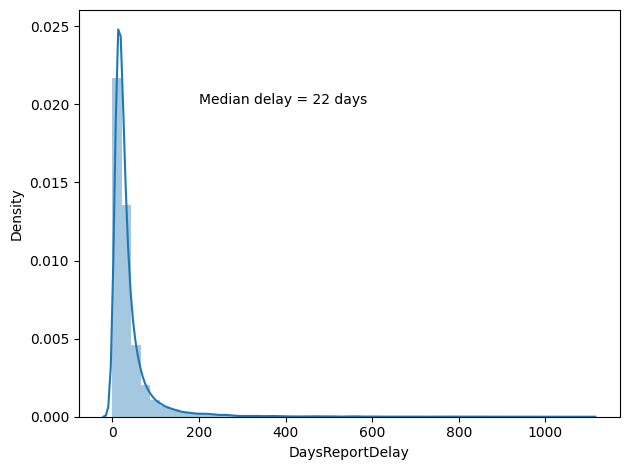

In [39]:
# Distribution of DaysReportDelay
sns.distplot(df["DaysReportDelay"])
plt.text(200, 0.02, "Median delay = "+ str(int(np.median(df["DaysReportDelay"].values))) +" days")
plt.tight_layout()
plt.savefig("plots/8delay.png", dpi=100.)
plt.show()

In [40]:
# How many people took more than a year?
len(df["DaysReportDelay"][df["DaysReportDelay"] > 365])

359

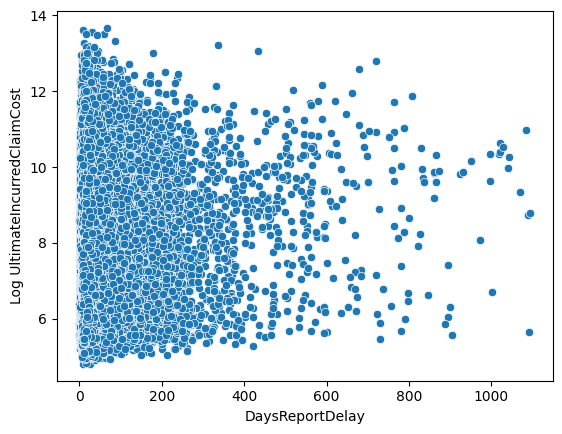

In [41]:
# Plot between DaysReportDelay and UltimateIncurredClaimCost
chart = sns.scatterplot(x="DaysReportDelay", y="Log UltimateIncurredClaimCost", data=df)
plt.show()

#### No real correlation, other than the fact that most people have short DaysReportDelay

In [42]:
df.head(2)

ClaimNumber    DateTimeOfAccident          DateReported  Age Gender  \
0   WC8285054  2002-04-09T07:00:00Z  2002-07-05T00:00:00Z   48      M   
1   WC6982224  1999-01-07T11:00:00Z  1999-01-20T00:00:00Z   43      F   

  MaritalStatus  DependentChildren  DependentsOther  WeeklyWages  \
0             M                  0                0       500.00   
1             M                  0                0       509.34   

  PartTimeFullTime  HoursWorkedPerWeek  DaysWorkedPerWeek  \
0                F                38.0                  5   
1                F                37.5                  5   

                                    ClaimDescription  \
0  LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY   
1  STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...   

   InitialIncurredClaimsCost  UltimateIncurredClaimCost  \
0                       1500                4748.203388   
1                       5500                6326.285819   

   Log UltimateIncurredClaimCost  Log InitialIncurredClaimsCost  \
0                       8.465522                       7.313220   
1                       8.752469                       8.612503   

   DaysReportDelay  
0               87  
1               13

### One Hot Encoding of the categorical columns

In [43]:
# Dataframe of categorical columns
df_cat = df[cat]
print(df_cat.nunique())
df_cat.head(3)

Gender              3
MaritalStatus       3
PartTimeFullTime    2
dtype: int64


Gender MaritalStatus PartTimeFullTime
0      M             M                F
1      F             M                F
2      M             U                F

In [44]:
# Use pandas to encode categories
df_cat = pd.get_dummies(df_cat, drop_first = True)
df_cat.head(3)

Gender_M  Gender_U  MaritalStatus_S  MaritalStatus_U  PartTimeFullTime_P
0         1         0                0                0                   0
1         0         0                0                0                   0
2         1         0                0                1                   0

In [45]:
# combine df_cat and df
df = df.join(df_cat)
df.head(2)

ClaimNumber    DateTimeOfAccident          DateReported  Age Gender  \
0   WC8285054  2002-04-09T07:00:00Z  2002-07-05T00:00:00Z   48      M   
1   WC6982224  1999-01-07T11:00:00Z  1999-01-20T00:00:00Z   43      F   

  MaritalStatus  DependentChildren  DependentsOther  WeeklyWages  \
0             M                  0                0       500.00   
1             M                  0                0       509.34   

  PartTimeFullTime  HoursWorkedPerWeek  DaysWorkedPerWeek  \
0                F                38.0                  5   
1                F                37.5                  5   

                                    ClaimDescription  \
0  LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY   
1  STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...   

   InitialIncurredClaimsCost  UltimateIncurredClaimCost  \
0                       1500                4748.203388   
1                       5500                6326.285819   

   Log UltimateIncurredClaimCost  Log InitialIncurredClaimsCost  \
0                       8.465522                       7.313220   
1                       8.752469                       8.612503   

   DaysReportDelay  Gender_M  Gender_U  MaritalStatus_S  MaritalStatus_U  \
0               87         1         0                0                0   
1               13         0         0                0                0   

   PartTimeFullTime_P  
0                   0  
1                   0

In [46]:
# Remove these columns
col_rem = ["ClaimNumber", "DateTimeOfAccident", "DateReported", "Gender", "MaritalStatus", "PartTimeFullTime"]

df.drop(columns=col_rem, inplace=True)
df.head(2)

Age  DependentChildren  DependentsOther  WeeklyWages  HoursWorkedPerWeek  \
0   48                  0                0       500.00                38.0   
1   43                  0                0       509.34                37.5   

   DaysWorkedPerWeek                                   ClaimDescription  \
0                  5  LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY   
1                  5  STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...   

   InitialIncurredClaimsCost  UltimateIncurredClaimCost  \
0                       1500                4748.203388   
1                       5500                6326.285819   

   Log UltimateIncurredClaimCost  Log InitialIncurredClaimsCost  \
0                       8.465522                       7.313220   
1                       8.752469                       8.612503   

   DaysReportDelay  Gender_M  Gender_U  MaritalStatus_S  MaritalStatus_U  \
0               87         1         0                0                0   
1               13         0         0                0                0   

   PartTimeFullTime_P  
0                   0  
1                   0

## There is a text column that can be important when building the model. Use Natural Language Processing (NLP) to extract features from the text column

In [47]:
# check text column
df[["ClaimDescription"]].head(3)

ClaimDescription
0  LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY
1  STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...
2                   CUT ON SHARP EDGE CUT LEFT THUMB

In [48]:
# Removing Short Words
# remove all the words having length 3 or less. These words are also known as Stop Words.
df['ClaimDescription'] = df['ClaimDescription'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df[["ClaimDescription"]].head(3)

ClaimDescription
0             LIFTING TYRE INJURY RIGHT WRIST INJURY
1  STEPPED AROUND CRATES TRUCK TRAY FRACTURE LEFT...
2                              SHARP EDGE LEFT THUMB

In [49]:
# Tokenization
# Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.
# Here we tokenize our sentences because we will apply Stemming from the “NLTK” package in the next step.

df['ClaimDescription'] = df['ClaimDescription'].apply(lambda x: x.split())
df[['ClaimDescription']].head()


ClaimDescription
0      [LIFTING, TYRE, INJURY, RIGHT, WRIST, INJURY]
1  [STEPPED, AROUND, CRATES, TRUCK, TRAY, FRACTUR...
2                         [SHARP, EDGE, LEFT, THUMB]
3        [DIGGING, LOWER, BACK, LOWER, BACK, STRAIN]
4  [REACHING, ABOVE, SHOULDER, LEVEL, ACUTE, MUSC...

In [50]:
# Stemming
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

import nltk
from nltk import PorterStemmer
ps = PorterStemmer()
df['ClaimDescription'] = df['ClaimDescription'].apply(lambda x: [ps.stem(i) for i in x])
df[['ClaimDescription']].head()

ClaimDescription
0         [lift, tyre, injuri, right, wrist, injuri]
1  [step, around, crate, truck, tray, fractur, le...
2                          [sharp, edg, left, thumb]
3            [dig, lower, back, lower, back, strain]
4  [reach, abov, shoulder, level, acut, muscl, st...

In [51]:
# Make a new column with length of word in each text
df["text_length"] = df["ClaimDescription"].apply(lambda x: len(x))
df[["ClaimDescription", "text_length"]].head(3)

ClaimDescription  text_length
0         [lift, tyre, injuri, right, wrist, injuri]            6
1  [step, around, crate, truck, tray, fractur, le...            8
2                          [sharp, edg, left, thumb]            4

In [52]:
# stitch these tokens back together

for i in range(len(df['ClaimDescription'])):
    df['ClaimDescription'][i] = ' '.join(df['ClaimDescription'][i])

df['ClaimDescription'] = df['ClaimDescription']
df[['ClaimDescription']].head()


ClaimDescription
0                lift tyre injuri right wrist injuri
1  step around crate truck tray fractur left forearm
2                               sharp edg left thumb
3                   dig lower back lower back strain
4  reach abov shoulder level acut muscl strain le...

### Visualize word count

In [53]:
# WORDCLOUD
# A WordCloud is a visualisation wherein the most frequent words appear in large size and the 
# less frequent words appear in smaller sizes.

from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter


In [55]:
def plot_wordcloud(data, col, text = None):
    stop = stopwords.words('english')
    all_words = [word for each in data[col] for word in str(each).lower().split() if word not in stop]
    word_freq = Counter(all_words)

    wordcloud = WordCloud(width = 900,
                          height = 500,
                          max_words = 200,
                          max_font_size = 100,
                          relative_scaling = 0.5,
                          background_color = "rgba(255, 255, 255, 0)", 
                          mode = "RGBA",
                          normalize_plurals = True).generate_from_frequencies(word_freq)
    plt.figure(figsize = (16, 12))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(text, fontsize = 16)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("plots/9wordCloud.png", dpi=100.)
    plt.show()

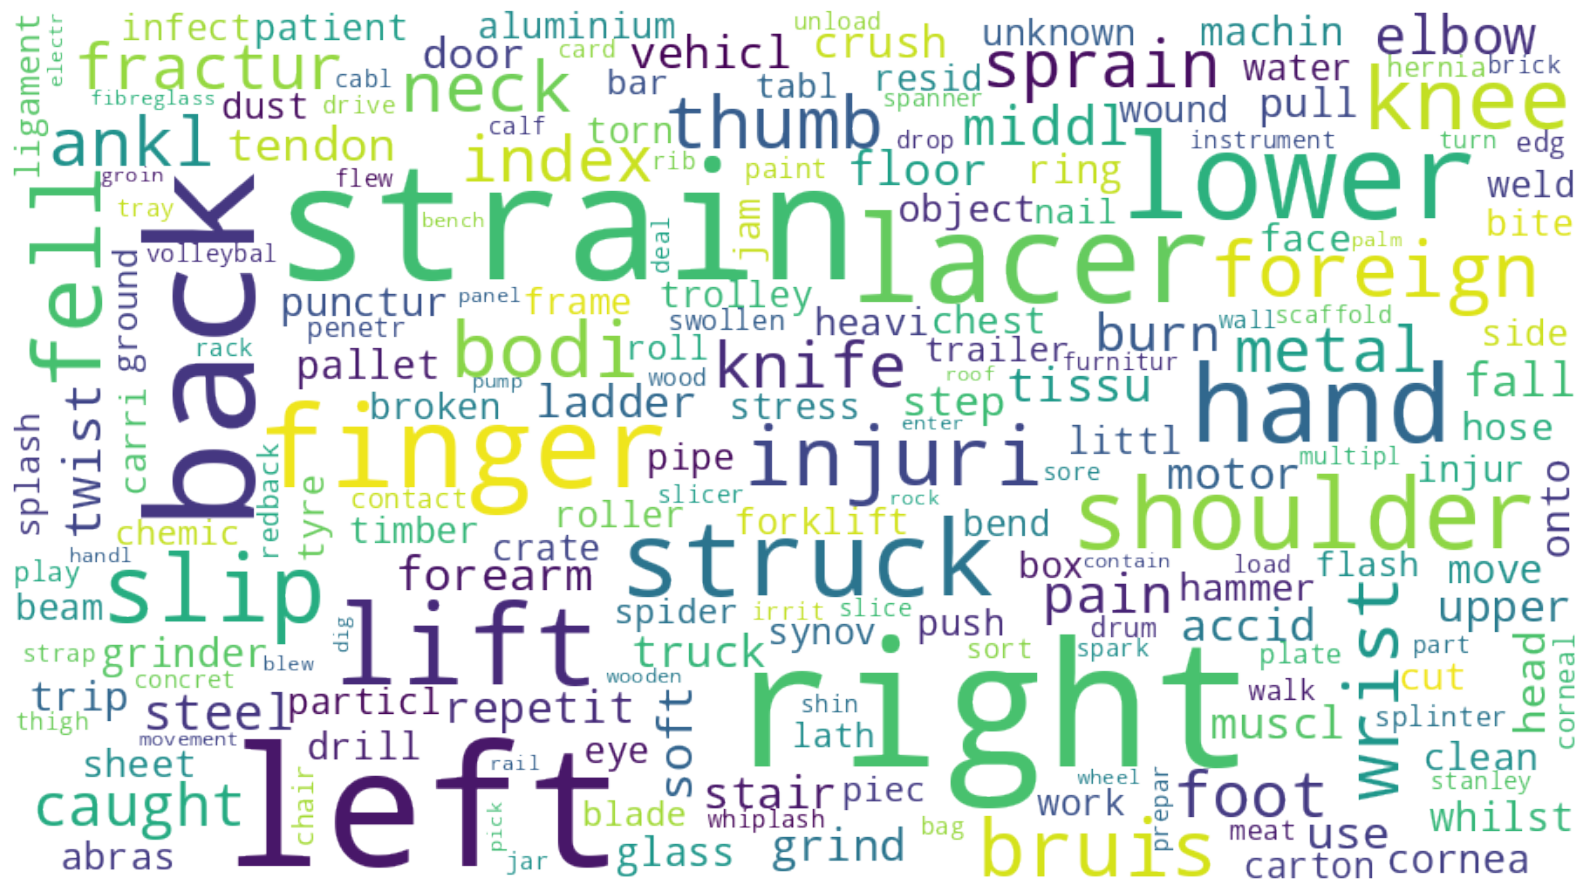

In [56]:
plot_wordcloud(df, 'ClaimDescription')

In [57]:
# Find the most used word in the text
corpus = df['ClaimDescription']
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

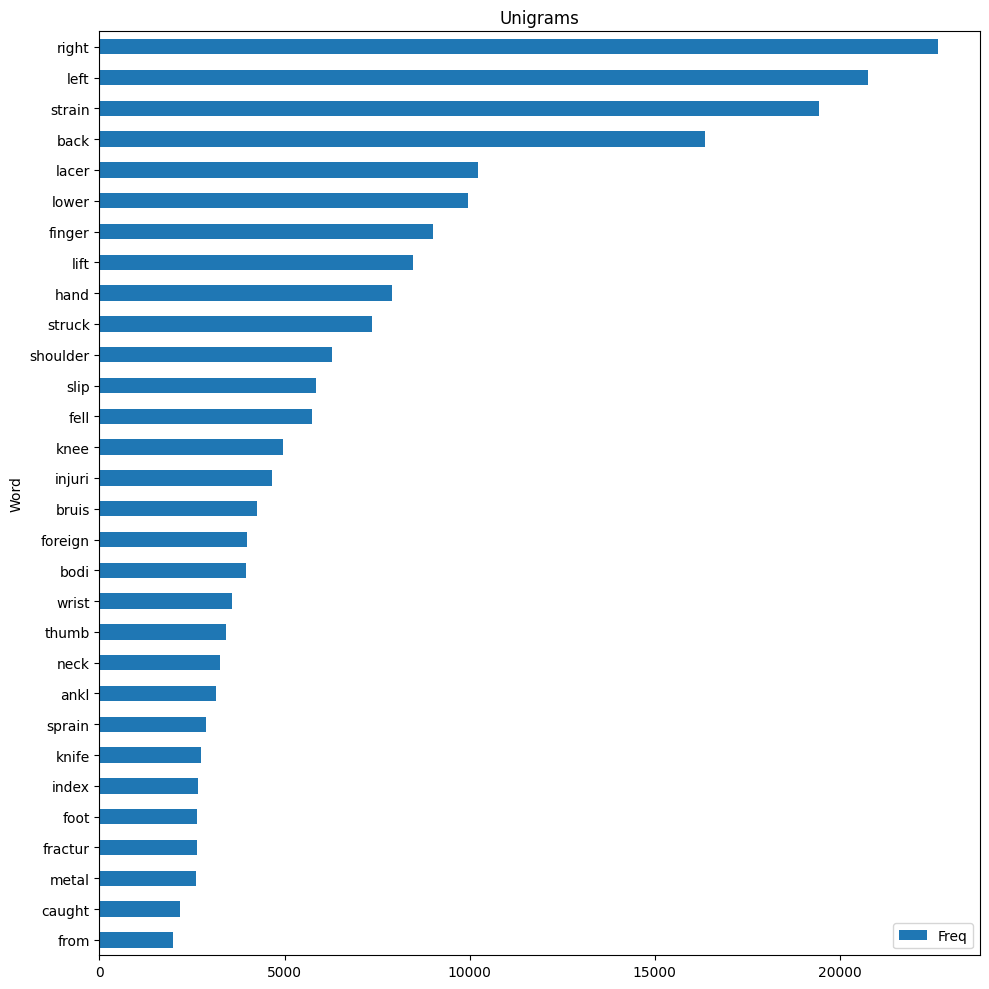

In [59]:
# single words that frequently occur in claim descr.

plt.figsize=((25,30))
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 1))
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_uni["Word"] = dtf_uni["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(kind="barh",figsize=(10,10))
plt.title('Unigrams')
plt.tight_layout()
plt.savefig("plots/10unigram.png", dpi=100.)                  
plt.show()

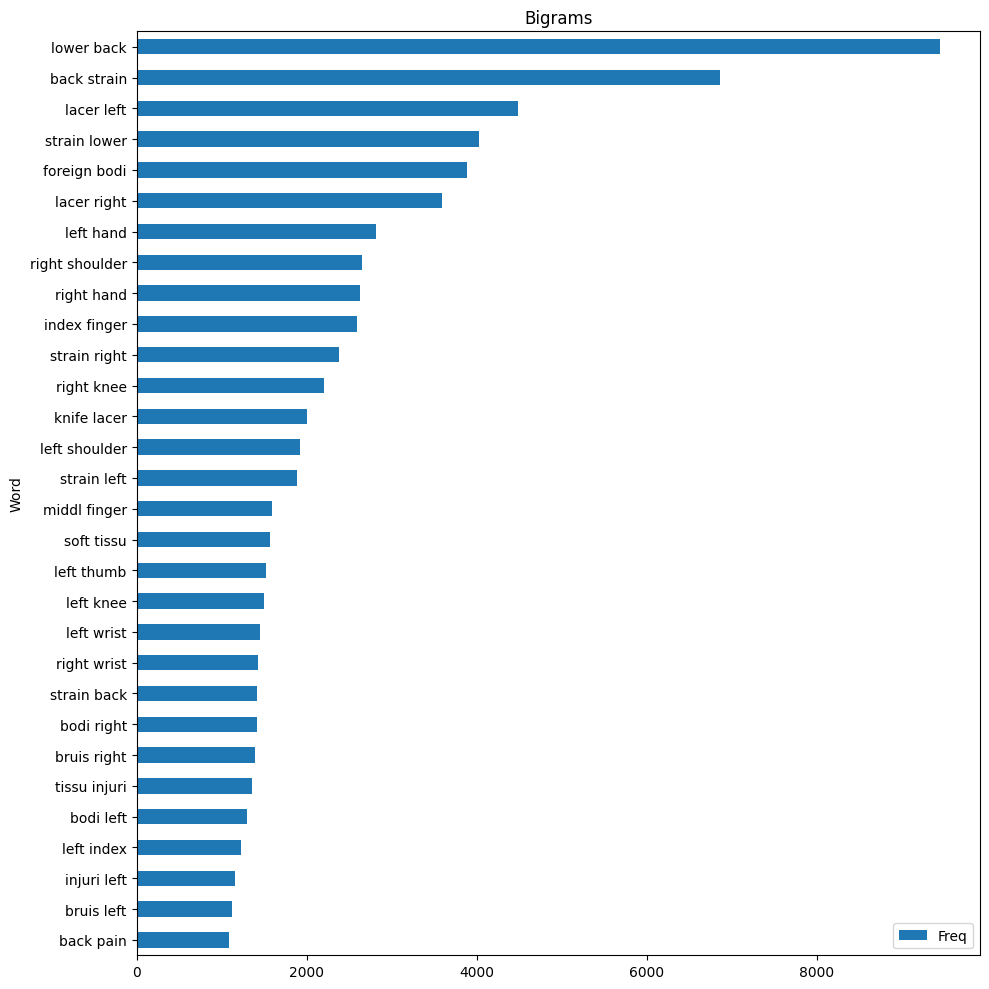

In [60]:
#Most common pairs of words that occur together in Claim Description

plt.figsize=((25,30))
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(kind="barh",figsize=(10,10))
plt.title('Bigrams')
plt.tight_layout()
plt.savefig("plots/10bigram.png", dpi=100.)                      
plt.show()

#### Manaully make bag-of-words model

In [61]:
# Choose 100 most used words (both single and double) to change them into features
cd_features = np.array(list(dtf_uni["Word"].iloc[:50]) + list(dtf_bi["Word"].iloc[:50])).ravel()

for feature in cd_features:
    df['CD_'+'_'.join(feature.split())]=df['ClaimDescription'].apply(lambda x:1 if feature in x else 0)
    
#Creating Features based on Claim description col.   
cd_features=['CD_'+'_'.join(feature.split()) for feature in cd_features]


In [62]:
df.head(3)

Age  DependentChildren  DependentsOther  WeeklyWages  HoursWorkedPerWeek  \
0   48                  0                0       500.00                38.0   
1   43                  0                0       509.34                37.5   
2   30                  0                0       709.10                38.0   

   DaysWorkedPerWeek                                   ClaimDescription  \
0                  5                lift tyre injuri right wrist injuri   
1                  5  step around crate truck tray fractur left forearm   
2                  5                               sharp edg left thumb   

   InitialIncurredClaimsCost  UltimateIncurredClaimCost  \
0                       1500                4748.203388   
1                       5500                6326.285819   
2                       1700                2293.949087   

   Log UltimateIncurredClaimCost  Log InitialIncurredClaimsCost  \
0                       8.465522                       7.313220   
1                       8.752469                       8.612503   
2                       7.738030                       7.438384   

   DaysReportDelay  Gender_M  Gender_U  MaritalStatus_S  MaritalStatus_U  \
0               87         1         0                0                0   
1               13         0         0                0                0   
2               20         1         0                0                1   

   PartTimeFullTime_P  text_length  CD_right  CD_left  CD_strain  CD_back  \
0                   0            6         1        0          0        0   
1                   0            8         0        1          0        0   
2                   0            4         0        1          0        0   

   CD_lacer  CD_lower  CD_finger  CD_lift  CD_hand  CD_struck  CD_shoulder  \
0         0         0          0        1        0          0            0   
1         0         0          0        0        0          0            0   
2         0         0          0        0        0          0            0   

   CD_slip  CD_fell  CD_knee  CD_injuri  CD_bruis  CD_foreign  CD_bodi  \
0        0        0        0          1         0           0        0   
1        0        0        0          0         0           0        0   
2        0        0        0          0         0           0        0   

   CD_wrist  CD_thumb  CD_neck  CD_ankl  CD_sprain  CD_knife  CD_index  \
0         1         0        0        0          0         0         0   
1         0         0        0        0          0         0         0   
2         0         1        0        0          0         0         0   

   CD_foot  CD_fractur  CD_metal  CD_caught  CD_from  CD_middl  CD_pain  \
0        0           0         0          0        0         0        0   
1        0           1         0          0        0         0        0   
2        0           0         0          0        0         0        0   

   CD_elbow  CD_twist  CD_burn  CD_steel  CD_soft  CD_tissu  CD_floor  \
0         0         0        0         0        0         0         0   
1         0         0        0         0        0         0         0   
2         0         0        0         0        0         0         0   

   CD_forearm  CD_with  CD_between  CD_tendon  CD_over  CD_fall  CD_use  \
0           0        0           0          0        0        0       0   
1           1        0           0          0        0        0       0   
2           0        0           0          0        0        0       0   

   CD_down  CD_grind  CD_muscl  CD_vehicl  CD_lower_back  CD_back_strain  \
0        0         0         0          0              0               0   
1        0         0         0          0              0               0   
2        0         0         0          0              0               0   

   CD_lacer_left  CD_strain_lower  CD_foreign_bodi  CD_lacer_right  \
0              0                0                0               0   
1              0  

In [63]:
# Drop the ClaimDescription column
df.drop(columns=["ClaimDescription", "InitialIncurredClaimsCost", "UltimateIncurredClaimCost"], inplace=True)
df.head(2)

Age  DependentChildren  DependentsOther  WeeklyWages  HoursWorkedPerWeek  \
0   48                  0                0       500.00                38.0   
1   43                  0                0       509.34                37.5   

   DaysWorkedPerWeek  Log UltimateIncurredClaimCost  \
0                  5                       8.465522   
1                  5                       8.752469   

   Log InitialIncurredClaimsCost  DaysReportDelay  Gender_M  Gender_U  \
0                       7.313220               87         1         0   
1                       8.612503               13         0         0   

   MaritalStatus_S  MaritalStatus_U  PartTimeFullTime_P  text_length  \
0                0                0                   0            6   
1                0                0                   0            8   

   CD_right  CD_left  CD_strain  CD_back  CD_lacer  CD_lower  CD_finger  \
0         1        0          0        0         0         0          0   
1         0        1          0        0         0         0          0   

   CD_lift  CD_hand  CD_struck  CD_shoulder  CD_slip  CD_fell  CD_knee  \
0        1        0          0            0        0        0        0   
1        0        0          0            0        0        0        0   

   CD_injuri  CD_bruis  CD_foreign  CD_bodi  CD_wrist  CD_thumb  CD_neck  \
0          1         0           0        0         1         0        0   
1          0         0           0        0         0         0        0   

   CD_ankl  CD_sprain  CD_knife  CD_index  CD_foot  CD_fractur  CD_metal  \
0        0          0         0         0        0           0         0   
1        0          0         0         0        0           1         0   

   CD_caught  CD_from  CD_middl  CD_pain  CD_elbow  CD_twist  CD_burn  \
0          0        0         0        0         0         0        0   
1          0        0         0        0         0         0        0   

   CD_steel  CD_soft  CD_tissu  CD_floor  CD_forearm  CD_with  CD_between  \
0         0        0         0         0           0        0           0   
1         0        0         0         0           1        0           0   

   CD_tendon  CD_over  CD_fall  CD_use  CD_down  CD_grind  CD_muscl  \
0          0        0        0       0        0         0         0   
1          0        0        0       0        0         0         0   

   CD_vehicl  CD_lower_back  CD_back_strain  CD_lacer_left  CD_strain_lower  \
0          0              0               0              0                0   
1          0              0               0              0                0   

   CD_foreign_bodi  CD_lacer_right  CD_left_hand  CD_right_shoulder  \
0                0               0             0                  0   
1                0               0             0                  0   

   CD_right_hand  CD_index_finger  CD_strain_right  CD_right_knee  \
0              0                0                0              0   
1              0                0                0              0   

   CD_knife_lacer  CD_left_shoulder  CD_strain_left  CD_middl_finger  \
0               0                 0               0                0   
1               0                 0               0                0   

   CD_soft_tissu  CD_left_thumb  CD_left_knee  CD_left_wrist  CD_right_wrist  \
0              0              0             0              0               1   
1              0              0             0              0               0   

   CD_strain_back  CD_bodi_right  CD_bruis_right  CD_tissu_injuri  \
0               0              0               0                0   
1               0              0               0                0   

   CD_bodi_left  CD_left_index  CD_injuri_left  CD_bruis_left  CD_back_pain  \
0             0              0               0              0             0   
1             0              0               0              0             0   

   CD_right_foot  CD_left

### Feature scaling

In [64]:
# Feature scaling of non-categorical variables
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
df[["Age", "WeeklyWages", "HoursWorkedPerWeek", "DaysWorkedPerWeek", "Log UltimateIncurredClaimCost", "Log InitialIncurredClaimsCost", "DaysReportDelay", "text_length"]] = scalar.fit_transform(df[["Age", "WeeklyWages", "HoursWorkedPerWeek", "DaysWorkedPerWeek", "Log UltimateIncurredClaimCost", "Log InitialIncurredClaimsCost", "DaysReportDelay", "text_length"]])


In [65]:
# check
df.head(2)

Age  DependentChildren  DependentsOther  WeeklyWages  \
0  0.514706                  0                0     0.066569   
1  0.441176                  0                0     0.067815   

   HoursWorkedPerWeek  DaysWorkedPerWeek  Log UltimateIncurredClaimCost  \
0            0.059375           0.666667                       0.412981   
1            0.058594           0.666667                       0.445337   

   Log InitialIncurredClaimsCost  DaysReportDelay  Gender_M  Gender_U  \
0                       0.504059         0.079452         1         0   
1                       0.593611         0.011872         0         0   

   MaritalStatus_S  MaritalStatus_U  PartTimeFullTime_P  text_length  \
0                0                0                   0     0.461538   
1                0                0                   0     0.615385   

   CD_right  CD_left  CD_strain  CD_back  CD_lacer  CD_lower  CD_finger  \
0         1        0          0        0         0         0          0   
1         0        1          0        0         0         0          0   

   CD_lift  CD_hand  CD_struck  CD_shoulder  CD_slip  CD_fell  CD_knee  \
0        1        0          0            0        0        0        0   
1        0        0          0            0        0        0        0   

   CD_injuri  CD_bruis  CD_foreign  CD_bodi  CD_wrist  CD_thumb  CD_neck  \
0          1         0           0        0         1         0        0   
1          0         0           0        0         0         0        0   

   CD_ankl  CD_sprain  CD_knife  CD_index  CD_foot  CD_fractur  CD_metal  \
0        0          0         0         0        0           0         0   
1        0          0         0         0        0           1         0   

   CD_caught  CD_from  CD_middl  CD_pain  CD_elbow  CD_twist  CD_burn  \
0          0        0         0        0         0         0        0   
1          0        0         0        0         0         0        0   

   CD_steel  CD_soft  CD_tissu  CD_floor  CD_forearm  CD_with  CD_between  \
0         0        0         0         0           0        0           0   
1         0        0         0         0           1        0           0   

   CD_tendon  CD_over  CD_fall  CD_use  CD_down  CD_grind  CD_muscl  \
0          0        0        0       0        0         0         0   
1          0        0        0       0        0         0         0   

   CD_vehicl  CD_lower_back  CD_back_strain  CD_lacer_left  CD_strain_lower  \
0          0              0               0              0                0   
1          0              0               0              0                0   

   CD_foreign_bodi  CD_lacer_right  CD_left_hand  CD_right_shoulder  \
0                0               0             0                  0   
1                0               0             0                  0   

   CD_right_hand  CD_index_finger  CD_strain_right  CD_right_knee  \
0              0                0                0              0   
1              0                0                0              0   

   CD_knife_lacer  CD_left_shoulder  CD_strain_left  CD_middl_finger  \
0               0                 0               0                0   
1               0                 0               0                0   

   CD_soft_tissu  CD_left_thumb  CD_left_knee  CD_left_wrist  CD_right_wrist  \
0              0              0             0              0               1   
1              0              0             0              0               0   

   CD_strain_back  CD_bodi_right  CD_bruis_right  CD_tissu_injuri  \
0               0              0               0                0   
1               0              0               0                0   

   CD_bodi_left  CD_left_index  CD_injuri_left  CD_bruis_left  CD_back_pain  \
0             0              0               0              0             0   
1             0              0               0              0             0   

   CD_right_foo

### Now our dataset is ready for modeling.

In [66]:
# Features and label
X = df.drop(["Log UltimateIncurredClaimCost"],  axis=1)
y = df[["Log UltimateIncurredClaimCost"]]


In [67]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## 1. Decision Tree

In [247]:
# import
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [248]:
# fit
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

print(np.around(np.sqrt(mean_squared_error(dt.predict(X_train), y_train)), 2))


0.0


In [249]:
# predict on validation set
rmse_dt = np.around(np.sqrt(mean_squared_error(dt.predict(X_test), y_test)), 2)
print((f"Decision Tree RMSE: {rmse_dt}"))

Decision Tree RMSE: 0.1


In [250]:
# Use Cross Validation and Grid Search to find optimal hyperparameters for the best model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_params = {
    'criterion' : ['squared_error', 'friedman_mse'],
#     'max_depth' : [3, 5, 7, 10],
#     'min_impurity_decrease' : [0.005, 0.0075, 0.01],
#     'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : (X_train.shape[0]*np.array([0.001, 0.005, 0.01])).astype(int)
}

grid_search = GridSearchCV(dt, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'min_samples_leaf': array([ 37, 188, 377])},
             verbose=1)

In [251]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'squared_error', 'min_samples_leaf': 37}
0.8327556615098445


In [252]:
# Choose the best estimator from the grid
dt_grid = grid_search.best_estimator_

print(np.around(np.sqrt(mean_squared_error(dt_grid.predict(X_train), y_train)), 3))


0.065


In [253]:
# predict on validation set
rmse_dt_grid = np.around(np.sqrt(mean_squared_error(dt_grid.predict(X_test), y_test)), 3)
print((f"Decision Tree RMSE: {rmse_dt_grid}"))

Decision Tree RMSE: 0.07


In [256]:
# # visualize the tree
# import graphviz
# from sklearn import tree

# dot_data = tree.export_graphviz(dt_grid, out_file=None,
#                                feature_names = features.columns,
#                                 filled=True, rounded=True,
#                                 special_characters=True)

# graph = graphviz.Source(dot_data)
# graph.render("tree")
# graph


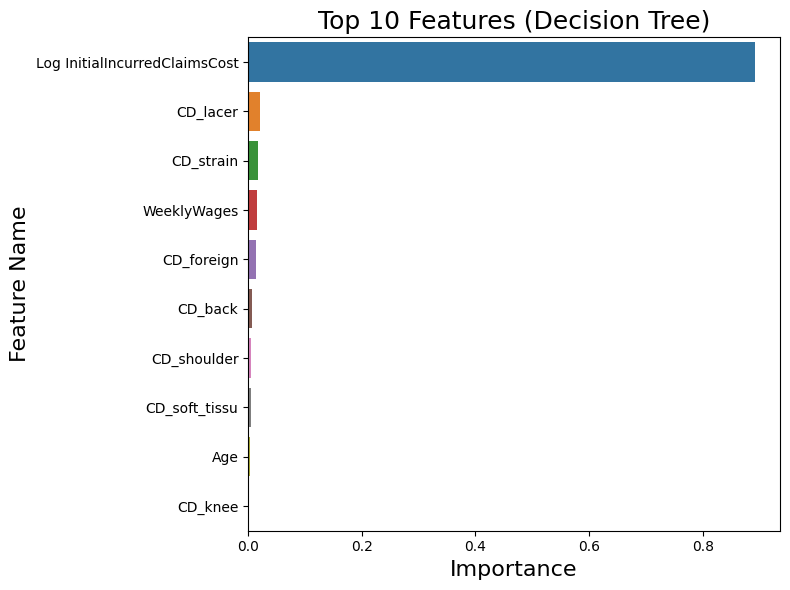

In [78]:
# Feature importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dt_grid.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Features (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.tight_layout()
plt.savefig("plots/11fimp_dt.png", dpi=100.)   
plt.show()

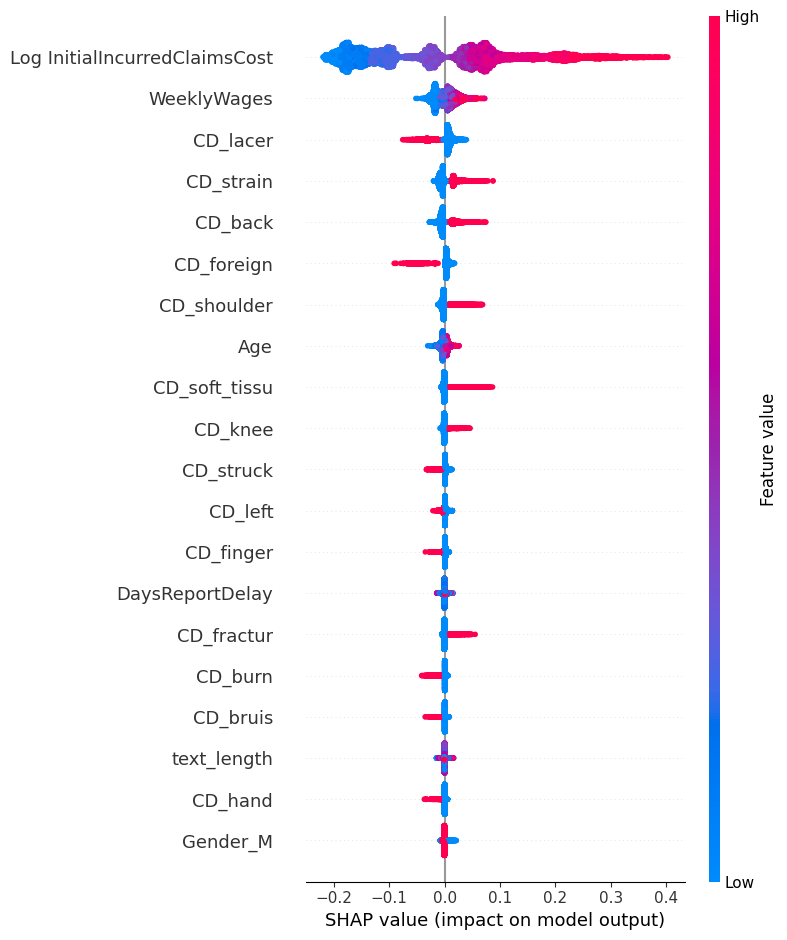

In [81]:
import shap
explainer = shap.TreeExplainer(dt_grid)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## 2. Random Forest

In [176]:
# import
from sklearn.ensemble import RandomForestRegressor


In [177]:
# Use Cross Validation and Grid Search to find optimal hyperparameters for the best model
grid_params = {
    'n_estimators' : [100, 200],
    'criterion' : ['squared_error', 'friedman_mse'],
    'min_impurity_decrease' : [0.005, 0.0075, 0.01],
    'min_samples_leaf' : (X_train.shape[0]*np.array([0.001, 0.005, 0.01])).astype(int)
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'min_impurity_decrease': [0.005, 0.0075, 0.01],
                         'min_samples_leaf': array([ 37, 188, 377]),
                         'n_estimators': [100, 200]},
             verbose=1)

In [178]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 37, 'n_estimators': 200}
0.8443543952636222


In [179]:
# Choose the best estimator from the grid
rf_grid = grid_search.best_estimator_
print(np.around(np.sqrt(mean_squared_error(rf_grid.predict(X_train), y_train)), 3))


0.065


In [180]:
# predict on validation set
rmse_rf_grid = np.around(np.sqrt(mean_squared_error(rf_grid.predict(X_test), y_test)), 3)
print((f"Random Forest RMSE: {rmse_rf_grid}"))

Random Forest RMSE: 0.068


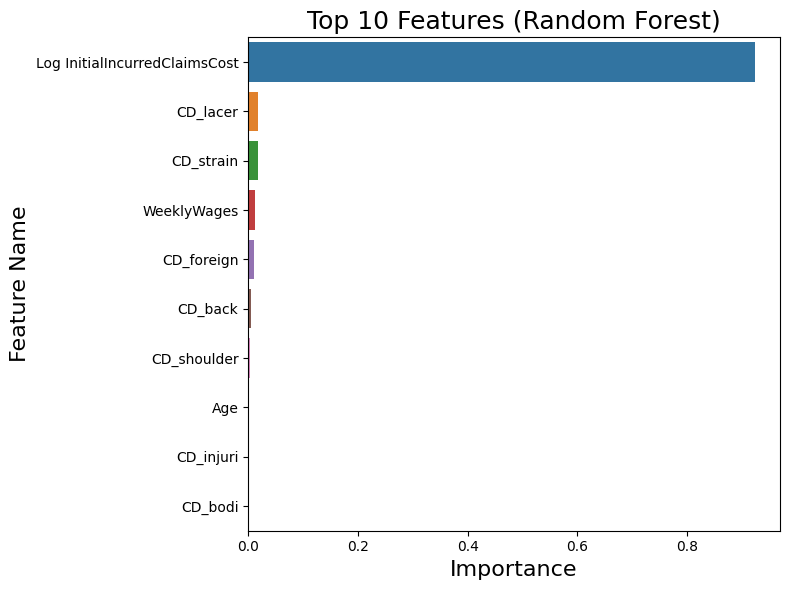

In [87]:
# Feature importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf_grid.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Features (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.tight_layout()
plt.savefig("plots/12fimp_rf.png", dpi=100.)   
plt.show()

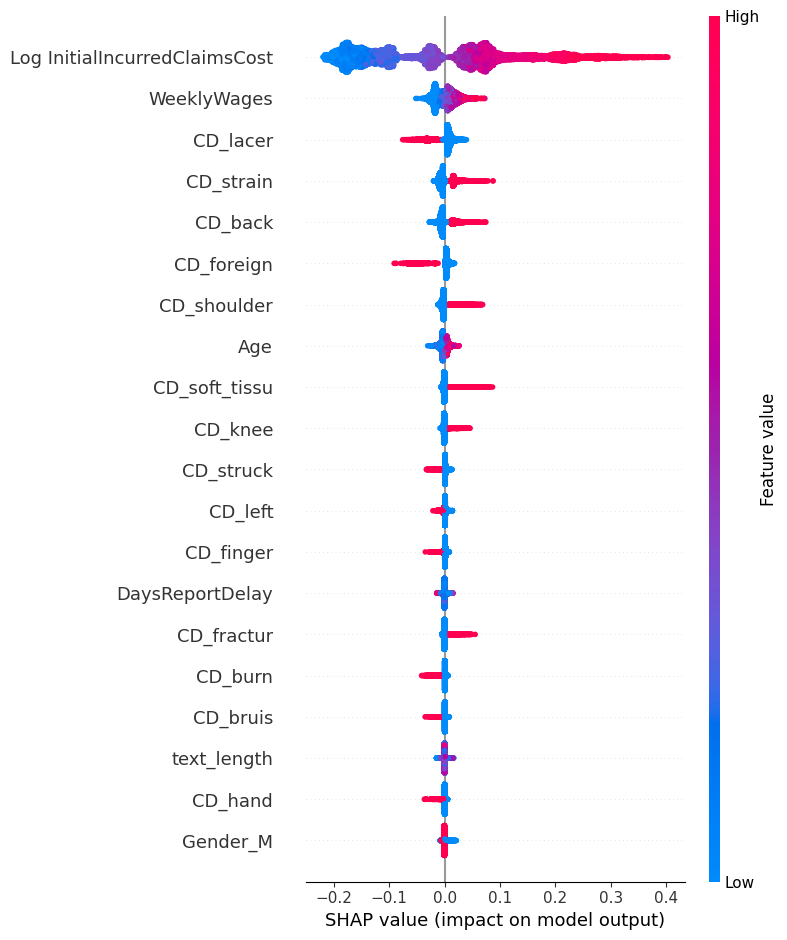

In [88]:
import shap
explainer = shap.TreeExplainer(dt_grid)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# 3. AdaBoost Regressor

In [126]:
# import
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

In [162]:
# Grid search and cross-validation
ada = AdaBoostRegressor()

parameters = {
    'n_estimators' : [100, 50, 25],
    'learning_rate' : [0.3, 0.1, 0.05],
    'loss' : ["linear", "square"]
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.1, 0.05, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [100, 50, 25]},
             verbose=2)

In [163]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 50}
0.7719724114080376


In [164]:
# Choose the best estimator from the grid
ada_grid = grid_search.best_estimator_
print(np.around(np.sqrt(mean_squared_error(ada_grid.predict(X_train), y_train)), 3))


0.082


In [157]:
# predict on validation set
rmse_ada_grid = np.around(np.sqrt(mean_squared_error(ada_grid.predict(X_test), y_test)), 3)
print((f"AdaBoost RMSE: {rmse_ada_grid}"))

AdaBoost RMSE: 0.083


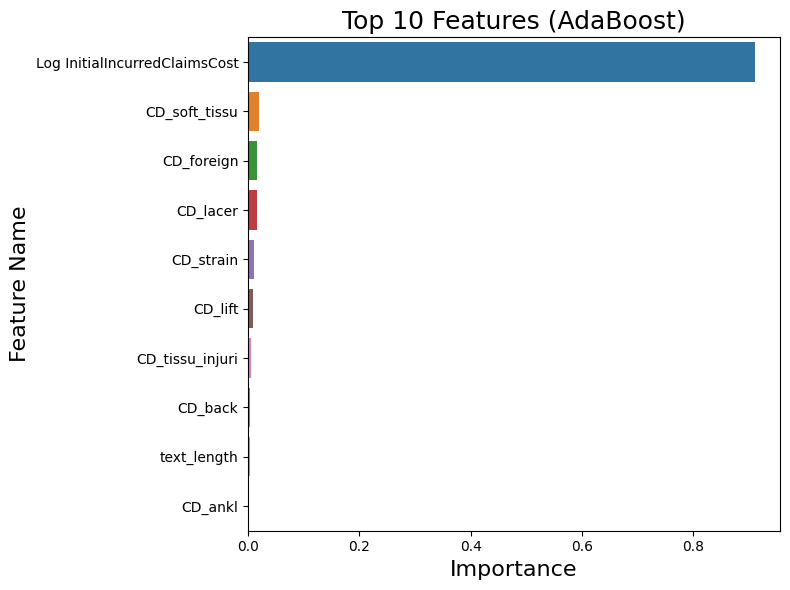

In [158]:
# Feature importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada_grid.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Features (AdaBoost)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.tight_layout()
plt.savefig("plots/13fimp_ada.png", dpi=100.)   
plt.show()

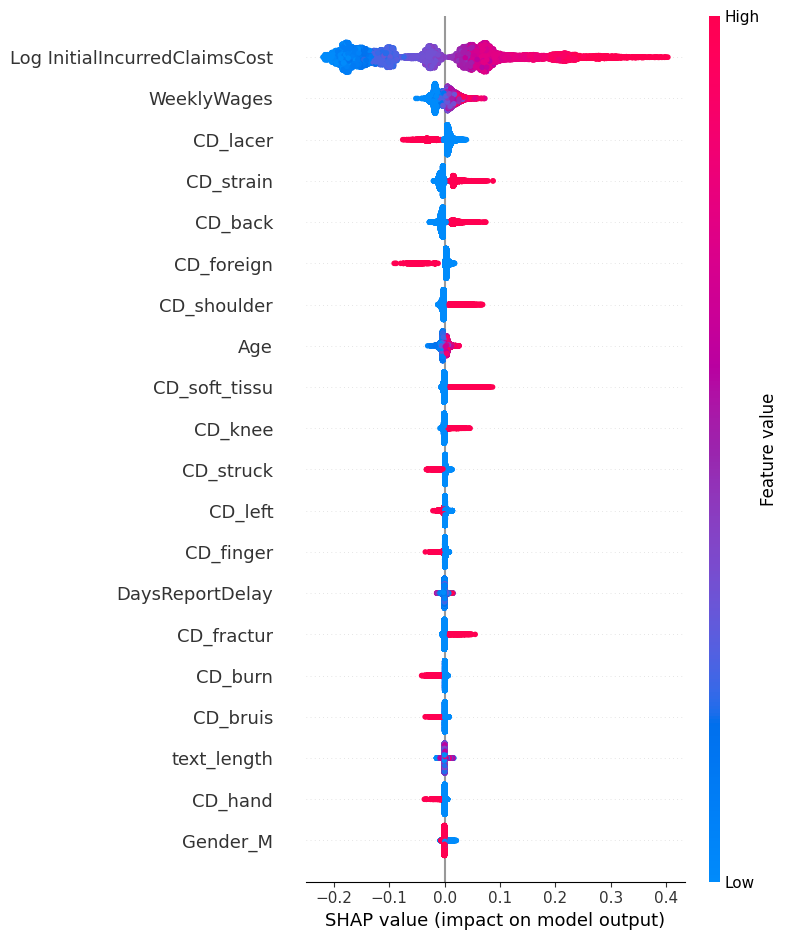

In [95]:
import shap
explainer = shap.TreeExplainer(dt_grid)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# 4. Gradient Boosting Regressor


In [97]:
# import
from sklearn.ensemble import GradientBoostingRegressor


In [98]:
# Grid Search and Cross Validation

gb = GradientBoostingRegressor()

parameters = {
    'n_estimators' : [50, 100],
    'learning_rate' : [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(gb, parameters, n_jobs = -1, cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [50, 100]},
             verbose=2)

In [99]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100}
0.85114011173698


In [100]:
# Choose the best estimator from the grid
gb_grid = grid_search.best_estimator_
print(np.around(np.sqrt(mean_squared_error(gb_grid.predict(X_train), y_train)), 3))


0.066


In [101]:
# predict on validation set
rmse_gb_grid = np.around(np.sqrt(mean_squared_error(gb_grid.predict(X_test), y_test)), 3)
print((f"Gradient Boosting RMSE: {rmse_gb_grid}"))

Gradient Boosting RMSE: 0.067


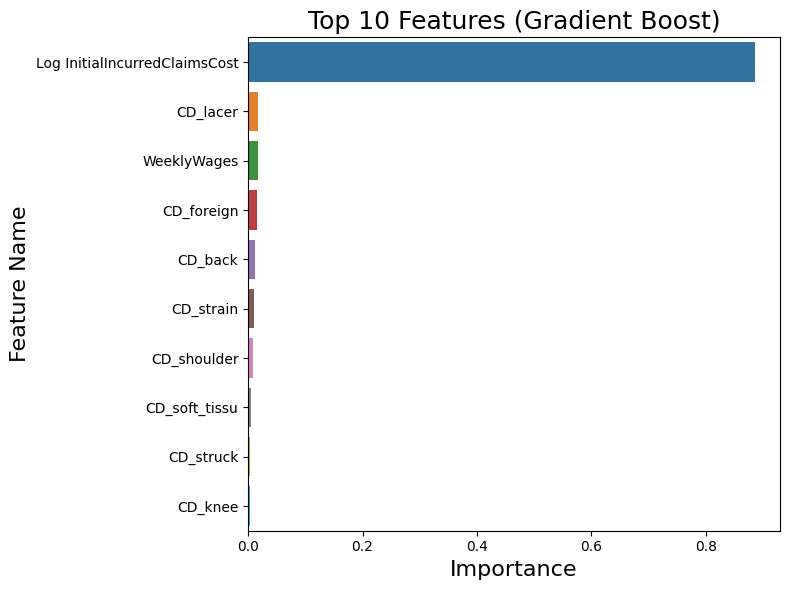

In [102]:
# Feature importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": gb_grid.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Features (Gradient Boost)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.tight_layout()
plt.savefig("plots/14fimp_gb.png", dpi=100.)   
plt.show()

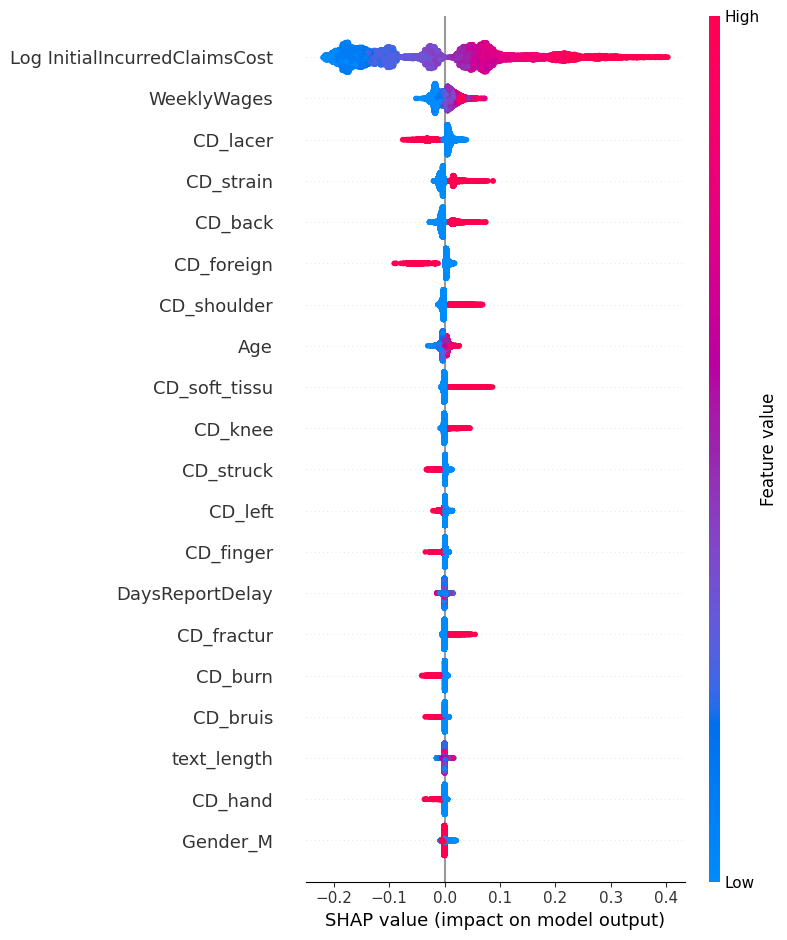

In [103]:
import shap
explainer = shap.TreeExplainer(dt_grid)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# 5. Stochastic Gradient Boosting Regressor

In [104]:
# Grid Search and Cross Validation

sgb = GradientBoostingRegressor(subsample = 0.90, max_features = 0.70)

parameters = {
    'n_estimators' : [50, 100],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(sgb, parameters, n_jobs = -1, cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features=0.7,
                                                 subsample=0.9),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             verbose=2)

In [105]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100}
0.8511355939552425


In [106]:
# Choose the best estimator from the grid
sgb_grid = grid_search.best_estimator_
print(np.around(np.sqrt(mean_squared_error(sgb_grid.predict(X_train), y_train)), 3))


0.066


In [107]:
# predict on validation set
rmse_sgb_grid = np.around(np.sqrt(mean_squared_error(sgb_grid.predict(X_test), y_test)), 3)
print((f"Stochastic Gradient Boosting RMSE: {rmse_sgb_grid}"))

Stochastic Gradient Boosting RMSE: 0.067


# 6. Extreme Gradient Boosting (XGBOOST)

In [108]:
# Import
from xgboost import XGBRegressor

In [109]:
# Create an instance of the XGBoost Regressor
xgb = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
#     'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.3],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3],
                         'n_estimators': [50, 100]})

In [110]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100}
0.8567980922144807


In [111]:
# Choose the best estimator from the grid
xgb_grid = grid_search.best_estimator_
print(np.around(np.sqrt(mean_squared_error(xgb_grid.predict(X_train), y_train)), 3))


0.06


In [112]:
# predict on validation set
rmse_xgb_grid = np.around(np.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test)), 3)
print((f"XGBoost RMSE: {rmse_xgb_grid}"))

XGBoost RMSE: 0.065


## 7. Light GBM

In [113]:
# import
from lightgbm import LGBMRegressor

In [114]:
# Define the parameter grid
param_grid ={
    'learning_rate': [0.02,0.025], 
    'n_estimators': [500], 
    'num_leaves': [30,40,50],
    'feature_fraction': [0.7]} 

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = RandomizedSearchCV(LGBMRegressor(),param_grid, scoring='neg_mean_squared_error', cv=5,  n_iter=5)
grid_search.fit(X_train, y_train)


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGB

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=5,
                   param_distributions={'feature_fraction': [0.7],
                                        'learning_rate': [0.02, 0.025],
                                        'n_estimators': [500],
                                        'num_leaves': [30, 40, 50]},
                   scoring='neg_mean_squared_error')

In [115]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'num_leaves': 40, 'n_estimators': 500, 'learning_rate': 0.025, 'feature_fraction': 0.7}
-0.00417942053095932


In [116]:
# Choose the best estimator from the grid
lgb_grid = grid_search.best_estimator_
print(np.around(np.sqrt(mean_squared_error(lgb_grid.predict(X_train), y_train)), 3))


0.06


In [117]:
# predict on validation set
rmse_lgb_grid = np.around(np.sqrt(mean_squared_error(lgb_grid.predict(X_test), y_test)), 3)
print((f"LightGBM RMSE: {rmse_lgb_grid}"))

LightGBM RMSE: 0.065


## 8. CatBoost

In [118]:
# Import
from catboost import CatBoostRegressor


In [119]:
# Create an instance of the catBoost classifier
cat = CatBoostRegressor()

# Define the parameter grid
param_grid = {'learning_rate': [0.3, 0.1],
#         'depth': [4, 6, 10],
        'l2_leaf_reg': [3, 5, 7]}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(cat, param_grid, cv=5)
grid_search.fit(X_train, y_train)

0:	learn: 0.1347460	total: 70.6ms	remaining: 1m 10s
1:	learn: 0.1105974	total: 78.7ms	remaining: 39.2s
2:	learn: 0.0953479	total: 84.3ms	remaining: 28s
3:	learn: 0.0852030	total: 89.6ms	remaining: 22.3s
4:	learn: 0.0786791	total: 94ms	remaining: 18.7s
5:	learn: 0.0750325	total: 98ms	remaining: 16.2s
6:	learn: 0.0726581	total: 102ms	remaining: 14.5s
7:	learn: 0.0710357	total: 106ms	remaining: 13.2s
8:	learn: 0.0697691	total: 110ms	remaining: 12.1s
9:	learn: 0.0689397	total: 116ms	remaining: 11.4s
10:	learn: 0.0683501	total: 120ms	remaining: 10.8s
11:	learn: 0.0679857	total: 124ms	remaining: 10.2s
12:	learn: 0.0676520	total: 129ms	remaining: 9.76s
13:	learn: 0.0673691	total: 133ms	remaining: 9.38s
14:	learn: 0.0671536	total: 137ms	remaining: 9.02s
15:	learn: 0.0669490	total: 142ms	remaining: 8.73s
16:	learn: 0.0667697	total: 146ms	remaining: 8.45s
17:	learn: 0.0666107	total: 151ms	remaining: 8.22s
18:	learn: 0.0664559	total: 155ms	remaining: 8.01s
19:	learn: 0.0663278	total: 159ms	remain

183:	learn: 0.0594212	total: 838ms	remaining: 3.72s
184:	learn: 0.0593969	total: 843ms	remaining: 3.71s
185:	learn: 0.0593707	total: 847ms	remaining: 3.71s
186:	learn: 0.0593436	total: 851ms	remaining: 3.7s
187:	learn: 0.0593091	total: 854ms	remaining: 3.69s
188:	learn: 0.0592777	total: 858ms	remaining: 3.68s
189:	learn: 0.0592650	total: 862ms	remaining: 3.67s
190:	learn: 0.0592484	total: 866ms	remaining: 3.67s
191:	learn: 0.0592300	total: 870ms	remaining: 3.66s
192:	learn: 0.0592060	total: 874ms	remaining: 3.65s
193:	learn: 0.0591771	total: 878ms	remaining: 3.65s
194:	learn: 0.0591417	total: 882ms	remaining: 3.64s
195:	learn: 0.0591163	total: 886ms	remaining: 3.63s
196:	learn: 0.0590779	total: 890ms	remaining: 3.63s
197:	learn: 0.0590679	total: 893ms	remaining: 3.62s
198:	learn: 0.0590426	total: 897ms	remaining: 3.61s
199:	learn: 0.0590208	total: 901ms	remaining: 3.6s
200:	learn: 0.0590095	total: 905ms	remaining: 3.6s
201:	learn: 0.0589746	total: 909ms	remaining: 3.59s
202:	learn: 0.0

377:	learn: 0.0551888	total: 1.6s	remaining: 2.64s
378:	learn: 0.0551758	total: 1.61s	remaining: 2.64s
379:	learn: 0.0551594	total: 1.61s	remaining: 2.63s
380:	learn: 0.0551564	total: 1.62s	remaining: 2.63s
381:	learn: 0.0551457	total: 1.62s	remaining: 2.62s
382:	learn: 0.0551371	total: 1.63s	remaining: 2.62s
383:	learn: 0.0551148	total: 1.63s	remaining: 2.61s
384:	learn: 0.0550877	total: 1.63s	remaining: 2.61s
385:	learn: 0.0550732	total: 1.64s	remaining: 2.6s
386:	learn: 0.0550399	total: 1.64s	remaining: 2.6s
387:	learn: 0.0550147	total: 1.65s	remaining: 2.6s
388:	learn: 0.0549997	total: 1.65s	remaining: 2.59s
389:	learn: 0.0549773	total: 1.65s	remaining: 2.59s
390:	learn: 0.0549438	total: 1.66s	remaining: 2.58s
391:	learn: 0.0549248	total: 1.66s	remaining: 2.58s
392:	learn: 0.0549127	total: 1.67s	remaining: 2.57s
393:	learn: 0.0548921	total: 1.67s	remaining: 2.57s
394:	learn: 0.0548576	total: 1.67s	remaining: 2.56s
395:	learn: 0.0548373	total: 1.68s	remaining: 2.56s
396:	learn: 0.05

552:	learn: 0.0521850	total: 2.33s	remaining: 1.88s
553:	learn: 0.0521567	total: 2.33s	remaining: 1.88s
554:	learn: 0.0521396	total: 2.34s	remaining: 1.87s
555:	learn: 0.0521241	total: 2.34s	remaining: 1.87s
556:	learn: 0.0521022	total: 2.34s	remaining: 1.86s
557:	learn: 0.0520878	total: 2.35s	remaining: 1.86s
558:	learn: 0.0520806	total: 2.35s	remaining: 1.86s
559:	learn: 0.0520513	total: 2.36s	remaining: 1.85s
560:	learn: 0.0520182	total: 2.36s	remaining: 1.85s
561:	learn: 0.0519982	total: 2.37s	remaining: 1.84s
562:	learn: 0.0519813	total: 2.37s	remaining: 1.84s
563:	learn: 0.0519582	total: 2.37s	remaining: 1.83s
564:	learn: 0.0519509	total: 2.38s	remaining: 1.83s
565:	learn: 0.0519474	total: 2.38s	remaining: 1.83s
566:	learn: 0.0519294	total: 2.39s	remaining: 1.82s
567:	learn: 0.0519099	total: 2.39s	remaining: 1.82s
568:	learn: 0.0518903	total: 2.4s	remaining: 1.82s
569:	learn: 0.0518798	total: 2.4s	remaining: 1.81s
570:	learn: 0.0518609	total: 2.41s	remaining: 1.81s
571:	learn: 0.

735:	learn: 0.0495731	total: 3.1s	remaining: 1.11s
736:	learn: 0.0495671	total: 3.1s	remaining: 1.11s
737:	learn: 0.0495457	total: 3.11s	remaining: 1.1s
738:	learn: 0.0495262	total: 3.11s	remaining: 1.1s
739:	learn: 0.0495143	total: 3.12s	remaining: 1.09s
740:	learn: 0.0495141	total: 3.12s	remaining: 1.09s
741:	learn: 0.0495023	total: 3.13s	remaining: 1.09s
742:	learn: 0.0494959	total: 3.13s	remaining: 1.08s
743:	learn: 0.0494911	total: 3.13s	remaining: 1.08s
744:	learn: 0.0494761	total: 3.14s	remaining: 1.07s
745:	learn: 0.0494601	total: 3.14s	remaining: 1.07s
746:	learn: 0.0494402	total: 3.15s	remaining: 1.06s
747:	learn: 0.0494278	total: 3.15s	remaining: 1.06s
748:	learn: 0.0494097	total: 3.15s	remaining: 1.06s
749:	learn: 0.0493946	total: 3.16s	remaining: 1.05s
750:	learn: 0.0493789	total: 3.16s	remaining: 1.05s
751:	learn: 0.0493678	total: 3.17s	remaining: 1.04s
752:	learn: 0.0493621	total: 3.17s	remaining: 1.04s
753:	learn: 0.0493454	total: 3.17s	remaining: 1.04s
754:	learn: 0.04

910:	learn: 0.0472809	total: 3.86s	remaining: 378ms
911:	learn: 0.0472681	total: 3.87s	remaining: 374ms
912:	learn: 0.0472593	total: 3.88s	remaining: 369ms
913:	learn: 0.0472453	total: 3.88s	remaining: 365ms
914:	learn: 0.0472354	total: 3.88s	remaining: 361ms
915:	learn: 0.0472201	total: 3.89s	remaining: 357ms
916:	learn: 0.0472053	total: 3.9s	remaining: 353ms
917:	learn: 0.0471942	total: 3.9s	remaining: 349ms
918:	learn: 0.0471791	total: 3.91s	remaining: 344ms
919:	learn: 0.0471628	total: 3.91s	remaining: 340ms
920:	learn: 0.0471401	total: 3.92s	remaining: 336ms
921:	learn: 0.0471319	total: 3.92s	remaining: 332ms
922:	learn: 0.0471210	total: 3.92s	remaining: 327ms
923:	learn: 0.0471062	total: 3.93s	remaining: 323ms
924:	learn: 0.0470936	total: 3.93s	remaining: 319ms
925:	learn: 0.0470885	total: 3.94s	remaining: 315ms
926:	learn: 0.0470813	total: 3.94s	remaining: 310ms
927:	learn: 0.0470746	total: 3.95s	remaining: 306ms
928:	learn: 0.0470539	total: 3.95s	remaining: 302ms
929:	learn: 0.

73:	learn: 0.0635335	total: 392ms	remaining: 4.91s
74:	learn: 0.0635131	total: 400ms	remaining: 4.93s
75:	learn: 0.0634649	total: 408ms	remaining: 4.96s
76:	learn: 0.0634222	total: 427ms	remaining: 5.12s
77:	learn: 0.0633867	total: 432ms	remaining: 5.1s
78:	learn: 0.0633601	total: 440ms	remaining: 5.13s
79:	learn: 0.0633248	total: 446ms	remaining: 5.13s
80:	learn: 0.0633214	total: 452ms	remaining: 5.13s
81:	learn: 0.0632885	total: 461ms	remaining: 5.16s
82:	learn: 0.0632469	total: 467ms	remaining: 5.15s
83:	learn: 0.0631808	total: 477ms	remaining: 5.2s
84:	learn: 0.0631361	total: 482ms	remaining: 5.19s
85:	learn: 0.0631236	total: 489ms	remaining: 5.19s
86:	learn: 0.0630744	total: 494ms	remaining: 5.18s
87:	learn: 0.0630354	total: 500ms	remaining: 5.18s
88:	learn: 0.0629748	total: 505ms	remaining: 5.16s
89:	learn: 0.0629354	total: 509ms	remaining: 5.14s
90:	learn: 0.0629030	total: 514ms	remaining: 5.13s
91:	learn: 0.0628726	total: 519ms	remaining: 5.12s
92:	learn: 0.0628296	total: 523ms

240:	learn: 0.0586477	total: 1.35s	remaining: 4.25s
241:	learn: 0.0586230	total: 1.35s	remaining: 4.24s
242:	learn: 0.0586015	total: 1.36s	remaining: 4.23s
243:	learn: 0.0585750	total: 1.36s	remaining: 4.23s
244:	learn: 0.0585497	total: 1.37s	remaining: 4.22s
245:	learn: 0.0585328	total: 1.37s	remaining: 4.21s
246:	learn: 0.0585125	total: 1.38s	remaining: 4.2s
247:	learn: 0.0584955	total: 1.42s	remaining: 4.31s
248:	learn: 0.0584705	total: 1.44s	remaining: 4.33s
249:	learn: 0.0584544	total: 1.44s	remaining: 4.32s
250:	learn: 0.0584121	total: 1.45s	remaining: 4.31s
251:	learn: 0.0583856	total: 1.45s	remaining: 4.3s
252:	learn: 0.0583736	total: 1.45s	remaining: 4.29s
253:	learn: 0.0583563	total: 1.46s	remaining: 4.28s
254:	learn: 0.0583392	total: 1.46s	remaining: 4.27s
255:	learn: 0.0583163	total: 1.47s	remaining: 4.26s
256:	learn: 0.0582883	total: 1.47s	remaining: 4.25s
257:	learn: 0.0582527	total: 1.48s	remaining: 4.25s
258:	learn: 0.0582445	total: 1.48s	remaining: 4.23s
259:	learn: 0.

442:	learn: 0.0545845	total: 2.32s	remaining: 2.91s
443:	learn: 0.0545680	total: 2.32s	remaining: 2.91s
444:	learn: 0.0545620	total: 2.33s	remaining: 2.9s
445:	learn: 0.0545549	total: 2.33s	remaining: 2.9s
446:	learn: 0.0545276	total: 2.33s	remaining: 2.89s
447:	learn: 0.0545036	total: 2.34s	remaining: 2.88s
448:	learn: 0.0544837	total: 2.34s	remaining: 2.88s
449:	learn: 0.0544661	total: 2.35s	remaining: 2.87s
450:	learn: 0.0544520	total: 2.35s	remaining: 2.86s
451:	learn: 0.0544501	total: 2.36s	remaining: 2.86s
452:	learn: 0.0544371	total: 2.36s	remaining: 2.85s
453:	learn: 0.0544157	total: 2.37s	remaining: 2.85s
454:	learn: 0.0543971	total: 2.37s	remaining: 2.84s
455:	learn: 0.0543829	total: 2.38s	remaining: 2.83s
456:	learn: 0.0543693	total: 2.38s	remaining: 2.83s
457:	learn: 0.0543475	total: 2.38s	remaining: 2.82s
458:	learn: 0.0543439	total: 2.39s	remaining: 2.81s
459:	learn: 0.0543238	total: 2.39s	remaining: 2.81s
460:	learn: 0.0542993	total: 2.4s	remaining: 2.8s
461:	learn: 0.05

604:	learn: 0.0520590	total: 3.1s	remaining: 2.02s
605:	learn: 0.0520491	total: 3.1s	remaining: 2.02s
606:	learn: 0.0520374	total: 3.11s	remaining: 2.01s
607:	learn: 0.0520164	total: 3.11s	remaining: 2s
608:	learn: 0.0519889	total: 3.12s	remaining: 2s
609:	learn: 0.0519711	total: 3.12s	remaining: 2s
610:	learn: 0.0519614	total: 3.13s	remaining: 1.99s
611:	learn: 0.0519493	total: 3.13s	remaining: 1.99s
612:	learn: 0.0519277	total: 3.14s	remaining: 1.98s
613:	learn: 0.0519131	total: 3.15s	remaining: 1.98s
614:	learn: 0.0518903	total: 3.15s	remaining: 1.97s
615:	learn: 0.0518734	total: 3.15s	remaining: 1.97s
616:	learn: 0.0518611	total: 3.16s	remaining: 1.96s
617:	learn: 0.0518400	total: 3.16s	remaining: 1.96s
618:	learn: 0.0518284	total: 3.17s	remaining: 1.95s
619:	learn: 0.0518064	total: 3.17s	remaining: 1.95s
620:	learn: 0.0517986	total: 3.18s	remaining: 1.94s
621:	learn: 0.0517835	total: 3.18s	remaining: 1.94s
622:	learn: 0.0517794	total: 3.19s	remaining: 1.93s
623:	learn: 0.0517649	t

767:	learn: 0.0498387	total: 3.87s	remaining: 1.17s
768:	learn: 0.0498236	total: 3.87s	remaining: 1.16s
769:	learn: 0.0498004	total: 3.88s	remaining: 1.16s
770:	learn: 0.0497900	total: 3.88s	remaining: 1.15s
771:	learn: 0.0497766	total: 3.89s	remaining: 1.15s
772:	learn: 0.0497656	total: 3.89s	remaining: 1.14s
773:	learn: 0.0497563	total: 3.9s	remaining: 1.14s
774:	learn: 0.0497413	total: 3.9s	remaining: 1.13s
775:	learn: 0.0497273	total: 3.9s	remaining: 1.13s
776:	learn: 0.0497134	total: 3.91s	remaining: 1.12s
777:	learn: 0.0497070	total: 3.91s	remaining: 1.12s
778:	learn: 0.0496962	total: 3.92s	remaining: 1.11s
779:	learn: 0.0496813	total: 3.92s	remaining: 1.11s
780:	learn: 0.0496746	total: 3.93s	remaining: 1.1s
781:	learn: 0.0496667	total: 3.93s	remaining: 1.09s
782:	learn: 0.0496627	total: 3.93s	remaining: 1.09s
783:	learn: 0.0496508	total: 3.94s	remaining: 1.08s
784:	learn: 0.0496411	total: 3.94s	remaining: 1.08s
785:	learn: 0.0496360	total: 3.95s	remaining: 1.07s
786:	learn: 0.04

952:	learn: 0.0476051	total: 4.82s	remaining: 238ms
953:	learn: 0.0475883	total: 4.83s	remaining: 233ms
954:	learn: 0.0475748	total: 4.84s	remaining: 228ms
955:	learn: 0.0475693	total: 4.84s	remaining: 223ms
956:	learn: 0.0475581	total: 4.85s	remaining: 218ms
957:	learn: 0.0475504	total: 4.85s	remaining: 213ms
958:	learn: 0.0475359	total: 4.86s	remaining: 208ms
959:	learn: 0.0475257	total: 4.86s	remaining: 203ms
960:	learn: 0.0475206	total: 4.87s	remaining: 197ms
961:	learn: 0.0475093	total: 4.87s	remaining: 192ms
962:	learn: 0.0474974	total: 4.88s	remaining: 187ms
963:	learn: 0.0474806	total: 4.88s	remaining: 182ms
964:	learn: 0.0474709	total: 4.89s	remaining: 177ms
965:	learn: 0.0474655	total: 4.89s	remaining: 172ms
966:	learn: 0.0474575	total: 4.9s	remaining: 167ms
967:	learn: 0.0474529	total: 4.9s	remaining: 162ms
968:	learn: 0.0474377	total: 4.91s	remaining: 157ms
969:	learn: 0.0474275	total: 4.91s	remaining: 152ms
970:	learn: 0.0474174	total: 4.91s	remaining: 147ms
971:	learn: 0.

128:	learn: 0.0609424	total: 590ms	remaining: 3.98s
129:	learn: 0.0608965	total: 595ms	remaining: 3.98s
130:	learn: 0.0608614	total: 600ms	remaining: 3.98s
131:	learn: 0.0608322	total: 604ms	remaining: 3.97s
132:	learn: 0.0608012	total: 608ms	remaining: 3.96s
133:	learn: 0.0607560	total: 613ms	remaining: 3.96s
134:	learn: 0.0607287	total: 617ms	remaining: 3.96s
135:	learn: 0.0607104	total: 621ms	remaining: 3.95s
136:	learn: 0.0606805	total: 626ms	remaining: 3.94s
137:	learn: 0.0606566	total: 630ms	remaining: 3.93s
138:	learn: 0.0606200	total: 634ms	remaining: 3.93s
139:	learn: 0.0605784	total: 639ms	remaining: 3.92s
140:	learn: 0.0605477	total: 644ms	remaining: 3.92s
141:	learn: 0.0605160	total: 648ms	remaining: 3.91s
142:	learn: 0.0604976	total: 652ms	remaining: 3.91s
143:	learn: 0.0604875	total: 656ms	remaining: 3.9s
144:	learn: 0.0604424	total: 660ms	remaining: 3.89s
145:	learn: 0.0604339	total: 665ms	remaining: 3.89s
146:	learn: 0.0604094	total: 669ms	remaining: 3.88s
147:	learn: 0

295:	learn: 0.0568719	total: 1.36s	remaining: 3.24s
296:	learn: 0.0568440	total: 1.37s	remaining: 3.24s
297:	learn: 0.0568267	total: 1.38s	remaining: 3.24s
298:	learn: 0.0568018	total: 1.38s	remaining: 3.23s
299:	learn: 0.0567824	total: 1.38s	remaining: 3.23s
300:	learn: 0.0567588	total: 1.39s	remaining: 3.22s
301:	learn: 0.0567354	total: 1.39s	remaining: 3.22s
302:	learn: 0.0567096	total: 1.4s	remaining: 3.21s
303:	learn: 0.0566961	total: 1.4s	remaining: 3.21s
304:	learn: 0.0566722	total: 1.41s	remaining: 3.21s
305:	learn: 0.0566621	total: 1.41s	remaining: 3.2s
306:	learn: 0.0566432	total: 1.42s	remaining: 3.2s
307:	learn: 0.0566226	total: 1.42s	remaining: 3.19s
308:	learn: 0.0565947	total: 1.43s	remaining: 3.19s
309:	learn: 0.0565788	total: 1.43s	remaining: 3.18s
310:	learn: 0.0565649	total: 1.43s	remaining: 3.18s
311:	learn: 0.0565421	total: 1.44s	remaining: 3.17s
312:	learn: 0.0565204	total: 1.44s	remaining: 3.17s
313:	learn: 0.0564803	total: 1.45s	remaining: 3.16s
314:	learn: 0.05

464:	learn: 0.0536211	total: 2.13s	remaining: 2.45s
465:	learn: 0.0536066	total: 2.14s	remaining: 2.45s
466:	learn: 0.0535981	total: 2.14s	remaining: 2.45s
467:	learn: 0.0535816	total: 2.15s	remaining: 2.44s
468:	learn: 0.0535751	total: 2.15s	remaining: 2.44s
469:	learn: 0.0535634	total: 2.16s	remaining: 2.43s
470:	learn: 0.0535488	total: 2.16s	remaining: 2.43s
471:	learn: 0.0535322	total: 2.17s	remaining: 2.42s
472:	learn: 0.0535151	total: 2.17s	remaining: 2.42s
473:	learn: 0.0535015	total: 2.17s	remaining: 2.41s
474:	learn: 0.0535000	total: 2.18s	remaining: 2.41s
475:	learn: 0.0534871	total: 2.18s	remaining: 2.4s
476:	learn: 0.0534689	total: 2.19s	remaining: 2.4s
477:	learn: 0.0534382	total: 2.19s	remaining: 2.39s
478:	learn: 0.0534126	total: 2.19s	remaining: 2.39s
479:	learn: 0.0533873	total: 2.2s	remaining: 2.38s
480:	learn: 0.0533653	total: 2.2s	remaining: 2.38s
481:	learn: 0.0533434	total: 2.21s	remaining: 2.37s
482:	learn: 0.0533274	total: 2.21s	remaining: 2.37s
483:	learn: 0.05

637:	learn: 0.0509515	total: 2.9s	remaining: 1.64s
638:	learn: 0.0509341	total: 2.9s	remaining: 1.64s
639:	learn: 0.0509140	total: 2.91s	remaining: 1.64s
640:	learn: 0.0509060	total: 2.91s	remaining: 1.63s
641:	learn: 0.0508966	total: 2.92s	remaining: 1.63s
642:	learn: 0.0508746	total: 2.92s	remaining: 1.62s
643:	learn: 0.0508714	total: 2.93s	remaining: 1.62s
644:	learn: 0.0508525	total: 2.93s	remaining: 1.61s
645:	learn: 0.0508401	total: 2.94s	remaining: 1.61s
646:	learn: 0.0508235	total: 2.94s	remaining: 1.6s
647:	learn: 0.0508172	total: 2.95s	remaining: 1.6s
648:	learn: 0.0508063	total: 2.95s	remaining: 1.6s
649:	learn: 0.0507924	total: 2.96s	remaining: 1.59s
650:	learn: 0.0507815	total: 2.96s	remaining: 1.59s
651:	learn: 0.0507660	total: 2.96s	remaining: 1.58s
652:	learn: 0.0507572	total: 2.97s	remaining: 1.58s
653:	learn: 0.0507384	total: 2.97s	remaining: 1.57s
654:	learn: 0.0507219	total: 2.98s	remaining: 1.57s
655:	learn: 0.0507031	total: 2.98s	remaining: 1.56s
656:	learn: 0.050

809:	learn: 0.0487564	total: 3.67s	remaining: 860ms
810:	learn: 0.0487405	total: 3.67s	remaining: 856ms
811:	learn: 0.0487215	total: 3.68s	remaining: 851ms
812:	learn: 0.0486940	total: 3.68s	remaining: 847ms
813:	learn: 0.0486868	total: 3.69s	remaining: 842ms
814:	learn: 0.0486700	total: 3.69s	remaining: 838ms
815:	learn: 0.0486624	total: 3.69s	remaining: 833ms
816:	learn: 0.0486438	total: 3.7s	remaining: 829ms
817:	learn: 0.0486400	total: 3.7s	remaining: 824ms
818:	learn: 0.0486328	total: 3.71s	remaining: 820ms
819:	learn: 0.0486237	total: 3.71s	remaining: 815ms
820:	learn: 0.0486053	total: 3.72s	remaining: 811ms
821:	learn: 0.0486010	total: 3.72s	remaining: 806ms
822:	learn: 0.0485910	total: 3.73s	remaining: 802ms
823:	learn: 0.0485801	total: 3.73s	remaining: 797ms
824:	learn: 0.0485672	total: 3.74s	remaining: 793ms
825:	learn: 0.0485561	total: 3.74s	remaining: 788ms
826:	learn: 0.0485489	total: 3.75s	remaining: 784ms
827:	learn: 0.0485322	total: 3.75s	remaining: 779ms
828:	learn: 0.

982:	learn: 0.0468116	total: 4.43s	remaining: 76.7ms
983:	learn: 0.0468013	total: 4.44s	remaining: 72.2ms
984:	learn: 0.0467893	total: 4.45s	remaining: 67.7ms
985:	learn: 0.0467700	total: 4.45s	remaining: 63.2ms
986:	learn: 0.0467519	total: 4.46s	remaining: 58.7ms
987:	learn: 0.0467386	total: 4.46s	remaining: 54.2ms
988:	learn: 0.0467303	total: 4.46s	remaining: 49.6ms
989:	learn: 0.0467186	total: 4.47s	remaining: 45.1ms
990:	learn: 0.0467002	total: 4.47s	remaining: 40.6ms
991:	learn: 0.0466912	total: 4.48s	remaining: 36.1ms
992:	learn: 0.0466858	total: 4.48s	remaining: 31.6ms
993:	learn: 0.0466781	total: 4.49s	remaining: 27.1ms
994:	learn: 0.0466630	total: 4.49s	remaining: 22.6ms
995:	learn: 0.0466580	total: 4.49s	remaining: 18.1ms
996:	learn: 0.0466359	total: 4.5s	remaining: 13.5ms
997:	learn: 0.0466306	total: 4.5s	remaining: 9.03ms
998:	learn: 0.0466194	total: 4.51s	remaining: 4.51ms
999:	learn: 0.0466123	total: 4.51s	remaining: 0us
0:	learn: 0.1354867	total: 4.15ms	remaining: 4.14s


179:	learn: 0.0596553	total: 775ms	remaining: 3.53s
180:	learn: 0.0596393	total: 780ms	remaining: 3.53s
181:	learn: 0.0596034	total: 785ms	remaining: 3.53s
182:	learn: 0.0595738	total: 790ms	remaining: 3.53s
183:	learn: 0.0595405	total: 794ms	remaining: 3.52s
184:	learn: 0.0595076	total: 799ms	remaining: 3.52s
185:	learn: 0.0594933	total: 803ms	remaining: 3.51s
186:	learn: 0.0594649	total: 807ms	remaining: 3.51s
187:	learn: 0.0594313	total: 812ms	remaining: 3.51s
188:	learn: 0.0594041	total: 816ms	remaining: 3.5s
189:	learn: 0.0593732	total: 820ms	remaining: 3.5s
190:	learn: 0.0593727	total: 824ms	remaining: 3.49s
191:	learn: 0.0593444	total: 828ms	remaining: 3.48s
192:	learn: 0.0593112	total: 832ms	remaining: 3.48s
193:	learn: 0.0592869	total: 837ms	remaining: 3.48s
194:	learn: 0.0592436	total: 842ms	remaining: 3.48s
195:	learn: 0.0592105	total: 846ms	remaining: 3.47s
196:	learn: 0.0591837	total: 851ms	remaining: 3.47s
197:	learn: 0.0591505	total: 855ms	remaining: 3.46s
198:	learn: 0.

356:	learn: 0.0556332	total: 1.54s	remaining: 2.78s
357:	learn: 0.0556046	total: 1.55s	remaining: 2.78s
358:	learn: 0.0555814	total: 1.55s	remaining: 2.77s
359:	learn: 0.0555405	total: 1.56s	remaining: 2.77s
360:	learn: 0.0555140	total: 1.56s	remaining: 2.77s
361:	learn: 0.0554892	total: 1.57s	remaining: 2.76s
362:	learn: 0.0554622	total: 1.57s	remaining: 2.76s
363:	learn: 0.0554193	total: 1.58s	remaining: 2.75s
364:	learn: 0.0553921	total: 1.58s	remaining: 2.75s
365:	learn: 0.0553821	total: 1.58s	remaining: 2.75s
366:	learn: 0.0553693	total: 1.59s	remaining: 2.74s
367:	learn: 0.0553455	total: 1.59s	remaining: 2.74s
368:	learn: 0.0553258	total: 1.6s	remaining: 2.73s
369:	learn: 0.0553036	total: 1.6s	remaining: 2.73s
370:	learn: 0.0553032	total: 1.61s	remaining: 2.72s
371:	learn: 0.0552890	total: 1.61s	remaining: 2.72s
372:	learn: 0.0552825	total: 1.61s	remaining: 2.71s
373:	learn: 0.0552635	total: 1.62s	remaining: 2.71s
374:	learn: 0.0552279	total: 1.62s	remaining: 2.71s
375:	learn: 0.

528:	learn: 0.0525698	total: 2.31s	remaining: 2.06s
529:	learn: 0.0525525	total: 2.32s	remaining: 2.06s
530:	learn: 0.0525408	total: 2.33s	remaining: 2.05s
531:	learn: 0.0525241	total: 2.33s	remaining: 2.05s
532:	learn: 0.0525190	total: 2.33s	remaining: 2.05s
533:	learn: 0.0525071	total: 2.34s	remaining: 2.04s
534:	learn: 0.0524867	total: 2.34s	remaining: 2.04s
535:	learn: 0.0524719	total: 2.35s	remaining: 2.03s
536:	learn: 0.0524581	total: 2.35s	remaining: 2.03s
537:	learn: 0.0524478	total: 2.36s	remaining: 2.02s
538:	learn: 0.0524286	total: 2.36s	remaining: 2.02s
539:	learn: 0.0524166	total: 2.37s	remaining: 2.02s
540:	learn: 0.0523978	total: 2.37s	remaining: 2.01s
541:	learn: 0.0523780	total: 2.38s	remaining: 2.01s
542:	learn: 0.0523564	total: 2.38s	remaining: 2s
543:	learn: 0.0523487	total: 2.38s	remaining: 2s
544:	learn: 0.0523420	total: 2.39s	remaining: 2s
545:	learn: 0.0523265	total: 2.4s	remaining: 1.99s
546:	learn: 0.0523063	total: 2.4s	remaining: 1.99s
547:	learn: 0.0522899	t

704:	learn: 0.0501953	total: 3.08s	remaining: 1.29s
705:	learn: 0.0501888	total: 3.09s	remaining: 1.29s
706:	learn: 0.0501800	total: 3.09s	remaining: 1.28s
707:	learn: 0.0501667	total: 3.1s	remaining: 1.28s
708:	learn: 0.0501591	total: 3.1s	remaining: 1.27s
709:	learn: 0.0501405	total: 3.1s	remaining: 1.27s
710:	learn: 0.0501367	total: 3.11s	remaining: 1.26s
711:	learn: 0.0501306	total: 3.11s	remaining: 1.26s
712:	learn: 0.0501144	total: 3.12s	remaining: 1.25s
713:	learn: 0.0501002	total: 3.12s	remaining: 1.25s
714:	learn: 0.0500882	total: 3.12s	remaining: 1.25s
715:	learn: 0.0500772	total: 3.13s	remaining: 1.24s
716:	learn: 0.0500669	total: 3.13s	remaining: 1.24s
717:	learn: 0.0500574	total: 3.14s	remaining: 1.23s
718:	learn: 0.0500404	total: 3.14s	remaining: 1.23s
719:	learn: 0.0500281	total: 3.15s	remaining: 1.22s
720:	learn: 0.0500120	total: 3.15s	remaining: 1.22s
721:	learn: 0.0499990	total: 3.15s	remaining: 1.21s
722:	learn: 0.0499874	total: 3.16s	remaining: 1.21s
723:	learn: 0.0

905:	learn: 0.0477173	total: 3.99s	remaining: 414ms
906:	learn: 0.0477071	total: 4s	remaining: 410ms
907:	learn: 0.0476920	total: 4s	remaining: 406ms
908:	learn: 0.0476797	total: 4.01s	remaining: 401ms
909:	learn: 0.0476747	total: 4.01s	remaining: 397ms
910:	learn: 0.0476516	total: 4.01s	remaining: 392ms
911:	learn: 0.0476477	total: 4.02s	remaining: 388ms
912:	learn: 0.0476404	total: 4.02s	remaining: 383ms
913:	learn: 0.0476307	total: 4.03s	remaining: 379ms
914:	learn: 0.0476210	total: 4.03s	remaining: 375ms
915:	learn: 0.0476127	total: 4.04s	remaining: 370ms
916:	learn: 0.0475913	total: 4.04s	remaining: 366ms
917:	learn: 0.0475784	total: 4.04s	remaining: 361ms
918:	learn: 0.0475587	total: 4.05s	remaining: 357ms
919:	learn: 0.0475470	total: 4.05s	remaining: 353ms
920:	learn: 0.0475400	total: 4.06s	remaining: 348ms
921:	learn: 0.0475247	total: 4.06s	remaining: 344ms
922:	learn: 0.0475160	total: 4.07s	remaining: 339ms
923:	learn: 0.0474989	total: 4.07s	remaining: 335ms
924:	learn: 0.0474

96:	learn: 0.0623865	total: 390ms	remaining: 3.63s
97:	learn: 0.0623432	total: 394ms	remaining: 3.63s
98:	learn: 0.0622997	total: 399ms	remaining: 3.63s
99:	learn: 0.0622827	total: 402ms	remaining: 3.62s
100:	learn: 0.0622452	total: 407ms	remaining: 3.62s
101:	learn: 0.0622080	total: 410ms	remaining: 3.61s
102:	learn: 0.0621542	total: 414ms	remaining: 3.61s
103:	learn: 0.0621112	total: 419ms	remaining: 3.61s
104:	learn: 0.0620639	total: 422ms	remaining: 3.6s
105:	learn: 0.0620157	total: 426ms	remaining: 3.6s
106:	learn: 0.0619771	total: 430ms	remaining: 3.59s
107:	learn: 0.0619391	total: 434ms	remaining: 3.58s
108:	learn: 0.0619076	total: 438ms	remaining: 3.58s
109:	learn: 0.0618915	total: 441ms	remaining: 3.57s
110:	learn: 0.0618595	total: 445ms	remaining: 3.57s
111:	learn: 0.0618262	total: 449ms	remaining: 3.56s
112:	learn: 0.0618211	total: 453ms	remaining: 3.55s
113:	learn: 0.0618013	total: 456ms	remaining: 3.55s
114:	learn: 0.0617779	total: 460ms	remaining: 3.54s
115:	learn: 0.0617

283:	learn: 0.0573755	total: 1.16s	remaining: 2.93s
284:	learn: 0.0573566	total: 1.17s	remaining: 2.93s
285:	learn: 0.0573309	total: 1.17s	remaining: 2.93s
286:	learn: 0.0573125	total: 1.18s	remaining: 2.92s
287:	learn: 0.0572847	total: 1.18s	remaining: 2.92s
288:	learn: 0.0572740	total: 1.19s	remaining: 2.92s
289:	learn: 0.0572411	total: 1.19s	remaining: 2.91s
290:	learn: 0.0572257	total: 1.19s	remaining: 2.91s
291:	learn: 0.0572032	total: 1.2s	remaining: 2.9s
292:	learn: 0.0571915	total: 1.2s	remaining: 2.9s
293:	learn: 0.0571488	total: 1.21s	remaining: 2.89s
294:	learn: 0.0571309	total: 1.21s	remaining: 2.89s
295:	learn: 0.0570945	total: 1.21s	remaining: 2.89s
296:	learn: 0.0570788	total: 1.22s	remaining: 2.88s
297:	learn: 0.0570596	total: 1.22s	remaining: 2.88s
298:	learn: 0.0570398	total: 1.23s	remaining: 2.87s
299:	learn: 0.0570317	total: 1.23s	remaining: 2.87s
300:	learn: 0.0570047	total: 1.23s	remaining: 2.87s
301:	learn: 0.0569953	total: 1.24s	remaining: 2.86s
302:	learn: 0.05

466:	learn: 0.0539377	total: 1.93s	remaining: 2.21s
467:	learn: 0.0539273	total: 1.94s	remaining: 2.2s
468:	learn: 0.0539111	total: 1.94s	remaining: 2.2s
469:	learn: 0.0538855	total: 1.95s	remaining: 2.2s
470:	learn: 0.0538682	total: 1.95s	remaining: 2.19s
471:	learn: 0.0538499	total: 1.96s	remaining: 2.19s
472:	learn: 0.0538306	total: 1.96s	remaining: 2.18s
473:	learn: 0.0538226	total: 1.96s	remaining: 2.18s
474:	learn: 0.0538063	total: 1.97s	remaining: 2.17s
475:	learn: 0.0537945	total: 1.97s	remaining: 2.17s
476:	learn: 0.0537867	total: 1.98s	remaining: 2.17s
477:	learn: 0.0537817	total: 1.98s	remaining: 2.16s
478:	learn: 0.0537589	total: 1.98s	remaining: 2.16s
479:	learn: 0.0537381	total: 1.99s	remaining: 2.15s
480:	learn: 0.0537094	total: 1.99s	remaining: 2.15s
481:	learn: 0.0536937	total: 2s	remaining: 2.14s
482:	learn: 0.0536860	total: 2s	remaining: 2.14s
483:	learn: 0.0536587	total: 2s	remaining: 2.13s
484:	learn: 0.0536466	total: 2.01s	remaining: 2.13s
485:	learn: 0.0536247	to

650:	learn: 0.0510036	total: 2.7s	remaining: 1.45s
651:	learn: 0.0509973	total: 2.7s	remaining: 1.44s
652:	learn: 0.0509822	total: 2.71s	remaining: 1.44s
653:	learn: 0.0509729	total: 2.71s	remaining: 1.43s
654:	learn: 0.0509566	total: 2.72s	remaining: 1.43s
655:	learn: 0.0509480	total: 2.72s	remaining: 1.43s
656:	learn: 0.0509397	total: 2.72s	remaining: 1.42s
657:	learn: 0.0509291	total: 2.73s	remaining: 1.42s
658:	learn: 0.0509134	total: 2.73s	remaining: 1.41s
659:	learn: 0.0509012	total: 2.73s	remaining: 1.41s
660:	learn: 0.0508896	total: 2.74s	remaining: 1.41s
661:	learn: 0.0508740	total: 2.74s	remaining: 1.4s
662:	learn: 0.0508615	total: 2.75s	remaining: 1.4s
663:	learn: 0.0508469	total: 2.75s	remaining: 1.39s
664:	learn: 0.0508362	total: 2.75s	remaining: 1.39s
665:	learn: 0.0508257	total: 2.76s	remaining: 1.38s
666:	learn: 0.0508163	total: 2.76s	remaining: 1.38s
667:	learn: 0.0508068	total: 2.77s	remaining: 1.38s
668:	learn: 0.0507986	total: 2.77s	remaining: 1.37s
669:	learn: 0.05

837:	learn: 0.0488210	total: 3.45s	remaining: 667ms
838:	learn: 0.0488085	total: 3.46s	remaining: 664ms
839:	learn: 0.0487925	total: 3.46s	remaining: 660ms
840:	learn: 0.0487819	total: 3.47s	remaining: 655ms
841:	learn: 0.0487683	total: 3.47s	remaining: 651ms
842:	learn: 0.0487532	total: 3.47s	remaining: 647ms
843:	learn: 0.0487415	total: 3.48s	remaining: 643ms
844:	learn: 0.0487246	total: 3.48s	remaining: 639ms
845:	learn: 0.0487142	total: 3.48s	remaining: 634ms
846:	learn: 0.0487108	total: 3.49s	remaining: 630ms
847:	learn: 0.0487059	total: 3.49s	remaining: 626ms
848:	learn: 0.0486985	total: 3.5s	remaining: 622ms
849:	learn: 0.0486867	total: 3.5s	remaining: 618ms
850:	learn: 0.0486716	total: 3.51s	remaining: 614ms
851:	learn: 0.0486653	total: 3.51s	remaining: 610ms
852:	learn: 0.0486508	total: 3.51s	remaining: 606ms
853:	learn: 0.0486392	total: 3.52s	remaining: 602ms
854:	learn: 0.0486245	total: 3.52s	remaining: 597ms
855:	learn: 0.0486119	total: 3.53s	remaining: 593ms
856:	learn: 0.

0:	learn: 0.1595802	total: 4.2ms	remaining: 4.2s
1:	learn: 0.1480099	total: 8.42ms	remaining: 4.2s
2:	learn: 0.1381108	total: 12.8ms	remaining: 4.24s
3:	learn: 0.1290226	total: 17ms	remaining: 4.23s
4:	learn: 0.1212814	total: 21.1ms	remaining: 4.21s
5:	learn: 0.1143630	total: 25ms	remaining: 4.14s
6:	learn: 0.1084589	total: 29ms	remaining: 4.12s
7:	learn: 0.1032219	total: 33.2ms	remaining: 4.11s
8:	learn: 0.0987047	total: 37.1ms	remaining: 4.08s
9:	learn: 0.0947546	total: 41.2ms	remaining: 4.08s
10:	learn: 0.0913305	total: 45.6ms	remaining: 4.1s
11:	learn: 0.0885055	total: 49.8ms	remaining: 4.1s
12:	learn: 0.0856770	total: 54.3ms	remaining: 4.12s
13:	learn: 0.0835676	total: 58.2ms	remaining: 4.1s
14:	learn: 0.0816873	total: 62.1ms	remaining: 4.08s
15:	learn: 0.0799222	total: 66.4ms	remaining: 4.08s
16:	learn: 0.0783353	total: 70.4ms	remaining: 4.07s
17:	learn: 0.0771337	total: 74.4ms	remaining: 4.06s
18:	learn: 0.0759335	total: 78.5ms	remaining: 4.05s
19:	learn: 0.0748587	total: 82.4ms

186:	learn: 0.0632651	total: 770ms	remaining: 3.35s
187:	learn: 0.0632433	total: 777ms	remaining: 3.36s
188:	learn: 0.0632306	total: 785ms	remaining: 3.37s
189:	learn: 0.0632183	total: 789ms	remaining: 3.36s
190:	learn: 0.0632155	total: 794ms	remaining: 3.36s
191:	learn: 0.0632090	total: 798ms	remaining: 3.36s
192:	learn: 0.0631959	total: 802ms	remaining: 3.35s
193:	learn: 0.0631920	total: 807ms	remaining: 3.35s
194:	learn: 0.0631740	total: 811ms	remaining: 3.35s
195:	learn: 0.0631546	total: 816ms	remaining: 3.35s
196:	learn: 0.0631514	total: 819ms	remaining: 3.34s
197:	learn: 0.0631414	total: 823ms	remaining: 3.33s
198:	learn: 0.0631209	total: 827ms	remaining: 3.33s
199:	learn: 0.0631042	total: 831ms	remaining: 3.33s
200:	learn: 0.0630832	total: 836ms	remaining: 3.32s
201:	learn: 0.0630677	total: 839ms	remaining: 3.31s
202:	learn: 0.0630495	total: 843ms	remaining: 3.31s
203:	learn: 0.0630321	total: 847ms	remaining: 3.3s
204:	learn: 0.0630237	total: 851ms	remaining: 3.3s
205:	learn: 0.

372:	learn: 0.0610059	total: 1.54s	remaining: 2.6s
373:	learn: 0.0609946	total: 1.55s	remaining: 2.59s
374:	learn: 0.0609804	total: 1.55s	remaining: 2.59s
375:	learn: 0.0609644	total: 1.56s	remaining: 2.58s
376:	learn: 0.0609516	total: 1.56s	remaining: 2.58s
377:	learn: 0.0609383	total: 1.56s	remaining: 2.58s
378:	learn: 0.0609310	total: 1.57s	remaining: 2.57s
379:	learn: 0.0609178	total: 1.57s	remaining: 2.57s
380:	learn: 0.0609076	total: 1.58s	remaining: 2.56s
381:	learn: 0.0609062	total: 1.58s	remaining: 2.56s
382:	learn: 0.0608960	total: 1.58s	remaining: 2.55s
383:	learn: 0.0608861	total: 1.59s	remaining: 2.55s
384:	learn: 0.0608835	total: 1.59s	remaining: 2.54s
385:	learn: 0.0608746	total: 1.6s	remaining: 2.54s
386:	learn: 0.0608644	total: 1.6s	remaining: 2.54s
387:	learn: 0.0608473	total: 1.6s	remaining: 2.53s
388:	learn: 0.0608340	total: 1.61s	remaining: 2.53s
389:	learn: 0.0608221	total: 1.61s	remaining: 2.52s
390:	learn: 0.0608183	total: 1.62s	remaining: 2.52s
391:	learn: 0.06

563:	learn: 0.0592627	total: 2.31s	remaining: 1.79s
564:	learn: 0.0592593	total: 2.32s	remaining: 1.78s
565:	learn: 0.0592516	total: 2.33s	remaining: 1.78s
566:	learn: 0.0592442	total: 2.33s	remaining: 1.78s
567:	learn: 0.0592359	total: 2.33s	remaining: 1.78s
568:	learn: 0.0592299	total: 2.34s	remaining: 1.77s
569:	learn: 0.0592244	total: 2.34s	remaining: 1.77s
570:	learn: 0.0592138	total: 2.35s	remaining: 1.76s
571:	learn: 0.0591987	total: 2.35s	remaining: 1.76s
572:	learn: 0.0591948	total: 2.35s	remaining: 1.75s
573:	learn: 0.0591880	total: 2.36s	remaining: 1.75s
574:	learn: 0.0591793	total: 2.36s	remaining: 1.75s
575:	learn: 0.0591693	total: 2.37s	remaining: 1.74s
576:	learn: 0.0591589	total: 2.37s	remaining: 1.74s
577:	learn: 0.0591508	total: 2.37s	remaining: 1.73s
578:	learn: 0.0591496	total: 2.38s	remaining: 1.73s
579:	learn: 0.0591403	total: 2.38s	remaining: 1.72s
580:	learn: 0.0591341	total: 2.38s	remaining: 1.72s
581:	learn: 0.0591275	total: 2.39s	remaining: 1.72s
582:	learn: 

750:	learn: 0.0577490	total: 3.08s	remaining: 1.02s
751:	learn: 0.0577338	total: 3.09s	remaining: 1.02s
752:	learn: 0.0577217	total: 3.1s	remaining: 1.01s
753:	learn: 0.0577125	total: 3.1s	remaining: 1.01s
754:	learn: 0.0577038	total: 3.1s	remaining: 1.01s
755:	learn: 0.0576989	total: 3.11s	remaining: 1s
756:	learn: 0.0576897	total: 3.11s	remaining: 999ms
757:	learn: 0.0576787	total: 3.12s	remaining: 995ms
758:	learn: 0.0576778	total: 3.12s	remaining: 991ms
759:	learn: 0.0576687	total: 3.12s	remaining: 987ms
760:	learn: 0.0576637	total: 3.13s	remaining: 983ms
761:	learn: 0.0576547	total: 3.13s	remaining: 979ms
762:	learn: 0.0576476	total: 3.14s	remaining: 975ms
763:	learn: 0.0576462	total: 3.14s	remaining: 971ms
764:	learn: 0.0576375	total: 3.15s	remaining: 967ms
765:	learn: 0.0576309	total: 3.15s	remaining: 963ms
766:	learn: 0.0576267	total: 3.15s	remaining: 958ms
767:	learn: 0.0576114	total: 3.16s	remaining: 955ms
768:	learn: 0.0576060	total: 3.16s	remaining: 951ms
769:	learn: 0.0575

930:	learn: 0.0564885	total: 3.86s	remaining: 286ms
931:	learn: 0.0564777	total: 3.86s	remaining: 282ms
932:	learn: 0.0564713	total: 3.87s	remaining: 278ms
933:	learn: 0.0564617	total: 3.87s	remaining: 274ms
934:	learn: 0.0564594	total: 3.87s	remaining: 269ms
935:	learn: 0.0564523	total: 3.88s	remaining: 265ms
936:	learn: 0.0564428	total: 3.88s	remaining: 261ms
937:	learn: 0.0564344	total: 3.89s	remaining: 257ms
938:	learn: 0.0564261	total: 3.89s	remaining: 253ms
939:	learn: 0.0564193	total: 3.9s	remaining: 249ms
940:	learn: 0.0564172	total: 3.9s	remaining: 245ms
941:	learn: 0.0564059	total: 3.9s	remaining: 240ms
942:	learn: 0.0564027	total: 3.91s	remaining: 236ms
943:	learn: 0.0563950	total: 3.91s	remaining: 232ms
944:	learn: 0.0563883	total: 3.92s	remaining: 228ms
945:	learn: 0.0563849	total: 3.92s	remaining: 224ms
946:	learn: 0.0563813	total: 3.92s	remaining: 220ms
947:	learn: 0.0563785	total: 3.93s	remaining: 215ms
948:	learn: 0.0563689	total: 3.93s	remaining: 211ms
949:	learn: 0.0

90:	learn: 0.0655315	total: 392ms	remaining: 3.92s
91:	learn: 0.0655078	total: 397ms	remaining: 3.92s
92:	learn: 0.0654828	total: 402ms	remaining: 3.92s
93:	learn: 0.0654720	total: 405ms	remaining: 3.91s
94:	learn: 0.0654388	total: 410ms	remaining: 3.9s
95:	learn: 0.0654157	total: 414ms	remaining: 3.89s
96:	learn: 0.0653951	total: 418ms	remaining: 3.89s
97:	learn: 0.0653738	total: 421ms	remaining: 3.88s
98:	learn: 0.0653415	total: 426ms	remaining: 3.87s
99:	learn: 0.0653203	total: 430ms	remaining: 3.87s
100:	learn: 0.0653092	total: 433ms	remaining: 3.86s
101:	learn: 0.0653032	total: 437ms	remaining: 3.85s
102:	learn: 0.0652828	total: 441ms	remaining: 3.84s
103:	learn: 0.0652445	total: 445ms	remaining: 3.83s
104:	learn: 0.0652244	total: 449ms	remaining: 3.83s
105:	learn: 0.0651939	total: 453ms	remaining: 3.82s
106:	learn: 0.0651611	total: 457ms	remaining: 3.82s
107:	learn: 0.0651509	total: 462ms	remaining: 3.82s
108:	learn: 0.0651363	total: 466ms	remaining: 3.81s
109:	learn: 0.0651097	t

272:	learn: 0.0625642	total: 1.16s	remaining: 3.1s
273:	learn: 0.0625638	total: 1.17s	remaining: 3.1s
274:	learn: 0.0625574	total: 1.17s	remaining: 3.09s
275:	learn: 0.0625569	total: 1.18s	remaining: 3.09s
276:	learn: 0.0625425	total: 1.18s	remaining: 3.09s
277:	learn: 0.0625314	total: 1.19s	remaining: 3.08s
278:	learn: 0.0625202	total: 1.19s	remaining: 3.08s
279:	learn: 0.0625142	total: 1.2s	remaining: 3.08s
280:	learn: 0.0625005	total: 1.2s	remaining: 3.07s
281:	learn: 0.0624797	total: 1.21s	remaining: 3.07s
282:	learn: 0.0624651	total: 1.21s	remaining: 3.06s
283:	learn: 0.0624576	total: 1.21s	remaining: 3.06s
284:	learn: 0.0624428	total: 1.22s	remaining: 3.06s
285:	learn: 0.0624425	total: 1.22s	remaining: 3.05s
286:	learn: 0.0624358	total: 1.23s	remaining: 3.05s
287:	learn: 0.0624235	total: 1.23s	remaining: 3.04s
288:	learn: 0.0624106	total: 1.23s	remaining: 3.04s
289:	learn: 0.0624005	total: 1.24s	remaining: 3.03s
290:	learn: 0.0623886	total: 1.24s	remaining: 3.03s
291:	learn: 0.06

438:	learn: 0.0608396	total: 1.92s	remaining: 2.46s
439:	learn: 0.0608300	total: 1.93s	remaining: 2.45s
440:	learn: 0.0608242	total: 1.93s	remaining: 2.45s
441:	learn: 0.0608139	total: 1.94s	remaining: 2.45s
442:	learn: 0.0608031	total: 1.94s	remaining: 2.44s
443:	learn: 0.0608027	total: 1.95s	remaining: 2.44s
444:	learn: 0.0607852	total: 1.95s	remaining: 2.43s
445:	learn: 0.0607760	total: 1.96s	remaining: 2.43s
446:	learn: 0.0607653	total: 1.96s	remaining: 2.42s
447:	learn: 0.0607541	total: 1.97s	remaining: 2.42s
448:	learn: 0.0607533	total: 1.97s	remaining: 2.42s
449:	learn: 0.0607418	total: 1.97s	remaining: 2.41s
450:	learn: 0.0607278	total: 1.98s	remaining: 2.41s
451:	learn: 0.0607158	total: 1.98s	remaining: 2.4s
452:	learn: 0.0607042	total: 1.99s	remaining: 2.4s
453:	learn: 0.0606934	total: 1.99s	remaining: 2.4s
454:	learn: 0.0606892	total: 2s	remaining: 2.39s
455:	learn: 0.0606851	total: 2s	remaining: 2.39s
456:	learn: 0.0606764	total: 2s	remaining: 2.38s
457:	learn: 0.0606687	to

617:	learn: 0.0592876	total: 2.69s	remaining: 1.66s
618:	learn: 0.0592832	total: 2.7s	remaining: 1.66s
619:	learn: 0.0592784	total: 2.7s	remaining: 1.66s
620:	learn: 0.0592663	total: 2.71s	remaining: 1.65s
621:	learn: 0.0592523	total: 2.71s	remaining: 1.65s
622:	learn: 0.0592432	total: 2.71s	remaining: 1.64s
623:	learn: 0.0592355	total: 2.72s	remaining: 1.64s
624:	learn: 0.0592286	total: 2.72s	remaining: 1.63s
625:	learn: 0.0592220	total: 2.73s	remaining: 1.63s
626:	learn: 0.0592144	total: 2.73s	remaining: 1.63s
627:	learn: 0.0592051	total: 2.74s	remaining: 1.62s
628:	learn: 0.0591985	total: 2.74s	remaining: 1.62s
629:	learn: 0.0591975	total: 2.74s	remaining: 1.61s
630:	learn: 0.0591876	total: 2.75s	remaining: 1.61s
631:	learn: 0.0591831	total: 2.75s	remaining: 1.6s
632:	learn: 0.0591812	total: 2.75s	remaining: 1.6s
633:	learn: 0.0591741	total: 2.76s	remaining: 1.59s
634:	learn: 0.0591648	total: 2.76s	remaining: 1.59s
635:	learn: 0.0591556	total: 2.77s	remaining: 1.58s
636:	learn: 0.05

804:	learn: 0.0578158	total: 3.47s	remaining: 840ms
805:	learn: 0.0578116	total: 3.47s	remaining: 836ms
806:	learn: 0.0578045	total: 3.48s	remaining: 832ms
807:	learn: 0.0578013	total: 3.48s	remaining: 827ms
808:	learn: 0.0577932	total: 3.49s	remaining: 823ms
809:	learn: 0.0577865	total: 3.49s	remaining: 819ms
810:	learn: 0.0577818	total: 3.49s	remaining: 814ms
811:	learn: 0.0577769	total: 3.5s	remaining: 810ms
812:	learn: 0.0577736	total: 3.5s	remaining: 806ms
813:	learn: 0.0577626	total: 3.51s	remaining: 801ms
814:	learn: 0.0577502	total: 3.51s	remaining: 797ms
815:	learn: 0.0577416	total: 3.52s	remaining: 793ms
816:	learn: 0.0577325	total: 3.52s	remaining: 788ms
817:	learn: 0.0577292	total: 3.52s	remaining: 784ms
818:	learn: 0.0577227	total: 3.53s	remaining: 779ms
819:	learn: 0.0577145	total: 3.53s	remaining: 775ms
820:	learn: 0.0577090	total: 3.54s	remaining: 771ms
821:	learn: 0.0577013	total: 3.54s	remaining: 766ms
822:	learn: 0.0576953	total: 3.54s	remaining: 762ms
823:	learn: 0.

980:	learn: 0.0566144	total: 4.24s	remaining: 82.1ms
981:	learn: 0.0566073	total: 4.25s	remaining: 77.9ms
982:	learn: 0.0566010	total: 4.32s	remaining: 74.6ms
983:	learn: 0.0565949	total: 4.33s	remaining: 70.4ms
984:	learn: 0.0565837	total: 4.34s	remaining: 66ms
985:	learn: 0.0565818	total: 4.34s	remaining: 61.7ms
986:	learn: 0.0565714	total: 4.35s	remaining: 57.3ms
987:	learn: 0.0565674	total: 4.36s	remaining: 53ms
988:	learn: 0.0565618	total: 4.37s	remaining: 48.6ms
989:	learn: 0.0565529	total: 4.38s	remaining: 44.2ms
990:	learn: 0.0565386	total: 4.38s	remaining: 39.8ms
991:	learn: 0.0565276	total: 4.38s	remaining: 35.4ms
992:	learn: 0.0565224	total: 4.39s	remaining: 31ms
993:	learn: 0.0565124	total: 4.39s	remaining: 26.5ms
994:	learn: 0.0565077	total: 4.4s	remaining: 22.1ms
995:	learn: 0.0565038	total: 4.41s	remaining: 17.7ms
996:	learn: 0.0564974	total: 4.41s	remaining: 13.3ms
997:	learn: 0.0564893	total: 4.42s	remaining: 8.85ms
998:	learn: 0.0564830	total: 4.42s	remaining: 4.43ms


178:	learn: 0.0632497	total: 768ms	remaining: 3.52s
179:	learn: 0.0632394	total: 774ms	remaining: 3.52s
180:	learn: 0.0632377	total: 779ms	remaining: 3.52s
181:	learn: 0.0632236	total: 784ms	remaining: 3.52s
182:	learn: 0.0632036	total: 788ms	remaining: 3.52s
183:	learn: 0.0631842	total: 793ms	remaining: 3.52s
184:	learn: 0.0631675	total: 797ms	remaining: 3.51s
185:	learn: 0.0631618	total: 802ms	remaining: 3.51s
186:	learn: 0.0631506	total: 805ms	remaining: 3.5s
187:	learn: 0.0631354	total: 809ms	remaining: 3.5s
188:	learn: 0.0631144	total: 814ms	remaining: 3.49s
189:	learn: 0.0631077	total: 817ms	remaining: 3.48s
190:	learn: 0.0630997	total: 822ms	remaining: 3.48s
191:	learn: 0.0630847	total: 826ms	remaining: 3.47s
192:	learn: 0.0630715	total: 830ms	remaining: 3.47s
193:	learn: 0.0630501	total: 834ms	remaining: 3.46s
194:	learn: 0.0630428	total: 838ms	remaining: 3.46s
195:	learn: 0.0630364	total: 841ms	remaining: 3.45s
196:	learn: 0.0630259	total: 845ms	remaining: 3.45s
197:	learn: 0.

365:	learn: 0.0610014	total: 1.53s	remaining: 2.66s
366:	learn: 0.0609975	total: 1.54s	remaining: 2.65s
367:	learn: 0.0609961	total: 1.54s	remaining: 2.65s
368:	learn: 0.0609860	total: 1.55s	remaining: 2.65s
369:	learn: 0.0609824	total: 1.55s	remaining: 2.64s
370:	learn: 0.0609791	total: 1.55s	remaining: 2.64s
371:	learn: 0.0609631	total: 1.56s	remaining: 2.63s
372:	learn: 0.0609569	total: 1.56s	remaining: 2.63s
373:	learn: 0.0609429	total: 1.57s	remaining: 2.63s
374:	learn: 0.0609323	total: 1.57s	remaining: 2.62s
375:	learn: 0.0609214	total: 1.58s	remaining: 2.62s
376:	learn: 0.0608995	total: 1.58s	remaining: 2.61s
377:	learn: 0.0608842	total: 1.58s	remaining: 2.61s
378:	learn: 0.0608801	total: 1.59s	remaining: 2.6s
379:	learn: 0.0608721	total: 1.59s	remaining: 2.6s
380:	learn: 0.0608674	total: 1.6s	remaining: 2.59s
381:	learn: 0.0608589	total: 1.6s	remaining: 2.59s
382:	learn: 0.0608563	total: 1.6s	remaining: 2.58s
383:	learn: 0.0608418	total: 1.61s	remaining: 2.58s
384:	learn: 0.060

547:	learn: 0.0592997	total: 2.31s	remaining: 1.9s
548:	learn: 0.0592944	total: 2.31s	remaining: 1.9s
549:	learn: 0.0592900	total: 2.32s	remaining: 1.9s
550:	learn: 0.0592800	total: 2.32s	remaining: 1.89s
551:	learn: 0.0592670	total: 2.33s	remaining: 1.89s
552:	learn: 0.0592551	total: 2.33s	remaining: 1.88s
553:	learn: 0.0592511	total: 2.33s	remaining: 1.88s
554:	learn: 0.0592472	total: 2.34s	remaining: 1.87s
555:	learn: 0.0592441	total: 2.34s	remaining: 1.87s
556:	learn: 0.0592334	total: 2.35s	remaining: 1.86s
557:	learn: 0.0592217	total: 2.35s	remaining: 1.86s
558:	learn: 0.0592115	total: 2.35s	remaining: 1.86s
559:	learn: 0.0592052	total: 2.36s	remaining: 1.85s
560:	learn: 0.0591935	total: 2.36s	remaining: 1.85s
561:	learn: 0.0591876	total: 2.37s	remaining: 1.84s
562:	learn: 0.0591845	total: 2.37s	remaining: 1.84s
563:	learn: 0.0591768	total: 2.38s	remaining: 1.84s
564:	learn: 0.0591702	total: 2.38s	remaining: 1.83s
565:	learn: 0.0591614	total: 2.38s	remaining: 1.83s
566:	learn: 0.0

727:	learn: 0.0578894	total: 3.08s	remaining: 1.15s
728:	learn: 0.0578847	total: 3.09s	remaining: 1.15s
729:	learn: 0.0578778	total: 3.09s	remaining: 1.14s
730:	learn: 0.0578688	total: 3.1s	remaining: 1.14s
731:	learn: 0.0578606	total: 3.1s	remaining: 1.14s
732:	learn: 0.0578495	total: 3.1s	remaining: 1.13s
733:	learn: 0.0578327	total: 3.11s	remaining: 1.13s
734:	learn: 0.0578226	total: 3.11s	remaining: 1.12s
735:	learn: 0.0578167	total: 3.12s	remaining: 1.12s
736:	learn: 0.0578065	total: 3.12s	remaining: 1.11s
737:	learn: 0.0578027	total: 3.13s	remaining: 1.11s
738:	learn: 0.0577931	total: 3.13s	remaining: 1.1s
739:	learn: 0.0577891	total: 3.13s	remaining: 1.1s
740:	learn: 0.0577847	total: 3.14s	remaining: 1.1s
741:	learn: 0.0577747	total: 3.14s	remaining: 1.09s
742:	learn: 0.0577701	total: 3.15s	remaining: 1.09s
743:	learn: 0.0577625	total: 3.15s	remaining: 1.08s
744:	learn: 0.0577554	total: 3.16s	remaining: 1.08s
745:	learn: 0.0577450	total: 3.16s	remaining: 1.08s
746:	learn: 0.0577

903:	learn: 0.0565868	total: 3.85s	remaining: 409ms
904:	learn: 0.0565808	total: 3.85s	remaining: 405ms
905:	learn: 0.0565709	total: 3.86s	remaining: 401ms
906:	learn: 0.0565663	total: 3.87s	remaining: 396ms
907:	learn: 0.0565619	total: 3.87s	remaining: 392ms
908:	learn: 0.0565471	total: 3.87s	remaining: 388ms
909:	learn: 0.0565451	total: 3.88s	remaining: 384ms
910:	learn: 0.0565359	total: 3.88s	remaining: 379ms
911:	learn: 0.0565340	total: 3.89s	remaining: 375ms
912:	learn: 0.0565294	total: 3.89s	remaining: 371ms
913:	learn: 0.0565255	total: 3.9s	remaining: 367ms
914:	learn: 0.0565198	total: 3.9s	remaining: 362ms
915:	learn: 0.0565132	total: 3.9s	remaining: 358ms
916:	learn: 0.0565063	total: 3.91s	remaining: 354ms
917:	learn: 0.0564966	total: 3.91s	remaining: 350ms
918:	learn: 0.0564925	total: 3.92s	remaining: 345ms
919:	learn: 0.0564877	total: 3.92s	remaining: 341ms
920:	learn: 0.0564815	total: 3.92s	remaining: 337ms
921:	learn: 0.0564724	total: 3.93s	remaining: 332ms
922:	learn: 0.0

83:	learn: 0.0654297	total: 391ms	remaining: 4.26s
84:	learn: 0.0654015	total: 396ms	remaining: 4.27s
85:	learn: 0.0653741	total: 401ms	remaining: 4.26s
86:	learn: 0.0653427	total: 406ms	remaining: 4.26s
87:	learn: 0.0653019	total: 410ms	remaining: 4.25s
88:	learn: 0.0652808	total: 415ms	remaining: 4.24s
89:	learn: 0.0652642	total: 419ms	remaining: 4.24s
90:	learn: 0.0652103	total: 424ms	remaining: 4.23s
91:	learn: 0.0651787	total: 428ms	remaining: 4.23s
92:	learn: 0.0651558	total: 433ms	remaining: 4.22s
93:	learn: 0.0651377	total: 438ms	remaining: 4.22s
94:	learn: 0.0651266	total: 442ms	remaining: 4.21s
95:	learn: 0.0651047	total: 447ms	remaining: 4.21s
96:	learn: 0.0650810	total: 452ms	remaining: 4.21s
97:	learn: 0.0650468	total: 456ms	remaining: 4.2s
98:	learn: 0.0650212	total: 461ms	remaining: 4.19s
99:	learn: 0.0649830	total: 465ms	remaining: 4.18s
100:	learn: 0.0649821	total: 467ms	remaining: 4.15s
101:	learn: 0.0649446	total: 471ms	remaining: 4.15s
102:	learn: 0.0649252	total: 4

262:	learn: 0.0624390	total: 1.16s	remaining: 3.25s
263:	learn: 0.0624262	total: 1.16s	remaining: 3.25s
264:	learn: 0.0624107	total: 1.17s	remaining: 3.24s
265:	learn: 0.0624013	total: 1.17s	remaining: 3.24s
266:	learn: 0.0623810	total: 1.18s	remaining: 3.23s
267:	learn: 0.0623702	total: 1.18s	remaining: 3.23s
268:	learn: 0.0623489	total: 1.19s	remaining: 3.22s
269:	learn: 0.0623314	total: 1.19s	remaining: 3.22s
270:	learn: 0.0623202	total: 1.19s	remaining: 3.21s
271:	learn: 0.0623057	total: 1.2s	remaining: 3.21s
272:	learn: 0.0622954	total: 1.2s	remaining: 3.2s
273:	learn: 0.0622860	total: 1.21s	remaining: 3.2s
274:	learn: 0.0622769	total: 1.21s	remaining: 3.19s
275:	learn: 0.0622641	total: 1.22s	remaining: 3.19s
276:	learn: 0.0622496	total: 1.22s	remaining: 3.18s
277:	learn: 0.0622465	total: 1.22s	remaining: 3.18s
278:	learn: 0.0622417	total: 1.23s	remaining: 3.17s
279:	learn: 0.0622267	total: 1.23s	remaining: 3.17s
280:	learn: 0.0622248	total: 1.24s	remaining: 3.17s
281:	learn: 0.06

446:	learn: 0.0603686	total: 2.11s	remaining: 2.61s
447:	learn: 0.0603612	total: 2.12s	remaining: 2.61s
448:	learn: 0.0603535	total: 2.12s	remaining: 2.6s
449:	learn: 0.0603447	total: 2.13s	remaining: 2.6s
450:	learn: 0.0603338	total: 2.13s	remaining: 2.59s
451:	learn: 0.0603217	total: 2.14s	remaining: 2.59s
452:	learn: 0.0603107	total: 2.15s	remaining: 2.59s
453:	learn: 0.0603001	total: 2.15s	remaining: 2.59s
454:	learn: 0.0602886	total: 2.17s	remaining: 2.6s
455:	learn: 0.0602823	total: 2.17s	remaining: 2.59s
456:	learn: 0.0602734	total: 2.18s	remaining: 2.59s
457:	learn: 0.0602699	total: 2.18s	remaining: 2.58s
458:	learn: 0.0602598	total: 2.19s	remaining: 2.58s
459:	learn: 0.0602543	total: 2.19s	remaining: 2.58s
460:	learn: 0.0602492	total: 2.2s	remaining: 2.57s
461:	learn: 0.0602405	total: 2.2s	remaining: 2.56s
462:	learn: 0.0602260	total: 2.21s	remaining: 2.56s
463:	learn: 0.0602247	total: 2.21s	remaining: 2.56s
464:	learn: 0.0602169	total: 2.22s	remaining: 2.55s
465:	learn: 0.060

630:	learn: 0.0587816	total: 3.28s	remaining: 1.92s
631:	learn: 0.0587747	total: 3.29s	remaining: 1.92s
632:	learn: 0.0587691	total: 3.3s	remaining: 1.91s
633:	learn: 0.0587571	total: 3.3s	remaining: 1.91s
634:	learn: 0.0587510	total: 3.31s	remaining: 1.9s
635:	learn: 0.0587473	total: 3.31s	remaining: 1.9s
636:	learn: 0.0587373	total: 3.32s	remaining: 1.89s
637:	learn: 0.0587258	total: 3.32s	remaining: 1.88s
638:	learn: 0.0587105	total: 3.33s	remaining: 1.88s
639:	learn: 0.0586966	total: 3.33s	remaining: 1.87s
640:	learn: 0.0586922	total: 3.34s	remaining: 1.87s
641:	learn: 0.0586917	total: 3.34s	remaining: 1.86s
642:	learn: 0.0586879	total: 3.35s	remaining: 1.86s
643:	learn: 0.0586836	total: 3.35s	remaining: 1.85s
644:	learn: 0.0586737	total: 3.36s	remaining: 1.85s
645:	learn: 0.0586650	total: 3.36s	remaining: 1.84s
646:	learn: 0.0586514	total: 3.37s	remaining: 1.84s
647:	learn: 0.0586423	total: 3.37s	remaining: 1.83s
648:	learn: 0.0586386	total: 3.38s	remaining: 1.83s
649:	learn: 0.05

828:	learn: 0.0572879	total: 4.25s	remaining: 877ms
829:	learn: 0.0572853	total: 4.26s	remaining: 873ms
830:	learn: 0.0572792	total: 4.27s	remaining: 868ms
831:	learn: 0.0572744	total: 4.27s	remaining: 863ms
832:	learn: 0.0572680	total: 4.28s	remaining: 858ms
833:	learn: 0.0572612	total: 4.28s	remaining: 853ms
834:	learn: 0.0572525	total: 4.29s	remaining: 848ms
835:	learn: 0.0572475	total: 4.29s	remaining: 843ms
836:	learn: 0.0572436	total: 4.3s	remaining: 837ms
837:	learn: 0.0572344	total: 4.3s	remaining: 832ms
838:	learn: 0.0572281	total: 4.31s	remaining: 827ms
839:	learn: 0.0572144	total: 4.31s	remaining: 822ms
840:	learn: 0.0572035	total: 4.32s	remaining: 817ms
841:	learn: 0.0571944	total: 4.32s	remaining: 811ms
842:	learn: 0.0571870	total: 4.33s	remaining: 806ms
843:	learn: 0.0571721	total: 4.33s	remaining: 801ms
844:	learn: 0.0571629	total: 4.34s	remaining: 796ms
845:	learn: 0.0571557	total: 4.34s	remaining: 790ms
846:	learn: 0.0571449	total: 4.35s	remaining: 785ms
847:	learn: 0.

0:	learn: 0.1601010	total: 5.87ms	remaining: 5.87s
1:	learn: 0.1487762	total: 10.3ms	remaining: 5.12s
2:	learn: 0.1391023	total: 14.7ms	remaining: 4.87s
3:	learn: 0.1301902	total: 20ms	remaining: 4.99s
4:	learn: 0.1221918	total: 24.4ms	remaining: 4.86s
5:	learn: 0.1152959	total: 29.3ms	remaining: 4.85s
6:	learn: 0.1095306	total: 34.2ms	remaining: 4.85s
7:	learn: 0.1043189	total: 39.5ms	remaining: 4.9s
8:	learn: 0.0994582	total: 44.4ms	remaining: 4.89s
9:	learn: 0.0954585	total: 49.5ms	remaining: 4.9s
10:	learn: 0.0918992	total: 54.2ms	remaining: 4.87s
11:	learn: 0.0890205	total: 58.6ms	remaining: 4.83s
12:	learn: 0.0862623	total: 63.7ms	remaining: 4.84s
13:	learn: 0.0841083	total: 69.6ms	remaining: 4.9s
14:	learn: 0.0819796	total: 75.5ms	remaining: 4.96s
15:	learn: 0.0802574	total: 82.4ms	remaining: 5.06s
16:	learn: 0.0787883	total: 87.5ms	remaining: 5.06s
17:	learn: 0.0775163	total: 92.3ms	remaining: 5.03s
18:	learn: 0.0764615	total: 97.7ms	remaining: 5.05s
19:	learn: 0.0753558	total:

160:	learn: 0.0641118	total: 777ms	remaining: 4.05s
161:	learn: 0.0641089	total: 784ms	remaining: 4.05s
162:	learn: 0.0640819	total: 789ms	remaining: 4.05s
163:	learn: 0.0640565	total: 796ms	remaining: 4.06s
164:	learn: 0.0640298	total: 801ms	remaining: 4.05s
165:	learn: 0.0640109	total: 806ms	remaining: 4.05s
166:	learn: 0.0640072	total: 810ms	remaining: 4.04s
167:	learn: 0.0639817	total: 815ms	remaining: 4.04s
168:	learn: 0.0639695	total: 819ms	remaining: 4.03s
169:	learn: 0.0639528	total: 824ms	remaining: 4.02s
170:	learn: 0.0639440	total: 828ms	remaining: 4.02s
171:	learn: 0.0639255	total: 833ms	remaining: 4.01s
172:	learn: 0.0639229	total: 838ms	remaining: 4s
173:	learn: 0.0639113	total: 842ms	remaining: 4s
174:	learn: 0.0638903	total: 848ms	remaining: 4s
175:	learn: 0.0638766	total: 852ms	remaining: 3.99s
176:	learn: 0.0638531	total: 857ms	remaining: 3.99s
177:	learn: 0.0638446	total: 862ms	remaining: 3.98s
178:	learn: 0.0638294	total: 866ms	remaining: 3.97s
179:	learn: 0.0638145

343:	learn: 0.0616597	total: 1.74s	remaining: 3.33s
344:	learn: 0.0616513	total: 1.75s	remaining: 3.32s
345:	learn: 0.0616370	total: 1.75s	remaining: 3.31s
346:	learn: 0.0616358	total: 1.76s	remaining: 3.31s
347:	learn: 0.0616213	total: 1.76s	remaining: 3.3s
348:	learn: 0.0616093	total: 1.76s	remaining: 3.29s
349:	learn: 0.0615968	total: 1.77s	remaining: 3.29s
350:	learn: 0.0615784	total: 1.77s	remaining: 3.28s
351:	learn: 0.0615725	total: 1.78s	remaining: 3.27s
352:	learn: 0.0615603	total: 1.78s	remaining: 3.27s
353:	learn: 0.0615591	total: 1.79s	remaining: 3.26s
354:	learn: 0.0615473	total: 1.79s	remaining: 3.25s
355:	learn: 0.0615469	total: 1.79s	remaining: 3.25s
356:	learn: 0.0615330	total: 1.8s	remaining: 3.24s
357:	learn: 0.0615266	total: 1.81s	remaining: 3.24s
358:	learn: 0.0615116	total: 1.81s	remaining: 3.23s
359:	learn: 0.0615004	total: 1.82s	remaining: 3.23s
360:	learn: 0.0614874	total: 1.82s	remaining: 3.23s
361:	learn: 0.0614786	total: 1.83s	remaining: 3.22s
362:	learn: 0.

524:	learn: 0.0599810	total: 2.69s	remaining: 2.43s
525:	learn: 0.0599747	total: 2.69s	remaining: 2.43s
526:	learn: 0.0599660	total: 2.7s	remaining: 2.42s
527:	learn: 0.0599557	total: 2.7s	remaining: 2.42s
528:	learn: 0.0599477	total: 2.71s	remaining: 2.41s
529:	learn: 0.0599392	total: 2.71s	remaining: 2.4s
530:	learn: 0.0599341	total: 2.71s	remaining: 2.4s
531:	learn: 0.0599216	total: 2.72s	remaining: 2.39s
532:	learn: 0.0599104	total: 2.72s	remaining: 2.39s
533:	learn: 0.0599000	total: 2.73s	remaining: 2.38s
534:	learn: 0.0598872	total: 2.73s	remaining: 2.37s
535:	learn: 0.0598730	total: 2.74s	remaining: 2.37s
536:	learn: 0.0598645	total: 2.74s	remaining: 2.36s
537:	learn: 0.0598558	total: 2.74s	remaining: 2.36s
538:	learn: 0.0598455	total: 2.75s	remaining: 2.35s
539:	learn: 0.0598332	total: 2.75s	remaining: 2.34s
540:	learn: 0.0598316	total: 2.76s	remaining: 2.34s
541:	learn: 0.0598269	total: 2.76s	remaining: 2.33s
542:	learn: 0.0598187	total: 2.76s	remaining: 2.33s
543:	learn: 0.05

699:	learn: 0.0585900	total: 3.44s	remaining: 1.48s
700:	learn: 0.0585838	total: 3.45s	remaining: 1.47s
701:	learn: 0.0585774	total: 3.46s	remaining: 1.47s
702:	learn: 0.0585686	total: 3.46s	remaining: 1.46s
703:	learn: 0.0585630	total: 3.47s	remaining: 1.46s
704:	learn: 0.0585608	total: 3.47s	remaining: 1.45s
705:	learn: 0.0585512	total: 3.47s	remaining: 1.45s
706:	learn: 0.0585449	total: 3.48s	remaining: 1.44s
707:	learn: 0.0585343	total: 3.48s	remaining: 1.44s
708:	learn: 0.0585264	total: 3.49s	remaining: 1.43s
709:	learn: 0.0585109	total: 3.49s	remaining: 1.43s
710:	learn: 0.0584998	total: 3.5s	remaining: 1.42s
711:	learn: 0.0584920	total: 3.5s	remaining: 1.42s
712:	learn: 0.0584812	total: 3.51s	remaining: 1.41s
713:	learn: 0.0584747	total: 3.51s	remaining: 1.41s
714:	learn: 0.0584696	total: 3.52s	remaining: 1.4s
715:	learn: 0.0584610	total: 3.52s	remaining: 1.4s
716:	learn: 0.0584491	total: 3.52s	remaining: 1.39s
717:	learn: 0.0584451	total: 3.53s	remaining: 1.39s
718:	learn: 0.05

872:	learn: 0.0573519	total: 4.21s	remaining: 613ms
873:	learn: 0.0573445	total: 4.21s	remaining: 608ms
874:	learn: 0.0573385	total: 4.22s	remaining: 603ms
875:	learn: 0.0573350	total: 4.22s	remaining: 598ms
876:	learn: 0.0573281	total: 4.23s	remaining: 593ms
877:	learn: 0.0573171	total: 4.23s	remaining: 588ms
878:	learn: 0.0573093	total: 4.24s	remaining: 583ms
879:	learn: 0.0573042	total: 4.24s	remaining: 578ms
880:	learn: 0.0572958	total: 4.25s	remaining: 573ms
881:	learn: 0.0572872	total: 4.25s	remaining: 569ms
882:	learn: 0.0572800	total: 4.25s	remaining: 564ms
883:	learn: 0.0572766	total: 4.26s	remaining: 559ms
884:	learn: 0.0572764	total: 4.26s	remaining: 554ms
885:	learn: 0.0572748	total: 4.26s	remaining: 549ms
886:	learn: 0.0572639	total: 4.27s	remaining: 544ms
887:	learn: 0.0572578	total: 4.27s	remaining: 539ms
888:	learn: 0.0572453	total: 4.28s	remaining: 534ms
889:	learn: 0.0572415	total: 4.28s	remaining: 529ms
890:	learn: 0.0572359	total: 4.29s	remaining: 524ms
891:	learn: 

51:	learn: 0.0643725	total: 193ms	remaining: 3.52s
52:	learn: 0.0642928	total: 197ms	remaining: 3.53s
53:	learn: 0.0642898	total: 202ms	remaining: 3.53s
54:	learn: 0.0642226	total: 205ms	remaining: 3.53s
55:	learn: 0.0641642	total: 209ms	remaining: 3.52s
56:	learn: 0.0641615	total: 212ms	remaining: 3.51s
57:	learn: 0.0640819	total: 216ms	remaining: 3.51s
58:	learn: 0.0640795	total: 220ms	remaining: 3.5s
59:	learn: 0.0639974	total: 224ms	remaining: 3.5s
60:	learn: 0.0639112	total: 227ms	remaining: 3.5s
61:	learn: 0.0638726	total: 231ms	remaining: 3.5s
62:	learn: 0.0638309	total: 235ms	remaining: 3.49s
63:	learn: 0.0637771	total: 238ms	remaining: 3.49s
64:	learn: 0.0637373	total: 242ms	remaining: 3.48s
65:	learn: 0.0636711	total: 246ms	remaining: 3.48s
66:	learn: 0.0636233	total: 250ms	remaining: 3.48s
67:	learn: 0.0636137	total: 253ms	remaining: 3.47s
68:	learn: 0.0635574	total: 257ms	remaining: 3.47s
69:	learn: 0.0635199	total: 261ms	remaining: 3.47s
70:	learn: 0.0634818	total: 265ms	r

240:	learn: 0.0590084	total: 1.14s	remaining: 3.58s
241:	learn: 0.0589845	total: 1.14s	remaining: 3.58s
242:	learn: 0.0589580	total: 1.15s	remaining: 3.58s
243:	learn: 0.0589525	total: 1.15s	remaining: 3.57s
244:	learn: 0.0589246	total: 1.16s	remaining: 3.57s
245:	learn: 0.0589023	total: 1.16s	remaining: 3.56s
246:	learn: 0.0588862	total: 1.17s	remaining: 3.56s
247:	learn: 0.0588693	total: 1.17s	remaining: 3.56s
248:	learn: 0.0588391	total: 1.18s	remaining: 3.56s
249:	learn: 0.0588246	total: 1.19s	remaining: 3.57s
250:	learn: 0.0587865	total: 1.2s	remaining: 3.57s
251:	learn: 0.0587730	total: 1.2s	remaining: 3.57s
252:	learn: 0.0587453	total: 1.21s	remaining: 3.57s
253:	learn: 0.0587374	total: 1.22s	remaining: 3.57s
254:	learn: 0.0587128	total: 1.22s	remaining: 3.57s
255:	learn: 0.0586830	total: 1.22s	remaining: 3.56s
256:	learn: 0.0586678	total: 1.23s	remaining: 3.56s
257:	learn: 0.0586554	total: 1.24s	remaining: 3.55s
258:	learn: 0.0586505	total: 1.24s	remaining: 3.54s
259:	learn: 0.

407:	learn: 0.0558695	total: 1.89s	remaining: 2.74s
408:	learn: 0.0558492	total: 1.89s	remaining: 2.74s
409:	learn: 0.0558360	total: 1.9s	remaining: 2.73s
410:	learn: 0.0558167	total: 1.9s	remaining: 2.73s
411:	learn: 0.0557795	total: 1.91s	remaining: 2.72s
412:	learn: 0.0557626	total: 1.91s	remaining: 2.71s
413:	learn: 0.0557354	total: 1.91s	remaining: 2.71s
414:	learn: 0.0557066	total: 1.92s	remaining: 2.71s
415:	learn: 0.0556898	total: 1.92s	remaining: 2.7s
416:	learn: 0.0556705	total: 1.93s	remaining: 2.7s
417:	learn: 0.0556566	total: 1.93s	remaining: 2.69s
418:	learn: 0.0556430	total: 1.94s	remaining: 2.68s
419:	learn: 0.0556234	total: 1.94s	remaining: 2.68s
420:	learn: 0.0556049	total: 1.94s	remaining: 2.67s
421:	learn: 0.0555878	total: 1.95s	remaining: 2.67s
422:	learn: 0.0555738	total: 1.95s	remaining: 2.66s
423:	learn: 0.0555622	total: 1.95s	remaining: 2.65s
424:	learn: 0.0555456	total: 1.96s	remaining: 2.65s
425:	learn: 0.0555274	total: 1.96s	remaining: 2.64s
426:	learn: 0.05

602:	learn: 0.0528578	total: 2.65s	remaining: 1.75s
603:	learn: 0.0528350	total: 2.66s	remaining: 1.74s
604:	learn: 0.0528242	total: 2.66s	remaining: 1.74s
605:	learn: 0.0528133	total: 2.66s	remaining: 1.73s
606:	learn: 0.0527995	total: 2.67s	remaining: 1.73s
607:	learn: 0.0527919	total: 2.67s	remaining: 1.72s
608:	learn: 0.0527686	total: 2.68s	remaining: 1.72s
609:	learn: 0.0527477	total: 2.68s	remaining: 1.71s
610:	learn: 0.0527332	total: 2.68s	remaining: 1.71s
611:	learn: 0.0527250	total: 2.69s	remaining: 1.7s
612:	learn: 0.0527084	total: 2.69s	remaining: 1.7s
613:	learn: 0.0526921	total: 2.69s	remaining: 1.69s
614:	learn: 0.0526659	total: 2.7s	remaining: 1.69s
615:	learn: 0.0526625	total: 2.7s	remaining: 1.69s
616:	learn: 0.0526465	total: 2.71s	remaining: 1.68s
617:	learn: 0.0526396	total: 2.71s	remaining: 1.68s
618:	learn: 0.0526225	total: 2.71s	remaining: 1.67s
619:	learn: 0.0526103	total: 2.72s	remaining: 1.67s
620:	learn: 0.0526033	total: 2.72s	remaining: 1.66s
621:	learn: 0.05

793:	learn: 0.0504542	total: 3.42s	remaining: 886ms
794:	learn: 0.0504348	total: 3.42s	remaining: 882ms
795:	learn: 0.0504169	total: 3.43s	remaining: 878ms
796:	learn: 0.0504027	total: 3.43s	remaining: 874ms
797:	learn: 0.0503872	total: 3.44s	remaining: 870ms
798:	learn: 0.0503774	total: 3.44s	remaining: 866ms
799:	learn: 0.0503625	total: 3.44s	remaining: 861ms
800:	learn: 0.0503440	total: 3.45s	remaining: 857ms
801:	learn: 0.0503268	total: 3.45s	remaining: 853ms
802:	learn: 0.0502961	total: 3.46s	remaining: 848ms
803:	learn: 0.0502922	total: 3.46s	remaining: 844ms
804:	learn: 0.0502764	total: 3.47s	remaining: 840ms
805:	learn: 0.0502659	total: 3.47s	remaining: 836ms
806:	learn: 0.0502526	total: 3.48s	remaining: 831ms
807:	learn: 0.0502510	total: 3.48s	remaining: 827ms
808:	learn: 0.0502487	total: 3.48s	remaining: 823ms
809:	learn: 0.0502354	total: 3.49s	remaining: 819ms
810:	learn: 0.0502242	total: 3.49s	remaining: 814ms
811:	learn: 0.0502142	total: 3.5s	remaining: 810ms
812:	learn: 0

971:	learn: 0.0483750	total: 4.17s	remaining: 120ms
972:	learn: 0.0483614	total: 4.17s	remaining: 116ms
973:	learn: 0.0483509	total: 4.17s	remaining: 111ms
974:	learn: 0.0483424	total: 4.18s	remaining: 107ms
975:	learn: 0.0483248	total: 4.18s	remaining: 103ms
976:	learn: 0.0483144	total: 4.19s	remaining: 98.6ms
977:	learn: 0.0483105	total: 4.19s	remaining: 94.3ms
978:	learn: 0.0482951	total: 4.19s	remaining: 90ms
979:	learn: 0.0482887	total: 4.2s	remaining: 85.7ms
980:	learn: 0.0482776	total: 4.2s	remaining: 81.4ms
981:	learn: 0.0482697	total: 4.21s	remaining: 77.1ms
982:	learn: 0.0482588	total: 4.21s	remaining: 72.8ms
983:	learn: 0.0482491	total: 4.21s	remaining: 68.5ms
984:	learn: 0.0482448	total: 4.22s	remaining: 64.2ms
985:	learn: 0.0482308	total: 4.22s	remaining: 59.9ms
986:	learn: 0.0482202	total: 4.23s	remaining: 55.7ms
987:	learn: 0.0482112	total: 4.23s	remaining: 51.4ms
988:	learn: 0.0482036	total: 4.23s	remaining: 47.1ms
989:	learn: 0.0481897	total: 4.24s	remaining: 42.8ms
99

131:	learn: 0.0620838	total: 572ms	remaining: 3.76s
132:	learn: 0.0620509	total: 578ms	remaining: 3.77s
133:	learn: 0.0620226	total: 582ms	remaining: 3.76s
134:	learn: 0.0620170	total: 586ms	remaining: 3.75s
135:	learn: 0.0619717	total: 590ms	remaining: 3.75s
136:	learn: 0.0619612	total: 594ms	remaining: 3.74s
137:	learn: 0.0619523	total: 598ms	remaining: 3.73s
138:	learn: 0.0619091	total: 602ms	remaining: 3.73s
139:	learn: 0.0618923	total: 606ms	remaining: 3.72s
140:	learn: 0.0618707	total: 611ms	remaining: 3.72s
141:	learn: 0.0618368	total: 615ms	remaining: 3.72s
142:	learn: 0.0617836	total: 619ms	remaining: 3.71s
143:	learn: 0.0617723	total: 624ms	remaining: 3.71s
144:	learn: 0.0617687	total: 628ms	remaining: 3.7s
145:	learn: 0.0617365	total: 632ms	remaining: 3.7s
146:	learn: 0.0616990	total: 636ms	remaining: 3.69s
147:	learn: 0.0616654	total: 641ms	remaining: 3.69s
148:	learn: 0.0616287	total: 645ms	remaining: 3.69s
149:	learn: 0.0616000	total: 649ms	remaining: 3.68s
150:	learn: 0.

312:	learn: 0.0578935	total: 1.34s	remaining: 2.93s
313:	learn: 0.0578783	total: 1.34s	remaining: 2.93s
314:	learn: 0.0578683	total: 1.35s	remaining: 2.93s
315:	learn: 0.0578521	total: 1.35s	remaining: 2.93s
316:	learn: 0.0578398	total: 1.36s	remaining: 2.92s
317:	learn: 0.0578126	total: 1.36s	remaining: 2.92s
318:	learn: 0.0578036	total: 1.37s	remaining: 2.92s
319:	learn: 0.0577683	total: 1.37s	remaining: 2.91s
320:	learn: 0.0577507	total: 1.37s	remaining: 2.91s
321:	learn: 0.0577342	total: 1.38s	remaining: 2.9s
322:	learn: 0.0577131	total: 1.38s	remaining: 2.9s
323:	learn: 0.0577018	total: 1.39s	remaining: 2.89s
324:	learn: 0.0576790	total: 1.39s	remaining: 2.89s
325:	learn: 0.0576700	total: 1.39s	remaining: 2.88s
326:	learn: 0.0576467	total: 1.4s	remaining: 2.88s
327:	learn: 0.0576257	total: 1.4s	remaining: 2.88s
328:	learn: 0.0576161	total: 1.41s	remaining: 2.87s
329:	learn: 0.0576032	total: 1.41s	remaining: 2.87s
330:	learn: 0.0575853	total: 1.42s	remaining: 2.86s
331:	learn: 0.05

487:	learn: 0.0548971	total: 2.11s	remaining: 2.21s
488:	learn: 0.0548790	total: 2.11s	remaining: 2.21s
489:	learn: 0.0548695	total: 2.12s	remaining: 2.2s
490:	learn: 0.0548473	total: 2.12s	remaining: 2.2s
491:	learn: 0.0548332	total: 2.13s	remaining: 2.19s
492:	learn: 0.0548162	total: 2.13s	remaining: 2.19s
493:	learn: 0.0548073	total: 2.13s	remaining: 2.19s
494:	learn: 0.0547801	total: 2.14s	remaining: 2.18s
495:	learn: 0.0547511	total: 2.14s	remaining: 2.18s
496:	learn: 0.0547342	total: 2.15s	remaining: 2.17s
497:	learn: 0.0547244	total: 2.15s	remaining: 2.17s
498:	learn: 0.0547202	total: 2.16s	remaining: 2.17s
499:	learn: 0.0547039	total: 2.16s	remaining: 2.16s
500:	learn: 0.0546925	total: 2.17s	remaining: 2.16s
501:	learn: 0.0546881	total: 2.17s	remaining: 2.15s
502:	learn: 0.0546740	total: 2.17s	remaining: 2.15s
503:	learn: 0.0546533	total: 2.18s	remaining: 2.14s
504:	learn: 0.0546322	total: 2.18s	remaining: 2.14s
505:	learn: 0.0546219	total: 2.19s	remaining: 2.13s
506:	learn: 0.

669:	learn: 0.0523555	total: 2.88s	remaining: 1.42s
670:	learn: 0.0523457	total: 2.88s	remaining: 1.41s
671:	learn: 0.0523312	total: 2.89s	remaining: 1.41s
672:	learn: 0.0523231	total: 2.89s	remaining: 1.4s
673:	learn: 0.0523110	total: 2.9s	remaining: 1.4s
674:	learn: 0.0523037	total: 2.9s	remaining: 1.4s
675:	learn: 0.0522923	total: 2.9s	remaining: 1.39s
676:	learn: 0.0522761	total: 2.91s	remaining: 1.39s
677:	learn: 0.0522644	total: 2.91s	remaining: 1.38s
678:	learn: 0.0522519	total: 2.92s	remaining: 1.38s
679:	learn: 0.0522410	total: 2.92s	remaining: 1.37s
680:	learn: 0.0522196	total: 2.92s	remaining: 1.37s
681:	learn: 0.0522030	total: 2.93s	remaining: 1.36s
682:	learn: 0.0521817	total: 2.93s	remaining: 1.36s
683:	learn: 0.0521731	total: 2.94s	remaining: 1.36s
684:	learn: 0.0521625	total: 2.94s	remaining: 1.35s
685:	learn: 0.0521476	total: 2.95s	remaining: 1.35s
686:	learn: 0.0521322	total: 2.95s	remaining: 1.34s
687:	learn: 0.0521258	total: 2.95s	remaining: 1.34s
688:	learn: 0.0521

845:	learn: 0.0501983	total: 3.63s	remaining: 661ms
846:	learn: 0.0501891	total: 3.63s	remaining: 657ms
847:	learn: 0.0501860	total: 3.64s	remaining: 652ms
848:	learn: 0.0501777	total: 3.64s	remaining: 648ms
849:	learn: 0.0501534	total: 3.65s	remaining: 644ms
850:	learn: 0.0501495	total: 3.65s	remaining: 640ms
851:	learn: 0.0501371	total: 3.66s	remaining: 635ms
852:	learn: 0.0501303	total: 3.66s	remaining: 631ms
853:	learn: 0.0501180	total: 3.67s	remaining: 627ms
854:	learn: 0.0501081	total: 3.67s	remaining: 623ms
855:	learn: 0.0501023	total: 3.67s	remaining: 618ms
856:	learn: 0.0500910	total: 3.68s	remaining: 614ms
857:	learn: 0.0500762	total: 3.69s	remaining: 610ms
858:	learn: 0.0500747	total: 3.69s	remaining: 606ms
859:	learn: 0.0500654	total: 3.69s	remaining: 601ms
860:	learn: 0.0500579	total: 3.7s	remaining: 597ms
861:	learn: 0.0500528	total: 3.7s	remaining: 593ms
862:	learn: 0.0500408	total: 3.71s	remaining: 589ms
863:	learn: 0.0500322	total: 3.71s	remaining: 584ms
864:	learn: 0.

44:	learn: 0.0643208	total: 196ms	remaining: 4.16s
45:	learn: 0.0642745	total: 201ms	remaining: 4.17s
46:	learn: 0.0641847	total: 206ms	remaining: 4.17s
47:	learn: 0.0641795	total: 211ms	remaining: 4.17s
48:	learn: 0.0641318	total: 215ms	remaining: 4.17s
49:	learn: 0.0640849	total: 219ms	remaining: 4.16s
50:	learn: 0.0640803	total: 222ms	remaining: 4.14s
51:	learn: 0.0640219	total: 227ms	remaining: 4.13s
52:	learn: 0.0640179	total: 231ms	remaining: 4.13s
53:	learn: 0.0640059	total: 235ms	remaining: 4.13s
54:	learn: 0.0639610	total: 240ms	remaining: 4.12s
55:	learn: 0.0639413	total: 244ms	remaining: 4.11s
56:	learn: 0.0639182	total: 248ms	remaining: 4.1s
57:	learn: 0.0638497	total: 252ms	remaining: 4.09s
58:	learn: 0.0638008	total: 256ms	remaining: 4.08s
59:	learn: 0.0637378	total: 260ms	remaining: 4.08s
60:	learn: 0.0636983	total: 265ms	remaining: 4.07s
61:	learn: 0.0636316	total: 269ms	remaining: 4.07s
62:	learn: 0.0635839	total: 274ms	remaining: 4.07s
63:	learn: 0.0635813	total: 278m

230:	learn: 0.0590010	total: 1.17s	remaining: 3.91s
231:	learn: 0.0589717	total: 1.2s	remaining: 3.96s
232:	learn: 0.0589432	total: 1.2s	remaining: 3.96s
233:	learn: 0.0589348	total: 1.21s	remaining: 3.96s
234:	learn: 0.0589092	total: 1.21s	remaining: 3.95s
235:	learn: 0.0588849	total: 1.22s	remaining: 3.94s
236:	learn: 0.0588670	total: 1.22s	remaining: 3.93s
237:	learn: 0.0588377	total: 1.23s	remaining: 3.93s
238:	learn: 0.0588257	total: 1.23s	remaining: 3.92s
239:	learn: 0.0588144	total: 1.24s	remaining: 3.92s
240:	learn: 0.0587910	total: 1.25s	remaining: 3.92s
241:	learn: 0.0587722	total: 1.25s	remaining: 3.92s
242:	learn: 0.0587515	total: 1.26s	remaining: 3.91s
243:	learn: 0.0587344	total: 1.26s	remaining: 3.91s
244:	learn: 0.0587117	total: 1.27s	remaining: 3.9s
245:	learn: 0.0586920	total: 1.27s	remaining: 3.9s
246:	learn: 0.0586721	total: 1.28s	remaining: 3.89s
247:	learn: 0.0586612	total: 1.28s	remaining: 3.89s
248:	learn: 0.0586488	total: 1.29s	remaining: 3.88s
249:	learn: 0.05

406:	learn: 0.0558041	total: 2.12s	remaining: 3.09s
407:	learn: 0.0557919	total: 2.13s	remaining: 3.09s
408:	learn: 0.0557780	total: 2.13s	remaining: 3.08s
409:	learn: 0.0557633	total: 2.14s	remaining: 3.08s
410:	learn: 0.0557607	total: 2.14s	remaining: 3.07s
411:	learn: 0.0557591	total: 2.15s	remaining: 3.06s
412:	learn: 0.0557517	total: 2.15s	remaining: 3.06s
413:	learn: 0.0557376	total: 2.15s	remaining: 3.05s
414:	learn: 0.0557110	total: 2.16s	remaining: 3.04s
415:	learn: 0.0556751	total: 2.17s	remaining: 3.04s
416:	learn: 0.0556478	total: 2.17s	remaining: 3.04s
417:	learn: 0.0556389	total: 2.18s	remaining: 3.03s
418:	learn: 0.0556109	total: 2.18s	remaining: 3.03s
419:	learn: 0.0555814	total: 2.19s	remaining: 3.02s
420:	learn: 0.0555573	total: 2.19s	remaining: 3.02s
421:	learn: 0.0555427	total: 2.2s	remaining: 3.01s
422:	learn: 0.0555211	total: 2.2s	remaining: 3s
423:	learn: 0.0555077	total: 2.21s	remaining: 3s
424:	learn: 0.0555063	total: 2.21s	remaining: 2.99s
425:	learn: 0.055498

571:	learn: 0.0533436	total: 2.9s	remaining: 2.17s
572:	learn: 0.0533229	total: 2.9s	remaining: 2.16s
573:	learn: 0.0533002	total: 2.91s	remaining: 2.16s
574:	learn: 0.0532998	total: 2.91s	remaining: 2.15s
575:	learn: 0.0532741	total: 2.92s	remaining: 2.15s
576:	learn: 0.0532560	total: 2.92s	remaining: 2.14s
577:	learn: 0.0532444	total: 2.92s	remaining: 2.14s
578:	learn: 0.0532364	total: 2.93s	remaining: 2.13s
579:	learn: 0.0532235	total: 2.93s	remaining: 2.13s
580:	learn: 0.0532071	total: 2.94s	remaining: 2.12s
581:	learn: 0.0531838	total: 2.94s	remaining: 2.11s
582:	learn: 0.0531827	total: 2.95s	remaining: 2.11s
583:	learn: 0.0531745	total: 2.95s	remaining: 2.1s
584:	learn: 0.0531641	total: 2.96s	remaining: 2.1s
585:	learn: 0.0531461	total: 2.96s	remaining: 2.09s
586:	learn: 0.0531209	total: 2.97s	remaining: 2.09s
587:	learn: 0.0531116	total: 2.97s	remaining: 2.08s
588:	learn: 0.0530987	total: 2.98s	remaining: 2.08s
589:	learn: 0.0530850	total: 2.98s	remaining: 2.07s
590:	learn: 0.05

730:	learn: 0.0513599	total: 3.67s	remaining: 1.35s
731:	learn: 0.0513519	total: 3.69s	remaining: 1.35s
732:	learn: 0.0513362	total: 3.7s	remaining: 1.35s
733:	learn: 0.0513202	total: 3.7s	remaining: 1.34s
734:	learn: 0.0513157	total: 3.71s	remaining: 1.34s
735:	learn: 0.0512871	total: 3.71s	remaining: 1.33s
736:	learn: 0.0512678	total: 3.72s	remaining: 1.33s
737:	learn: 0.0512525	total: 3.72s	remaining: 1.32s
738:	learn: 0.0512442	total: 3.73s	remaining: 1.31s
739:	learn: 0.0512301	total: 3.73s	remaining: 1.31s
740:	learn: 0.0512287	total: 3.73s	remaining: 1.3s
741:	learn: 0.0512112	total: 3.74s	remaining: 1.3s
742:	learn: 0.0512000	total: 3.74s	remaining: 1.29s
743:	learn: 0.0511970	total: 3.75s	remaining: 1.29s
744:	learn: 0.0511799	total: 3.75s	remaining: 1.28s
745:	learn: 0.0511697	total: 3.76s	remaining: 1.28s
746:	learn: 0.0511617	total: 3.76s	remaining: 1.27s
747:	learn: 0.0511448	total: 3.77s	remaining: 1.27s
748:	learn: 0.0511333	total: 3.77s	remaining: 1.26s
749:	learn: 0.05

919:	learn: 0.0490364	total: 4.64s	remaining: 404ms
920:	learn: 0.0490151	total: 4.65s	remaining: 399ms
921:	learn: 0.0490108	total: 4.66s	remaining: 394ms
922:	learn: 0.0489951	total: 4.66s	remaining: 389ms
923:	learn: 0.0489860	total: 4.66s	remaining: 384ms
924:	learn: 0.0489796	total: 4.67s	remaining: 378ms
925:	learn: 0.0489737	total: 4.67s	remaining: 373ms
926:	learn: 0.0489654	total: 4.68s	remaining: 368ms
927:	learn: 0.0489517	total: 4.68s	remaining: 363ms
928:	learn: 0.0489428	total: 4.68s	remaining: 358ms
929:	learn: 0.0489150	total: 4.69s	remaining: 353ms
930:	learn: 0.0489073	total: 4.69s	remaining: 348ms
931:	learn: 0.0488956	total: 4.7s	remaining: 343ms
932:	learn: 0.0488786	total: 4.7s	remaining: 338ms
933:	learn: 0.0488733	total: 4.71s	remaining: 333ms
934:	learn: 0.0488710	total: 4.71s	remaining: 327ms
935:	learn: 0.0488591	total: 4.71s	remaining: 322ms
936:	learn: 0.0488325	total: 4.72s	remaining: 317ms
937:	learn: 0.0488243	total: 4.72s	remaining: 312ms
938:	learn: 0.

85:	learn: 0.0631324	total: 394ms	remaining: 4.19s
86:	learn: 0.0631252	total: 400ms	remaining: 4.19s
87:	learn: 0.0631016	total: 404ms	remaining: 4.18s
88:	learn: 0.0630959	total: 408ms	remaining: 4.18s
89:	learn: 0.0630508	total: 413ms	remaining: 4.18s
90:	learn: 0.0630011	total: 418ms	remaining: 4.17s
91:	learn: 0.0629609	total: 422ms	remaining: 4.16s
92:	learn: 0.0628963	total: 426ms	remaining: 4.16s
93:	learn: 0.0628544	total: 431ms	remaining: 4.16s
94:	learn: 0.0628209	total: 435ms	remaining: 4.15s
95:	learn: 0.0627934	total: 440ms	remaining: 4.14s
96:	learn: 0.0627529	total: 445ms	remaining: 4.15s
97:	learn: 0.0627181	total: 450ms	remaining: 4.14s
98:	learn: 0.0626870	total: 455ms	remaining: 4.14s
99:	learn: 0.0626373	total: 459ms	remaining: 4.13s
100:	learn: 0.0625985	total: 464ms	remaining: 4.13s
101:	learn: 0.0625685	total: 469ms	remaining: 4.13s
102:	learn: 0.0625662	total: 473ms	remaining: 4.12s
103:	learn: 0.0625244	total: 478ms	remaining: 4.12s
104:	learn: 0.0625210	total

274:	learn: 0.0583060	total: 1.36s	remaining: 3.59s
275:	learn: 0.0582845	total: 1.37s	remaining: 3.59s
276:	learn: 0.0582579	total: 1.38s	remaining: 3.59s
277:	learn: 0.0582473	total: 1.38s	remaining: 3.59s
278:	learn: 0.0582189	total: 1.39s	remaining: 3.58s
279:	learn: 0.0581974	total: 1.39s	remaining: 3.57s
280:	learn: 0.0581825	total: 1.39s	remaining: 3.57s
281:	learn: 0.0581559	total: 1.4s	remaining: 3.56s
282:	learn: 0.0581335	total: 1.4s	remaining: 3.56s
283:	learn: 0.0581293	total: 1.41s	remaining: 3.55s
284:	learn: 0.0580974	total: 1.41s	remaining: 3.54s
285:	learn: 0.0580768	total: 1.42s	remaining: 3.53s
286:	learn: 0.0580524	total: 1.42s	remaining: 3.53s
287:	learn: 0.0580227	total: 1.42s	remaining: 3.52s
288:	learn: 0.0579930	total: 1.43s	remaining: 3.52s
289:	learn: 0.0579726	total: 1.43s	remaining: 3.51s
290:	learn: 0.0579543	total: 1.44s	remaining: 3.5s
291:	learn: 0.0579417	total: 1.44s	remaining: 3.5s
292:	learn: 0.0579283	total: 1.45s	remaining: 3.49s
293:	learn: 0.05

443:	learn: 0.0552897	total: 2.13s	remaining: 2.67s
444:	learn: 0.0552792	total: 2.13s	remaining: 2.66s
445:	learn: 0.0552544	total: 2.14s	remaining: 2.66s
446:	learn: 0.0552362	total: 2.14s	remaining: 2.65s
447:	learn: 0.0552251	total: 2.15s	remaining: 2.65s
448:	learn: 0.0552210	total: 2.15s	remaining: 2.64s
449:	learn: 0.0552099	total: 2.16s	remaining: 2.64s
450:	learn: 0.0551867	total: 2.16s	remaining: 2.63s
451:	learn: 0.0551658	total: 2.17s	remaining: 2.63s
452:	learn: 0.0551484	total: 2.17s	remaining: 2.62s
453:	learn: 0.0551422	total: 2.18s	remaining: 2.62s
454:	learn: 0.0551364	total: 2.18s	remaining: 2.61s
455:	learn: 0.0551236	total: 2.19s	remaining: 2.61s
456:	learn: 0.0551195	total: 2.19s	remaining: 2.6s
457:	learn: 0.0551003	total: 2.2s	remaining: 2.6s
458:	learn: 0.0550883	total: 2.2s	remaining: 2.59s
459:	learn: 0.0550766	total: 2.21s	remaining: 2.59s
460:	learn: 0.0550623	total: 2.21s	remaining: 2.58s
461:	learn: 0.0550345	total: 2.21s	remaining: 2.58s
462:	learn: 0.05

605:	learn: 0.0530039	total: 2.9s	remaining: 1.89s
606:	learn: 0.0529803	total: 2.9s	remaining: 1.88s
607:	learn: 0.0529728	total: 2.91s	remaining: 1.88s
608:	learn: 0.0529519	total: 2.91s	remaining: 1.87s
609:	learn: 0.0529397	total: 2.92s	remaining: 1.87s
610:	learn: 0.0529257	total: 2.92s	remaining: 1.86s
611:	learn: 0.0529164	total: 2.93s	remaining: 1.85s
612:	learn: 0.0528937	total: 2.93s	remaining: 1.85s
613:	learn: 0.0528792	total: 2.94s	remaining: 1.84s
614:	learn: 0.0528700	total: 2.94s	remaining: 1.84s
615:	learn: 0.0528629	total: 2.95s	remaining: 1.84s
616:	learn: 0.0528503	total: 2.95s	remaining: 1.83s
617:	learn: 0.0528341	total: 2.96s	remaining: 1.83s
618:	learn: 0.0528193	total: 2.96s	remaining: 1.82s
619:	learn: 0.0528019	total: 2.97s	remaining: 1.82s
620:	learn: 0.0527935	total: 2.97s	remaining: 1.81s
621:	learn: 0.0527742	total: 2.98s	remaining: 1.81s
622:	learn: 0.0527686	total: 2.98s	remaining: 1.8s
623:	learn: 0.0527584	total: 2.98s	remaining: 1.8s
624:	learn: 0.05

773:	learn: 0.0506810	total: 3.67s	remaining: 1.07s
774:	learn: 0.0506616	total: 3.68s	remaining: 1.07s
775:	learn: 0.0506497	total: 3.68s	remaining: 1.06s
776:	learn: 0.0506359	total: 3.69s	remaining: 1.06s
777:	learn: 0.0506262	total: 3.69s	remaining: 1.05s
778:	learn: 0.0506108	total: 3.7s	remaining: 1.05s
779:	learn: 0.0505920	total: 3.7s	remaining: 1.04s
780:	learn: 0.0505833	total: 3.71s	remaining: 1.04s
781:	learn: 0.0505554	total: 3.71s	remaining: 1.03s
782:	learn: 0.0505455	total: 3.71s	remaining: 1.03s
783:	learn: 0.0505262	total: 3.72s	remaining: 1.02s
784:	learn: 0.0505145	total: 3.72s	remaining: 1.02s
785:	learn: 0.0505071	total: 3.73s	remaining: 1.01s
786:	learn: 0.0504943	total: 3.73s	remaining: 1.01s
787:	learn: 0.0504832	total: 3.74s	remaining: 1s
788:	learn: 0.0504728	total: 3.74s	remaining: 1s
789:	learn: 0.0504565	total: 3.75s	remaining: 996ms
790:	learn: 0.0504499	total: 3.75s	remaining: 991ms
791:	learn: 0.0504411	total: 3.75s	remaining: 986ms
792:	learn: 0.050426

971:	learn: 0.0485435	total: 4.57s	remaining: 132ms
972:	learn: 0.0485297	total: 4.58s	remaining: 127ms
973:	learn: 0.0485190	total: 4.58s	remaining: 122ms
974:	learn: 0.0485070	total: 4.59s	remaining: 118ms
975:	learn: 0.0484930	total: 4.59s	remaining: 113ms
976:	learn: 0.0484813	total: 4.6s	remaining: 108ms
977:	learn: 0.0484752	total: 4.6s	remaining: 103ms
978:	learn: 0.0484664	total: 4.61s	remaining: 98.8ms
979:	learn: 0.0484490	total: 4.61s	remaining: 94.1ms
980:	learn: 0.0484351	total: 4.62s	remaining: 89.4ms
981:	learn: 0.0484186	total: 4.62s	remaining: 84.7ms
982:	learn: 0.0484046	total: 4.62s	remaining: 80ms
983:	learn: 0.0483972	total: 4.63s	remaining: 75.3ms
984:	learn: 0.0483874	total: 4.63s	remaining: 70.6ms
985:	learn: 0.0483739	total: 4.64s	remaining: 65.8ms
986:	learn: 0.0483619	total: 4.64s	remaining: 61.1ms
987:	learn: 0.0483549	total: 4.65s	remaining: 56.4ms
988:	learn: 0.0483533	total: 4.65s	remaining: 51.7ms
989:	learn: 0.0483443	total: 4.65s	remaining: 47ms
990:	l

134:	learn: 0.0616488	total: 577ms	remaining: 3.7s
135:	learn: 0.0616453	total: 582ms	remaining: 3.7s
136:	learn: 0.0615902	total: 587ms	remaining: 3.7s
137:	learn: 0.0615722	total: 591ms	remaining: 3.69s
138:	learn: 0.0615202	total: 596ms	remaining: 3.69s
139:	learn: 0.0615150	total: 600ms	remaining: 3.68s
140:	learn: 0.0614756	total: 603ms	remaining: 3.68s
141:	learn: 0.0614352	total: 608ms	remaining: 3.67s
142:	learn: 0.0613948	total: 613ms	remaining: 3.67s
143:	learn: 0.0613528	total: 617ms	remaining: 3.67s
144:	learn: 0.0613284	total: 621ms	remaining: 3.66s
145:	learn: 0.0612995	total: 625ms	remaining: 3.66s
146:	learn: 0.0612704	total: 629ms	remaining: 3.65s
147:	learn: 0.0612367	total: 633ms	remaining: 3.65s
148:	learn: 0.0612015	total: 638ms	remaining: 3.64s
149:	learn: 0.0611808	total: 642ms	remaining: 3.64s
150:	learn: 0.0611698	total: 646ms	remaining: 3.63s
151:	learn: 0.0611439	total: 651ms	remaining: 3.63s
152:	learn: 0.0611086	total: 655ms	remaining: 3.62s
153:	learn: 0.0

325:	learn: 0.0574242	total: 1.53s	remaining: 3.17s
326:	learn: 0.0573944	total: 1.54s	remaining: 3.16s
327:	learn: 0.0573731	total: 1.54s	remaining: 3.16s
328:	learn: 0.0573513	total: 1.55s	remaining: 3.16s
329:	learn: 0.0573330	total: 1.56s	remaining: 3.16s
330:	learn: 0.0573062	total: 1.56s	remaining: 3.16s
331:	learn: 0.0572805	total: 1.57s	remaining: 3.16s
332:	learn: 0.0572764	total: 1.57s	remaining: 3.16s
333:	learn: 0.0572648	total: 1.58s	remaining: 3.15s
334:	learn: 0.0572253	total: 1.59s	remaining: 3.15s
335:	learn: 0.0572169	total: 1.59s	remaining: 3.15s
336:	learn: 0.0571985	total: 1.6s	remaining: 3.14s
337:	learn: 0.0571864	total: 1.6s	remaining: 3.14s
338:	learn: 0.0571622	total: 1.61s	remaining: 3.13s
339:	learn: 0.0571391	total: 1.61s	remaining: 3.13s
340:	learn: 0.0571288	total: 1.62s	remaining: 3.12s
341:	learn: 0.0571234	total: 1.62s	remaining: 3.12s
342:	learn: 0.0571199	total: 1.62s	remaining: 3.11s
343:	learn: 0.0571086	total: 1.63s	remaining: 3.1s
344:	learn: 0.0

499:	learn: 0.0547729	total: 2.3s	remaining: 2.3s
500:	learn: 0.0547519	total: 2.3s	remaining: 2.29s
501:	learn: 0.0547390	total: 2.31s	remaining: 2.29s
502:	learn: 0.0547279	total: 2.31s	remaining: 2.29s
503:	learn: 0.0547121	total: 2.32s	remaining: 2.28s
504:	learn: 0.0546862	total: 2.32s	remaining: 2.28s
505:	learn: 0.0546693	total: 2.33s	remaining: 2.27s
506:	learn: 0.0546663	total: 2.33s	remaining: 2.27s
507:	learn: 0.0546606	total: 2.34s	remaining: 2.26s
508:	learn: 0.0546585	total: 2.34s	remaining: 2.26s
509:	learn: 0.0546475	total: 2.35s	remaining: 2.25s
510:	learn: 0.0546336	total: 2.35s	remaining: 2.25s
511:	learn: 0.0546271	total: 2.35s	remaining: 2.24s
512:	learn: 0.0546074	total: 2.36s	remaining: 2.24s
513:	learn: 0.0546042	total: 2.36s	remaining: 2.23s
514:	learn: 0.0546013	total: 2.37s	remaining: 2.23s
515:	learn: 0.0546012	total: 2.37s	remaining: 2.23s
516:	learn: 0.0545740	total: 2.38s	remaining: 2.22s
517:	learn: 0.0545560	total: 2.38s	remaining: 2.21s
518:	learn: 0.0

673:	learn: 0.0522125	total: 3.29s	remaining: 1.59s
674:	learn: 0.0522054	total: 3.29s	remaining: 1.58s
675:	learn: 0.0521878	total: 3.3s	remaining: 1.58s
676:	learn: 0.0521757	total: 3.3s	remaining: 1.57s
677:	learn: 0.0521706	total: 3.31s	remaining: 1.57s
678:	learn: 0.0521504	total: 3.31s	remaining: 1.56s
679:	learn: 0.0521276	total: 3.32s	remaining: 1.56s
680:	learn: 0.0521120	total: 3.32s	remaining: 1.55s
681:	learn: 0.0520959	total: 3.33s	remaining: 1.55s
682:	learn: 0.0520903	total: 3.33s	remaining: 1.55s
683:	learn: 0.0520807	total: 3.34s	remaining: 1.54s
684:	learn: 0.0520614	total: 3.34s	remaining: 1.54s
685:	learn: 0.0520499	total: 3.35s	remaining: 1.53s
686:	learn: 0.0520334	total: 3.35s	remaining: 1.53s
687:	learn: 0.0520177	total: 3.36s	remaining: 1.52s
688:	learn: 0.0520063	total: 3.36s	remaining: 1.52s
689:	learn: 0.0519874	total: 3.37s	remaining: 1.51s
690:	learn: 0.0519672	total: 3.37s	remaining: 1.51s
691:	learn: 0.0519494	total: 3.38s	remaining: 1.5s
692:	learn: 0.0

837:	learn: 0.0502364	total: 4.06s	remaining: 784ms
838:	learn: 0.0502095	total: 4.06s	remaining: 780ms
839:	learn: 0.0502005	total: 4.07s	remaining: 775ms
840:	learn: 0.0501940	total: 4.07s	remaining: 770ms
841:	learn: 0.0501905	total: 4.08s	remaining: 765ms
842:	learn: 0.0501828	total: 4.08s	remaining: 760ms
843:	learn: 0.0501634	total: 4.08s	remaining: 755ms
844:	learn: 0.0501524	total: 4.09s	remaining: 750ms
845:	learn: 0.0501454	total: 4.09s	remaining: 745ms
846:	learn: 0.0501373	total: 4.1s	remaining: 741ms
847:	learn: 0.0501261	total: 4.11s	remaining: 736ms
848:	learn: 0.0501147	total: 4.11s	remaining: 731ms
849:	learn: 0.0501074	total: 4.11s	remaining: 726ms
850:	learn: 0.0500981	total: 4.12s	remaining: 721ms
851:	learn: 0.0500893	total: 4.12s	remaining: 716ms
852:	learn: 0.0500808	total: 4.13s	remaining: 711ms
853:	learn: 0.0500652	total: 4.13s	remaining: 706ms
854:	learn: 0.0500558	total: 4.13s	remaining: 701ms
855:	learn: 0.0500482	total: 4.14s	remaining: 696ms
856:	learn: 0

0:	learn: 0.1596014	total: 4.87ms	remaining: 4.87s
1:	learn: 0.1480406	total: 9.59ms	remaining: 4.79s
2:	learn: 0.1381511	total: 14ms	remaining: 4.66s
3:	learn: 0.1290663	total: 19.1ms	remaining: 4.76s
4:	learn: 0.1213305	total: 23.6ms	remaining: 4.69s
5:	learn: 0.1144192	total: 27.9ms	remaining: 4.63s
6:	learn: 0.1085199	total: 33.1ms	remaining: 4.69s
7:	learn: 0.1032870	total: 37.6ms	remaining: 4.66s
8:	learn: 0.0987711	total: 41.9ms	remaining: 4.62s
9:	learn: 0.0948213	total: 46.4ms	remaining: 4.59s
10:	learn: 0.0914118	total: 51.1ms	remaining: 4.59s
11:	learn: 0.0886263	total: 55.3ms	remaining: 4.55s
12:	learn: 0.0858266	total: 59.6ms	remaining: 4.53s
13:	learn: 0.0837087	total: 64.4ms	remaining: 4.53s
14:	learn: 0.0816912	total: 68.4ms	remaining: 4.49s
15:	learn: 0.0799327	total: 72.6ms	remaining: 4.46s
16:	learn: 0.0783147	total: 77.1ms	remaining: 4.46s
17:	learn: 0.0771484	total: 82ms	remaining: 4.47s
18:	learn: 0.0759515	total: 86.4ms	remaining: 4.46s
19:	learn: 0.0749476	total

182:	learn: 0.0636432	total: 777ms	remaining: 3.47s
183:	learn: 0.0636278	total: 783ms	remaining: 3.47s
184:	learn: 0.0636099	total: 788ms	remaining: 3.47s
185:	learn: 0.0635942	total: 793ms	remaining: 3.47s
186:	learn: 0.0635807	total: 797ms	remaining: 3.46s
187:	learn: 0.0635653	total: 801ms	remaining: 3.46s
188:	learn: 0.0635446	total: 807ms	remaining: 3.46s
189:	learn: 0.0635209	total: 811ms	remaining: 3.46s
190:	learn: 0.0635051	total: 815ms	remaining: 3.45s
191:	learn: 0.0635044	total: 819ms	remaining: 3.45s
192:	learn: 0.0634933	total: 824ms	remaining: 3.44s
193:	learn: 0.0634816	total: 828ms	remaining: 3.44s
194:	learn: 0.0634616	total: 833ms	remaining: 3.44s
195:	learn: 0.0634607	total: 837ms	remaining: 3.44s
196:	learn: 0.0634434	total: 841ms	remaining: 3.43s
197:	learn: 0.0634425	total: 845ms	remaining: 3.42s
198:	learn: 0.0634260	total: 850ms	remaining: 3.42s
199:	learn: 0.0634038	total: 855ms	remaining: 3.42s
200:	learn: 0.0633915	total: 859ms	remaining: 3.41s
201:	learn: 

349:	learn: 0.0617389	total: 1.53s	remaining: 2.85s
350:	learn: 0.0617353	total: 1.54s	remaining: 2.85s
351:	learn: 0.0617223	total: 1.54s	remaining: 2.84s
352:	learn: 0.0617115	total: 1.55s	remaining: 2.84s
353:	learn: 0.0617009	total: 1.55s	remaining: 2.83s
354:	learn: 0.0616877	total: 1.56s	remaining: 2.83s
355:	learn: 0.0616851	total: 1.56s	remaining: 2.82s
356:	learn: 0.0616706	total: 1.56s	remaining: 2.82s
357:	learn: 0.0616607	total: 1.57s	remaining: 2.81s
358:	learn: 0.0616538	total: 1.57s	remaining: 2.81s
359:	learn: 0.0616517	total: 1.58s	remaining: 2.8s
360:	learn: 0.0616395	total: 1.58s	remaining: 2.8s
361:	learn: 0.0616284	total: 1.59s	remaining: 2.79s
362:	learn: 0.0616180	total: 1.59s	remaining: 2.79s
363:	learn: 0.0616023	total: 1.59s	remaining: 2.79s
364:	learn: 0.0615917	total: 1.6s	remaining: 2.78s
365:	learn: 0.0615773	total: 1.6s	remaining: 2.78s
366:	learn: 0.0615716	total: 1.61s	remaining: 2.77s
367:	learn: 0.0615557	total: 1.61s	remaining: 2.77s
368:	learn: 0.06

536:	learn: 0.0602012	total: 2.3s	remaining: 1.99s
537:	learn: 0.0601897	total: 2.31s	remaining: 1.98s
538:	learn: 0.0601795	total: 2.31s	remaining: 1.98s
539:	learn: 0.0601760	total: 2.32s	remaining: 1.98s
540:	learn: 0.0601688	total: 2.32s	remaining: 1.97s
541:	learn: 0.0601554	total: 2.33s	remaining: 1.97s
542:	learn: 0.0601478	total: 2.33s	remaining: 1.96s
543:	learn: 0.0601369	total: 2.34s	remaining: 1.96s
544:	learn: 0.0601309	total: 2.34s	remaining: 1.95s
545:	learn: 0.0601199	total: 2.35s	remaining: 1.95s
546:	learn: 0.0601053	total: 2.35s	remaining: 1.95s
547:	learn: 0.0601041	total: 2.35s	remaining: 1.94s
548:	learn: 0.0600901	total: 2.36s	remaining: 1.94s
549:	learn: 0.0600867	total: 2.36s	remaining: 1.93s
550:	learn: 0.0600830	total: 2.37s	remaining: 1.93s
551:	learn: 0.0600702	total: 2.37s	remaining: 1.93s
552:	learn: 0.0600576	total: 2.38s	remaining: 1.92s
553:	learn: 0.0600513	total: 2.38s	remaining: 1.92s
554:	learn: 0.0600496	total: 2.38s	remaining: 1.91s
555:	learn: 0

720:	learn: 0.0589112	total: 3.07s	remaining: 1.19s
721:	learn: 0.0589084	total: 3.07s	remaining: 1.18s
722:	learn: 0.0589000	total: 3.08s	remaining: 1.18s
723:	learn: 0.0588902	total: 3.08s	remaining: 1.18s
724:	learn: 0.0588859	total: 3.09s	remaining: 1.17s
725:	learn: 0.0588775	total: 3.09s	remaining: 1.17s
726:	learn: 0.0588714	total: 3.1s	remaining: 1.16s
727:	learn: 0.0588650	total: 3.1s	remaining: 1.16s
728:	learn: 0.0588591	total: 3.1s	remaining: 1.15s
729:	learn: 0.0588549	total: 3.11s	remaining: 1.15s
730:	learn: 0.0588473	total: 3.11s	remaining: 1.15s
731:	learn: 0.0588413	total: 3.12s	remaining: 1.14s
732:	learn: 0.0588281	total: 3.12s	remaining: 1.14s
733:	learn: 0.0588224	total: 3.13s	remaining: 1.13s
734:	learn: 0.0588123	total: 3.13s	remaining: 1.13s
735:	learn: 0.0588043	total: 3.13s	remaining: 1.12s
736:	learn: 0.0588024	total: 3.14s	remaining: 1.12s
737:	learn: 0.0587911	total: 3.14s	remaining: 1.11s
738:	learn: 0.0587851	total: 3.15s	remaining: 1.11s
739:	learn: 0.0

894:	learn: 0.0577176	total: 3.83s	remaining: 450ms
895:	learn: 0.0577088	total: 3.84s	remaining: 445ms
896:	learn: 0.0577044	total: 3.84s	remaining: 441ms
897:	learn: 0.0576966	total: 3.84s	remaining: 437ms
898:	learn: 0.0576896	total: 3.85s	remaining: 432ms
899:	learn: 0.0576831	total: 3.85s	remaining: 428ms
900:	learn: 0.0576744	total: 3.86s	remaining: 424ms
901:	learn: 0.0576678	total: 3.86s	remaining: 420ms
902:	learn: 0.0576596	total: 3.87s	remaining: 415ms
903:	learn: 0.0576530	total: 3.87s	remaining: 411ms
904:	learn: 0.0576472	total: 3.87s	remaining: 407ms
905:	learn: 0.0576440	total: 3.88s	remaining: 402ms
906:	learn: 0.0576398	total: 3.88s	remaining: 398ms
907:	learn: 0.0576304	total: 3.88s	remaining: 394ms
908:	learn: 0.0576216	total: 3.89s	remaining: 389ms
909:	learn: 0.0576114	total: 3.89s	remaining: 385ms
910:	learn: 0.0576049	total: 3.9s	remaining: 381ms
911:	learn: 0.0575933	total: 3.9s	remaining: 377ms
912:	learn: 0.0575913	total: 3.91s	remaining: 372ms
913:	learn: 0.

91:	learn: 0.0656664	total: 393ms	remaining: 3.88s
92:	learn: 0.0656194	total: 397ms	remaining: 3.87s
93:	learn: 0.0656064	total: 402ms	remaining: 3.87s
94:	learn: 0.0655696	total: 405ms	remaining: 3.86s
95:	learn: 0.0655477	total: 409ms	remaining: 3.85s
96:	learn: 0.0655267	total: 413ms	remaining: 3.84s
97:	learn: 0.0655085	total: 417ms	remaining: 3.83s
98:	learn: 0.0654782	total: 421ms	remaining: 3.83s
99:	learn: 0.0654727	total: 425ms	remaining: 3.83s
100:	learn: 0.0654650	total: 429ms	remaining: 3.81s
101:	learn: 0.0654626	total: 432ms	remaining: 3.8s
102:	learn: 0.0654300	total: 436ms	remaining: 3.8s
103:	learn: 0.0654125	total: 440ms	remaining: 3.79s
104:	learn: 0.0653914	total: 444ms	remaining: 3.78s
105:	learn: 0.0653630	total: 447ms	remaining: 3.77s
106:	learn: 0.0653280	total: 451ms	remaining: 3.77s
107:	learn: 0.0653252	total: 455ms	remaining: 3.76s
108:	learn: 0.0653219	total: 459ms	remaining: 3.75s
109:	learn: 0.0652859	total: 463ms	remaining: 3.75s
110:	learn: 0.0652442	t

285:	learn: 0.0628674	total: 1.16s	remaining: 2.9s
286:	learn: 0.0628561	total: 1.17s	remaining: 2.9s
287:	learn: 0.0628539	total: 1.17s	remaining: 2.89s
288:	learn: 0.0628415	total: 1.17s	remaining: 2.89s
289:	learn: 0.0628367	total: 1.18s	remaining: 2.88s
290:	learn: 0.0628291	total: 1.18s	remaining: 2.88s
291:	learn: 0.0628175	total: 1.19s	remaining: 2.87s
292:	learn: 0.0627995	total: 1.19s	remaining: 2.87s
293:	learn: 0.0627960	total: 1.19s	remaining: 2.87s
294:	learn: 0.0627777	total: 1.2s	remaining: 2.86s
295:	learn: 0.0627652	total: 1.2s	remaining: 2.86s
296:	learn: 0.0627531	total: 1.2s	remaining: 2.85s
297:	learn: 0.0627308	total: 1.21s	remaining: 2.85s
298:	learn: 0.0627276	total: 1.21s	remaining: 2.84s
299:	learn: 0.0627179	total: 1.22s	remaining: 2.84s
300:	learn: 0.0627067	total: 1.22s	remaining: 2.83s
301:	learn: 0.0626957	total: 1.23s	remaining: 2.84s
302:	learn: 0.0626823	total: 1.23s	remaining: 2.83s
303:	learn: 0.0626700	total: 1.24s	remaining: 2.83s
304:	learn: 0.062

473:	learn: 0.0611404	total: 1.93s	remaining: 2.14s
474:	learn: 0.0611360	total: 1.93s	remaining: 2.14s
475:	learn: 0.0611324	total: 1.94s	remaining: 2.13s
476:	learn: 0.0611289	total: 1.94s	remaining: 2.13s
477:	learn: 0.0611203	total: 1.95s	remaining: 2.12s
478:	learn: 0.0611138	total: 1.95s	remaining: 2.12s
479:	learn: 0.0611036	total: 1.95s	remaining: 2.12s
480:	learn: 0.0610940	total: 1.96s	remaining: 2.11s
481:	learn: 0.0610820	total: 1.96s	remaining: 2.11s
482:	learn: 0.0610819	total: 1.97s	remaining: 2.1s
483:	learn: 0.0610745	total: 1.97s	remaining: 2.1s
484:	learn: 0.0610717	total: 1.97s	remaining: 2.09s
485:	learn: 0.0610628	total: 1.98s	remaining: 2.09s
486:	learn: 0.0610566	total: 1.98s	remaining: 2.09s
487:	learn: 0.0610565	total: 1.98s	remaining: 2.08s
488:	learn: 0.0610461	total: 1.99s	remaining: 2.08s
489:	learn: 0.0610460	total: 1.99s	remaining: 2.07s
490:	learn: 0.0610380	total: 2s	remaining: 2.07s
491:	learn: 0.0610245	total: 2s	remaining: 2.06s
492:	learn: 0.061015

662:	learn: 0.0596941	total: 2.7s	remaining: 1.37s
663:	learn: 0.0596876	total: 2.7s	remaining: 1.37s
664:	learn: 0.0596786	total: 2.71s	remaining: 1.36s
665:	learn: 0.0596712	total: 2.71s	remaining: 1.36s
666:	learn: 0.0596656	total: 2.71s	remaining: 1.35s
667:	learn: 0.0596642	total: 2.72s	remaining: 1.35s
668:	learn: 0.0596642	total: 2.72s	remaining: 1.35s
669:	learn: 0.0596621	total: 2.73s	remaining: 1.34s
670:	learn: 0.0596503	total: 2.73s	remaining: 1.34s
671:	learn: 0.0596366	total: 2.73s	remaining: 1.33s
672:	learn: 0.0596268	total: 2.74s	remaining: 1.33s
673:	learn: 0.0596185	total: 2.74s	remaining: 1.33s
674:	learn: 0.0596157	total: 2.75s	remaining: 1.32s
675:	learn: 0.0596116	total: 2.75s	remaining: 1.32s
676:	learn: 0.0596010	total: 2.76s	remaining: 1.31s
677:	learn: 0.0595834	total: 2.76s	remaining: 1.31s
678:	learn: 0.0595778	total: 2.77s	remaining: 1.31s
679:	learn: 0.0595703	total: 2.77s	remaining: 1.3s
680:	learn: 0.0595664	total: 2.77s	remaining: 1.3s
681:	learn: 0.05

845:	learn: 0.0584294	total: 3.46s	remaining: 631ms
846:	learn: 0.0584259	total: 3.47s	remaining: 627ms
847:	learn: 0.0584174	total: 3.47s	remaining: 623ms
848:	learn: 0.0584112	total: 3.48s	remaining: 619ms
849:	learn: 0.0584047	total: 3.48s	remaining: 614ms
850:	learn: 0.0583979	total: 3.48s	remaining: 610ms
851:	learn: 0.0583913	total: 3.49s	remaining: 606ms
852:	learn: 0.0583792	total: 3.49s	remaining: 602ms
853:	learn: 0.0583765	total: 3.5s	remaining: 598ms
854:	learn: 0.0583740	total: 3.5s	remaining: 594ms
855:	learn: 0.0583673	total: 3.5s	remaining: 590ms
856:	learn: 0.0583627	total: 3.51s	remaining: 586ms
857:	learn: 0.0583560	total: 3.51s	remaining: 582ms
858:	learn: 0.0583529	total: 3.52s	remaining: 577ms
859:	learn: 0.0583474	total: 3.52s	remaining: 573ms
860:	learn: 0.0583426	total: 3.52s	remaining: 569ms
861:	learn: 0.0583359	total: 3.53s	remaining: 565ms
862:	learn: 0.0583331	total: 3.54s	remaining: 562ms
863:	learn: 0.0583269	total: 3.56s	remaining: 560ms
864:	learn: 0.0

47:	learn: 0.0667172	total: 194ms	remaining: 3.84s
48:	learn: 0.0666474	total: 199ms	remaining: 3.86s
49:	learn: 0.0665793	total: 203ms	remaining: 3.86s
50:	learn: 0.0665237	total: 208ms	remaining: 3.86s
51:	learn: 0.0664613	total: 212ms	remaining: 3.86s
52:	learn: 0.0663995	total: 216ms	remaining: 3.86s
53:	learn: 0.0663537	total: 220ms	remaining: 3.85s
54:	learn: 0.0662878	total: 224ms	remaining: 3.84s
55:	learn: 0.0662390	total: 228ms	remaining: 3.84s
56:	learn: 0.0661916	total: 232ms	remaining: 3.84s
57:	learn: 0.0661299	total: 236ms	remaining: 3.83s
58:	learn: 0.0660851	total: 239ms	remaining: 3.82s
59:	learn: 0.0660416	total: 244ms	remaining: 3.83s
60:	learn: 0.0659989	total: 249ms	remaining: 3.83s
61:	learn: 0.0659542	total: 252ms	remaining: 3.82s
62:	learn: 0.0659185	total: 256ms	remaining: 3.81s
63:	learn: 0.0658834	total: 260ms	remaining: 3.81s
64:	learn: 0.0658494	total: 264ms	remaining: 3.79s
65:	learn: 0.0658078	total: 268ms	remaining: 3.79s
66:	learn: 0.0657756	total: 272

232:	learn: 0.0628243	total: 964ms	remaining: 3.17s
233:	learn: 0.0628115	total: 969ms	remaining: 3.17s
234:	learn: 0.0627999	total: 974ms	remaining: 3.17s
235:	learn: 0.0627788	total: 978ms	remaining: 3.17s
236:	learn: 0.0627587	total: 982ms	remaining: 3.16s
237:	learn: 0.0627554	total: 986ms	remaining: 3.16s
238:	learn: 0.0627486	total: 990ms	remaining: 3.15s
239:	learn: 0.0627343	total: 994ms	remaining: 3.15s
240:	learn: 0.0627206	total: 998ms	remaining: 3.14s
241:	learn: 0.0627100	total: 1s	remaining: 3.14s
242:	learn: 0.0627008	total: 1.01s	remaining: 3.13s
243:	learn: 0.0626838	total: 1.01s	remaining: 3.13s
244:	learn: 0.0626805	total: 1.01s	remaining: 3.13s
245:	learn: 0.0626642	total: 1.02s	remaining: 3.12s
246:	learn: 0.0626546	total: 1.02s	remaining: 3.12s
247:	learn: 0.0626346	total: 1.03s	remaining: 3.11s
248:	learn: 0.0626173	total: 1.03s	remaining: 3.11s
249:	learn: 0.0626151	total: 1.04s	remaining: 3.11s
250:	learn: 0.0626056	total: 1.04s	remaining: 3.1s
251:	learn: 0.06

420:	learn: 0.0610980	total: 1.73s	remaining: 2.38s
421:	learn: 0.0610961	total: 1.74s	remaining: 2.38s
422:	learn: 0.0610860	total: 1.74s	remaining: 2.38s
423:	learn: 0.0610753	total: 1.75s	remaining: 2.37s
424:	learn: 0.0610699	total: 1.75s	remaining: 2.37s
425:	learn: 0.0610605	total: 1.75s	remaining: 2.36s
426:	learn: 0.0610494	total: 1.76s	remaining: 2.36s
427:	learn: 0.0610452	total: 1.76s	remaining: 2.35s
428:	learn: 0.0610434	total: 1.76s	remaining: 2.35s
429:	learn: 0.0610332	total: 1.77s	remaining: 2.35s
430:	learn: 0.0610184	total: 1.77s	remaining: 2.34s
431:	learn: 0.0610156	total: 1.78s	remaining: 2.34s
432:	learn: 0.0610068	total: 1.78s	remaining: 2.33s
433:	learn: 0.0610028	total: 1.78s	remaining: 2.33s
434:	learn: 0.0609972	total: 1.79s	remaining: 2.32s
435:	learn: 0.0609788	total: 1.79s	remaining: 2.32s
436:	learn: 0.0609777	total: 1.8s	remaining: 2.31s
437:	learn: 0.0609768	total: 1.8s	remaining: 2.31s
438:	learn: 0.0609689	total: 1.8s	remaining: 2.31s
439:	learn: 0.0

607:	learn: 0.0597256	total: 2.5s	remaining: 1.61s
608:	learn: 0.0597214	total: 2.51s	remaining: 1.61s
609:	learn: 0.0597151	total: 2.51s	remaining: 1.61s
610:	learn: 0.0597083	total: 2.52s	remaining: 1.6s
611:	learn: 0.0596976	total: 2.52s	remaining: 1.6s
612:	learn: 0.0596874	total: 2.52s	remaining: 1.59s
613:	learn: 0.0596790	total: 2.53s	remaining: 1.59s
614:	learn: 0.0596715	total: 2.53s	remaining: 1.59s
615:	learn: 0.0596634	total: 2.54s	remaining: 1.58s
616:	learn: 0.0596582	total: 2.54s	remaining: 1.58s
617:	learn: 0.0596516	total: 2.55s	remaining: 1.57s
618:	learn: 0.0596339	total: 2.55s	remaining: 1.57s
619:	learn: 0.0596275	total: 2.56s	remaining: 1.56s
620:	learn: 0.0596201	total: 2.56s	remaining: 1.56s
621:	learn: 0.0596103	total: 2.56s	remaining: 1.56s
622:	learn: 0.0595983	total: 2.57s	remaining: 1.55s
623:	learn: 0.0595933	total: 2.57s	remaining: 1.55s
624:	learn: 0.0595826	total: 2.58s	remaining: 1.54s
625:	learn: 0.0595735	total: 2.58s	remaining: 1.54s
626:	learn: 0.0

790:	learn: 0.0583928	total: 3.28s	remaining: 866ms
791:	learn: 0.0583871	total: 3.28s	remaining: 862ms
792:	learn: 0.0583832	total: 3.29s	remaining: 858ms
793:	learn: 0.0583761	total: 3.29s	remaining: 854ms
794:	learn: 0.0583679	total: 3.29s	remaining: 850ms
795:	learn: 0.0583638	total: 3.3s	remaining: 846ms
796:	learn: 0.0583537	total: 3.31s	remaining: 842ms
797:	learn: 0.0583461	total: 3.31s	remaining: 838ms
798:	learn: 0.0583442	total: 3.31s	remaining: 834ms
799:	learn: 0.0583402	total: 3.32s	remaining: 829ms
800:	learn: 0.0583282	total: 3.32s	remaining: 825ms
801:	learn: 0.0583211	total: 3.33s	remaining: 821ms
802:	learn: 0.0583162	total: 3.33s	remaining: 817ms
803:	learn: 0.0583142	total: 3.33s	remaining: 813ms
804:	learn: 0.0583124	total: 3.34s	remaining: 809ms
805:	learn: 0.0583095	total: 3.34s	remaining: 805ms
806:	learn: 0.0583071	total: 3.35s	remaining: 801ms
807:	learn: 0.0583050	total: 3.35s	remaining: 796ms
808:	learn: 0.0583017	total: 3.35s	remaining: 792ms
809:	learn: 0

966:	learn: 0.0572569	total: 4.03s	remaining: 138ms
967:	learn: 0.0572563	total: 4.04s	remaining: 133ms
968:	learn: 0.0572472	total: 4.04s	remaining: 129ms
969:	learn: 0.0572427	total: 4.05s	remaining: 125ms
970:	learn: 0.0572371	total: 4.05s	remaining: 121ms
971:	learn: 0.0572290	total: 4.05s	remaining: 117ms
972:	learn: 0.0572247	total: 4.06s	remaining: 113ms
973:	learn: 0.0572189	total: 4.06s	remaining: 108ms
974:	learn: 0.0572127	total: 4.07s	remaining: 104ms
975:	learn: 0.0572049	total: 4.07s	remaining: 100ms
976:	learn: 0.0572004	total: 4.07s	remaining: 95.9ms
977:	learn: 0.0571938	total: 4.08s	remaining: 91.8ms
978:	learn: 0.0571925	total: 4.08s	remaining: 87.6ms
979:	learn: 0.0571869	total: 4.09s	remaining: 83.4ms
980:	learn: 0.0571764	total: 4.09s	remaining: 79.2ms
981:	learn: 0.0571623	total: 4.09s	remaining: 75.1ms
982:	learn: 0.0571515	total: 4.1s	remaining: 70.9ms
983:	learn: 0.0571435	total: 4.1s	remaining: 66.7ms
984:	learn: 0.0571387	total: 4.11s	remaining: 62.5ms
985:	

140:	learn: 0.0644817	total: 585ms	remaining: 3.56s
141:	learn: 0.0644784	total: 589ms	remaining: 3.56s
142:	learn: 0.0644542	total: 594ms	remaining: 3.56s
143:	learn: 0.0644344	total: 598ms	remaining: 3.55s
144:	learn: 0.0644294	total: 601ms	remaining: 3.54s
145:	learn: 0.0644280	total: 606ms	remaining: 3.54s
146:	learn: 0.0644265	total: 609ms	remaining: 3.54s
147:	learn: 0.0644252	total: 613ms	remaining: 3.53s
148:	learn: 0.0643962	total: 617ms	remaining: 3.52s
149:	learn: 0.0643666	total: 622ms	remaining: 3.52s
150:	learn: 0.0643390	total: 626ms	remaining: 3.52s
151:	learn: 0.0643059	total: 630ms	remaining: 3.52s
152:	learn: 0.0642786	total: 635ms	remaining: 3.51s
153:	learn: 0.0642777	total: 640ms	remaining: 3.52s
154:	learn: 0.0642706	total: 644ms	remaining: 3.51s
155:	learn: 0.0642516	total: 649ms	remaining: 3.51s
156:	learn: 0.0642503	total: 652ms	remaining: 3.5s
157:	learn: 0.0642277	total: 657ms	remaining: 3.5s
158:	learn: 0.0642121	total: 661ms	remaining: 3.5s
159:	learn: 0.0

320:	learn: 0.0622534	total: 1.36s	remaining: 2.87s
321:	learn: 0.0622502	total: 1.36s	remaining: 2.87s
322:	learn: 0.0622498	total: 1.37s	remaining: 2.86s
323:	learn: 0.0622350	total: 1.37s	remaining: 2.86s
324:	learn: 0.0622194	total: 1.38s	remaining: 2.86s
325:	learn: 0.0622121	total: 1.38s	remaining: 2.85s
326:	learn: 0.0622013	total: 1.38s	remaining: 2.85s
327:	learn: 0.0621885	total: 1.39s	remaining: 2.84s
328:	learn: 0.0621812	total: 1.39s	remaining: 2.84s
329:	learn: 0.0621688	total: 1.4s	remaining: 2.84s
330:	learn: 0.0621572	total: 1.4s	remaining: 2.83s
331:	learn: 0.0621400	total: 1.41s	remaining: 2.83s
332:	learn: 0.0621385	total: 1.41s	remaining: 2.82s
333:	learn: 0.0621264	total: 1.41s	remaining: 2.82s
334:	learn: 0.0621184	total: 1.42s	remaining: 2.81s
335:	learn: 0.0621128	total: 1.42s	remaining: 2.81s
336:	learn: 0.0620912	total: 1.43s	remaining: 2.81s
337:	learn: 0.0620812	total: 1.43s	remaining: 2.8s
338:	learn: 0.0620660	total: 1.44s	remaining: 2.8s
339:	learn: 0.06

500:	learn: 0.0606156	total: 2.12s	remaining: 2.11s
501:	learn: 0.0606047	total: 2.13s	remaining: 2.11s
502:	learn: 0.0605927	total: 2.13s	remaining: 2.1s
503:	learn: 0.0605831	total: 2.13s	remaining: 2.1s
504:	learn: 0.0605767	total: 2.14s	remaining: 2.1s
505:	learn: 0.0605609	total: 2.14s	remaining: 2.09s
506:	learn: 0.0605597	total: 2.15s	remaining: 2.09s
507:	learn: 0.0605582	total: 2.15s	remaining: 2.08s
508:	learn: 0.0605537	total: 2.16s	remaining: 2.08s
509:	learn: 0.0605444	total: 2.16s	remaining: 2.08s
510:	learn: 0.0605353	total: 2.17s	remaining: 2.07s
511:	learn: 0.0605265	total: 2.17s	remaining: 2.07s
512:	learn: 0.0605186	total: 2.17s	remaining: 2.06s
513:	learn: 0.0605028	total: 2.18s	remaining: 2.06s
514:	learn: 0.0604933	total: 2.19s	remaining: 2.06s
515:	learn: 0.0604793	total: 2.19s	remaining: 2.05s
516:	learn: 0.0604716	total: 2.19s	remaining: 2.05s
517:	learn: 0.0604651	total: 2.2s	remaining: 2.04s
518:	learn: 0.0604541	total: 2.2s	remaining: 2.04s
519:	learn: 0.060

678:	learn: 0.0592619	total: 2.89s	remaining: 1.37s
679:	learn: 0.0592577	total: 2.9s	remaining: 1.36s
680:	learn: 0.0592528	total: 2.9s	remaining: 1.36s
681:	learn: 0.0592407	total: 2.91s	remaining: 1.35s
682:	learn: 0.0592310	total: 2.91s	remaining: 1.35s
683:	learn: 0.0592254	total: 2.92s	remaining: 1.35s
684:	learn: 0.0592224	total: 2.92s	remaining: 1.34s
685:	learn: 0.0592109	total: 2.93s	remaining: 1.34s
686:	learn: 0.0592045	total: 2.93s	remaining: 1.33s
687:	learn: 0.0591904	total: 2.93s	remaining: 1.33s
688:	learn: 0.0591858	total: 2.94s	remaining: 1.33s
689:	learn: 0.0591793	total: 2.94s	remaining: 1.32s
690:	learn: 0.0591722	total: 2.95s	remaining: 1.32s
691:	learn: 0.0591638	total: 2.95s	remaining: 1.31s
692:	learn: 0.0591582	total: 2.96s	remaining: 1.31s
693:	learn: 0.0591474	total: 2.96s	remaining: 1.31s
694:	learn: 0.0591368	total: 2.97s	remaining: 1.3s
695:	learn: 0.0591334	total: 2.97s	remaining: 1.3s
696:	learn: 0.0591198	total: 2.98s	remaining: 1.29s
697:	learn: 0.05

858:	learn: 0.0580477	total: 3.66s	remaining: 601ms
859:	learn: 0.0580456	total: 3.66s	remaining: 597ms
860:	learn: 0.0580401	total: 3.67s	remaining: 593ms
861:	learn: 0.0580321	total: 3.67s	remaining: 588ms
862:	learn: 0.0580245	total: 3.68s	remaining: 584ms
863:	learn: 0.0580138	total: 3.69s	remaining: 580ms
864:	learn: 0.0580047	total: 3.69s	remaining: 576ms
865:	learn: 0.0579957	total: 3.69s	remaining: 572ms
866:	learn: 0.0579933	total: 3.7s	remaining: 567ms
867:	learn: 0.0579909	total: 3.7s	remaining: 563ms
868:	learn: 0.0579856	total: 3.71s	remaining: 559ms
869:	learn: 0.0579839	total: 3.71s	remaining: 555ms
870:	learn: 0.0579746	total: 3.71s	remaining: 550ms
871:	learn: 0.0579628	total: 3.72s	remaining: 546ms
872:	learn: 0.0579543	total: 3.72s	remaining: 542ms
873:	learn: 0.0579454	total: 3.73s	remaining: 538ms
874:	learn: 0.0579330	total: 3.73s	remaining: 533ms
875:	learn: 0.0579319	total: 3.74s	remaining: 529ms
876:	learn: 0.0579273	total: 3.74s	remaining: 525ms
877:	learn: 0.

46:	learn: 0.0673216	total: 198ms	remaining: 4.02s
47:	learn: 0.0672249	total: 203ms	remaining: 4.03s
48:	learn: 0.0671570	total: 207ms	remaining: 4.02s
49:	learn: 0.0670755	total: 212ms	remaining: 4.03s
50:	learn: 0.0670131	total: 216ms	remaining: 4.02s
51:	learn: 0.0669391	total: 220ms	remaining: 4.01s
52:	learn: 0.0668682	total: 225ms	remaining: 4.01s
53:	learn: 0.0668146	total: 229ms	remaining: 4.01s
54:	learn: 0.0667668	total: 233ms	remaining: 4.01s
55:	learn: 0.0667208	total: 237ms	remaining: 4s
56:	learn: 0.0666703	total: 243ms	remaining: 4.01s
57:	learn: 0.0666147	total: 247ms	remaining: 4.01s
58:	learn: 0.0665656	total: 251ms	remaining: 4.01s
59:	learn: 0.0665129	total: 256ms	remaining: 4s
60:	learn: 0.0664671	total: 260ms	remaining: 4.01s
61:	learn: 0.0664239	total: 264ms	remaining: 4s
62:	learn: 0.0663840	total: 268ms	remaining: 3.99s
63:	learn: 0.0663441	total: 272ms	remaining: 3.98s
64:	learn: 0.0663140	total: 277ms	remaining: 3.98s
65:	learn: 0.0662559	total: 281ms	remain

227:	learn: 0.0634433	total: 960ms	remaining: 3.25s
228:	learn: 0.0634285	total: 967ms	remaining: 3.26s
229:	learn: 0.0634279	total: 972ms	remaining: 3.25s
230:	learn: 0.0634136	total: 976ms	remaining: 3.25s
231:	learn: 0.0634067	total: 980ms	remaining: 3.24s
232:	learn: 0.0634018	total: 984ms	remaining: 3.24s
233:	learn: 0.0633960	total: 988ms	remaining: 3.23s
234:	learn: 0.0633796	total: 993ms	remaining: 3.23s
235:	learn: 0.0633634	total: 997ms	remaining: 3.23s
236:	learn: 0.0633455	total: 1s	remaining: 3.22s
237:	learn: 0.0633305	total: 1s	remaining: 3.22s
238:	learn: 0.0633243	total: 1.01s	remaining: 3.21s
239:	learn: 0.0633098	total: 1.01s	remaining: 3.21s
240:	learn: 0.0633020	total: 1.02s	remaining: 3.2s
241:	learn: 0.0632889	total: 1.02s	remaining: 3.2s
242:	learn: 0.0632676	total: 1.02s	remaining: 3.19s
243:	learn: 0.0632531	total: 1.03s	remaining: 3.19s
244:	learn: 0.0632453	total: 1.03s	remaining: 3.19s
245:	learn: 0.0632342	total: 1.04s	remaining: 3.18s
246:	learn: 0.063216

410:	learn: 0.0614963	total: 1.73s	remaining: 2.47s
411:	learn: 0.0614869	total: 1.73s	remaining: 2.47s
412:	learn: 0.0614866	total: 1.73s	remaining: 2.46s
413:	learn: 0.0614748	total: 1.74s	remaining: 2.46s
414:	learn: 0.0614657	total: 1.74s	remaining: 2.46s
415:	learn: 0.0614597	total: 1.75s	remaining: 2.45s
416:	learn: 0.0614524	total: 1.75s	remaining: 2.45s
417:	learn: 0.0614400	total: 1.75s	remaining: 2.44s
418:	learn: 0.0614283	total: 1.76s	remaining: 2.44s
419:	learn: 0.0614266	total: 1.76s	remaining: 2.43s
420:	learn: 0.0614200	total: 1.77s	remaining: 2.43s
421:	learn: 0.0614115	total: 1.77s	remaining: 2.42s
422:	learn: 0.0614021	total: 1.77s	remaining: 2.42s
423:	learn: 0.0613975	total: 1.78s	remaining: 2.42s
424:	learn: 0.0613970	total: 1.79s	remaining: 2.42s
425:	learn: 0.0613886	total: 1.79s	remaining: 2.42s
426:	learn: 0.0613800	total: 1.8s	remaining: 2.42s
427:	learn: 0.0613722	total: 1.8s	remaining: 2.41s
428:	learn: 0.0613620	total: 1.81s	remaining: 2.41s
429:	learn: 0.

588:	learn: 0.0600936	total: 2.49s	remaining: 1.74s
589:	learn: 0.0600857	total: 2.5s	remaining: 1.73s
590:	learn: 0.0600801	total: 2.5s	remaining: 1.73s
591:	learn: 0.0600701	total: 2.5s	remaining: 1.73s
592:	learn: 0.0600612	total: 2.51s	remaining: 1.72s
593:	learn: 0.0600522	total: 2.51s	remaining: 1.72s
594:	learn: 0.0600378	total: 2.52s	remaining: 1.71s
595:	learn: 0.0600328	total: 2.52s	remaining: 1.71s
596:	learn: 0.0600238	total: 2.52s	remaining: 1.7s
597:	learn: 0.0600139	total: 2.53s	remaining: 1.7s
598:	learn: 0.0600021	total: 2.53s	remaining: 1.7s
599:	learn: 0.0599916	total: 2.54s	remaining: 1.69s
600:	learn: 0.0599830	total: 2.54s	remaining: 1.69s
601:	learn: 0.0599758	total: 2.55s	remaining: 1.68s
602:	learn: 0.0599661	total: 2.55s	remaining: 1.68s
603:	learn: 0.0599593	total: 2.55s	remaining: 1.67s
604:	learn: 0.0599446	total: 2.56s	remaining: 1.67s
605:	learn: 0.0599325	total: 2.56s	remaining: 1.67s
606:	learn: 0.0599282	total: 2.57s	remaining: 1.66s
607:	learn: 0.0599

775:	learn: 0.0587389	total: 3.26s	remaining: 942ms
776:	learn: 0.0587355	total: 3.27s	remaining: 938ms
777:	learn: 0.0587330	total: 3.27s	remaining: 934ms
778:	learn: 0.0587284	total: 3.27s	remaining: 929ms
779:	learn: 0.0587177	total: 3.28s	remaining: 925ms
780:	learn: 0.0587098	total: 3.28s	remaining: 921ms
781:	learn: 0.0587018	total: 3.29s	remaining: 917ms
782:	learn: 0.0586971	total: 3.29s	remaining: 912ms
783:	learn: 0.0586948	total: 3.29s	remaining: 908ms
784:	learn: 0.0586871	total: 3.3s	remaining: 904ms
785:	learn: 0.0586803	total: 3.3s	remaining: 900ms
786:	learn: 0.0586739	total: 3.31s	remaining: 895ms
787:	learn: 0.0586657	total: 3.31s	remaining: 891ms
788:	learn: 0.0586571	total: 3.32s	remaining: 887ms
789:	learn: 0.0586458	total: 3.32s	remaining: 883ms
790:	learn: 0.0586396	total: 3.32s	remaining: 878ms
791:	learn: 0.0586326	total: 3.33s	remaining: 874ms
792:	learn: 0.0586275	total: 3.33s	remaining: 870ms
793:	learn: 0.0586234	total: 3.34s	remaining: 866ms
794:	learn: 0.

953:	learn: 0.0576173	total: 4.03s	remaining: 194ms
954:	learn: 0.0576129	total: 4.04s	remaining: 190ms
955:	learn: 0.0576105	total: 4.04s	remaining: 186ms
956:	learn: 0.0576027	total: 4.04s	remaining: 182ms
957:	learn: 0.0575936	total: 4.05s	remaining: 178ms
958:	learn: 0.0575908	total: 4.05s	remaining: 173ms
959:	learn: 0.0575846	total: 4.06s	remaining: 169ms
960:	learn: 0.0575802	total: 4.06s	remaining: 165ms
961:	learn: 0.0575681	total: 4.07s	remaining: 161ms
962:	learn: 0.0575609	total: 4.07s	remaining: 156ms
963:	learn: 0.0575452	total: 4.08s	remaining: 152ms
964:	learn: 0.0575373	total: 4.08s	remaining: 148ms
965:	learn: 0.0575319	total: 4.09s	remaining: 144ms
966:	learn: 0.0575249	total: 4.09s	remaining: 140ms
967:	learn: 0.0575196	total: 4.09s	remaining: 135ms
968:	learn: 0.0575144	total: 4.1s	remaining: 131ms
969:	learn: 0.0575143	total: 4.1s	remaining: 127ms
970:	learn: 0.0574986	total: 4.11s	remaining: 123ms
971:	learn: 0.0574943	total: 4.11s	remaining: 118ms
972:	learn: 0.

122:	learn: 0.0620703	total: 548ms	remaining: 3.9s
123:	learn: 0.0620293	total: 554ms	remaining: 3.91s
124:	learn: 0.0620043	total: 558ms	remaining: 3.91s
125:	learn: 0.0619861	total: 562ms	remaining: 3.9s
126:	learn: 0.0619623	total: 566ms	remaining: 3.89s
127:	learn: 0.0619465	total: 570ms	remaining: 3.88s
128:	learn: 0.0619401	total: 574ms	remaining: 3.87s
129:	learn: 0.0619219	total: 578ms	remaining: 3.87s
130:	learn: 0.0619088	total: 582ms	remaining: 3.86s
131:	learn: 0.0618611	total: 586ms	remaining: 3.85s
132:	learn: 0.0618531	total: 590ms	remaining: 3.84s
133:	learn: 0.0618225	total: 594ms	remaining: 3.84s
134:	learn: 0.0618033	total: 598ms	remaining: 3.83s
135:	learn: 0.0617785	total: 602ms	remaining: 3.82s
136:	learn: 0.0617405	total: 606ms	remaining: 3.81s
137:	learn: 0.0617144	total: 610ms	remaining: 3.81s
138:	learn: 0.0617135	total: 613ms	remaining: 3.8s
139:	learn: 0.0616807	total: 618ms	remaining: 3.8s
140:	learn: 0.0616529	total: 622ms	remaining: 3.79s
141:	learn: 0.06

303:	learn: 0.0584068	total: 1.32s	remaining: 3.03s
304:	learn: 0.0583874	total: 1.33s	remaining: 3.03s
305:	learn: 0.0583564	total: 1.33s	remaining: 3.02s
306:	learn: 0.0583563	total: 1.34s	remaining: 3.02s
307:	learn: 0.0583437	total: 1.34s	remaining: 3.01s
308:	learn: 0.0583373	total: 1.34s	remaining: 3.01s
309:	learn: 0.0583265	total: 1.35s	remaining: 3s
310:	learn: 0.0583260	total: 1.35s	remaining: 3s
311:	learn: 0.0583033	total: 1.36s	remaining: 2.99s
312:	learn: 0.0582689	total: 1.36s	remaining: 2.99s
313:	learn: 0.0582521	total: 1.36s	remaining: 2.98s
314:	learn: 0.0582381	total: 1.37s	remaining: 2.98s
315:	learn: 0.0582306	total: 1.38s	remaining: 2.98s
316:	learn: 0.0581990	total: 1.38s	remaining: 2.97s
317:	learn: 0.0581750	total: 1.38s	remaining: 2.97s
318:	learn: 0.0581619	total: 1.39s	remaining: 2.96s
319:	learn: 0.0581423	total: 1.39s	remaining: 2.96s
320:	learn: 0.0581344	total: 1.4s	remaining: 2.95s
321:	learn: 0.0581290	total: 1.4s	remaining: 2.95s
322:	learn: 0.058122

488:	learn: 0.0555178	total: 2.09s	remaining: 2.19s
489:	learn: 0.0554873	total: 2.1s	remaining: 2.18s
490:	learn: 0.0554709	total: 2.1s	remaining: 2.18s
491:	learn: 0.0554534	total: 2.11s	remaining: 2.17s
492:	learn: 0.0554370	total: 2.11s	remaining: 2.17s
493:	learn: 0.0554147	total: 2.11s	remaining: 2.17s
494:	learn: 0.0554101	total: 2.12s	remaining: 2.16s
495:	learn: 0.0554013	total: 2.12s	remaining: 2.16s
496:	learn: 0.0553859	total: 2.13s	remaining: 2.15s
497:	learn: 0.0553511	total: 2.13s	remaining: 2.15s
498:	learn: 0.0553454	total: 2.14s	remaining: 2.15s
499:	learn: 0.0553328	total: 2.14s	remaining: 2.14s
500:	learn: 0.0553174	total: 2.15s	remaining: 2.14s
501:	learn: 0.0552999	total: 2.15s	remaining: 2.13s
502:	learn: 0.0552804	total: 2.15s	remaining: 2.13s
503:	learn: 0.0552621	total: 2.16s	remaining: 2.12s
504:	learn: 0.0552449	total: 2.16s	remaining: 2.12s
505:	learn: 0.0552382	total: 2.17s	remaining: 2.12s
506:	learn: 0.0552207	total: 2.17s	remaining: 2.11s
507:	learn: 0.

679:	learn: 0.0529873	total: 3.05s	remaining: 1.44s
680:	learn: 0.0529822	total: 3.06s	remaining: 1.43s
681:	learn: 0.0529633	total: 3.06s	remaining: 1.43s
682:	learn: 0.0529480	total: 3.07s	remaining: 1.42s
683:	learn: 0.0529288	total: 3.07s	remaining: 1.42s
684:	learn: 0.0529194	total: 3.08s	remaining: 1.42s
685:	learn: 0.0529033	total: 3.08s	remaining: 1.41s
686:	learn: 0.0528998	total: 3.09s	remaining: 1.41s
687:	learn: 0.0528817	total: 3.1s	remaining: 1.4s
688:	learn: 0.0528690	total: 3.1s	remaining: 1.4s
689:	learn: 0.0528619	total: 3.1s	remaining: 1.4s
690:	learn: 0.0528507	total: 3.11s	remaining: 1.39s
691:	learn: 0.0528453	total: 3.12s	remaining: 1.39s
692:	learn: 0.0528369	total: 3.12s	remaining: 1.38s
693:	learn: 0.0528345	total: 3.13s	remaining: 1.38s
694:	learn: 0.0528168	total: 3.13s	remaining: 1.37s
695:	learn: 0.0528029	total: 3.14s	remaining: 1.37s
696:	learn: 0.0527875	total: 3.14s	remaining: 1.36s
697:	learn: 0.0527755	total: 3.15s	remaining: 1.36s
698:	learn: 0.0527

851:	learn: 0.0509786	total: 3.82s	remaining: 664ms
852:	learn: 0.0509631	total: 3.83s	remaining: 660ms
853:	learn: 0.0509503	total: 3.83s	remaining: 655ms
854:	learn: 0.0509429	total: 3.84s	remaining: 651ms
855:	learn: 0.0509382	total: 3.84s	remaining: 646ms
856:	learn: 0.0509297	total: 3.85s	remaining: 642ms
857:	learn: 0.0509237	total: 3.85s	remaining: 637ms
858:	learn: 0.0509094	total: 3.85s	remaining: 633ms
859:	learn: 0.0508959	total: 3.86s	remaining: 628ms
860:	learn: 0.0508836	total: 3.86s	remaining: 624ms
861:	learn: 0.0508751	total: 3.87s	remaining: 619ms
862:	learn: 0.0508711	total: 3.87s	remaining: 615ms
863:	learn: 0.0508588	total: 3.88s	remaining: 610ms
864:	learn: 0.0508418	total: 3.88s	remaining: 605ms
865:	learn: 0.0508337	total: 3.88s	remaining: 601ms
866:	learn: 0.0508283	total: 3.89s	remaining: 596ms
867:	learn: 0.0508187	total: 3.89s	remaining: 592ms
868:	learn: 0.0508153	total: 3.9s	remaining: 587ms
869:	learn: 0.0508078	total: 3.9s	remaining: 583ms
870:	learn: 0.

45:	learn: 0.0652646	total: 197ms	remaining: 4.09s
46:	learn: 0.0651834	total: 202ms	remaining: 4.1s
47:	learn: 0.0650992	total: 207ms	remaining: 4.11s
48:	learn: 0.0650239	total: 212ms	remaining: 4.12s
49:	learn: 0.0650188	total: 216ms	remaining: 4.11s
50:	learn: 0.0649093	total: 221ms	remaining: 4.11s
51:	learn: 0.0649076	total: 224ms	remaining: 4.09s
52:	learn: 0.0649030	total: 228ms	remaining: 4.08s
53:	learn: 0.0648364	total: 233ms	remaining: 4.08s
54:	learn: 0.0647879	total: 237ms	remaining: 4.07s
55:	learn: 0.0647235	total: 242ms	remaining: 4.08s
56:	learn: 0.0646607	total: 246ms	remaining: 4.07s
57:	learn: 0.0646593	total: 250ms	remaining: 4.05s
58:	learn: 0.0645978	total: 254ms	remaining: 4.05s
59:	learn: 0.0645965	total: 259ms	remaining: 4.05s
60:	learn: 0.0645952	total: 263ms	remaining: 4.04s
61:	learn: 0.0645542	total: 267ms	remaining: 4.04s
62:	learn: 0.0644938	total: 272ms	remaining: 4.04s
63:	learn: 0.0644926	total: 277ms	remaining: 4.05s
64:	learn: 0.0644260	total: 281m

223:	learn: 0.0603566	total: 968ms	remaining: 3.35s
224:	learn: 0.0603395	total: 976ms	remaining: 3.36s
225:	learn: 0.0603351	total: 981ms	remaining: 3.36s
226:	learn: 0.0603212	total: 987ms	remaining: 3.36s
227:	learn: 0.0603004	total: 992ms	remaining: 3.36s
228:	learn: 0.0602772	total: 996ms	remaining: 3.35s
229:	learn: 0.0602669	total: 1s	remaining: 3.35s
230:	learn: 0.0602495	total: 1s	remaining: 3.35s
231:	learn: 0.0602423	total: 1.01s	remaining: 3.34s
232:	learn: 0.0602189	total: 1.01s	remaining: 3.34s
233:	learn: 0.0602011	total: 1.02s	remaining: 3.33s
234:	learn: 0.0601750	total: 1.02s	remaining: 3.33s
235:	learn: 0.0601527	total: 1.03s	remaining: 3.33s
236:	learn: 0.0601293	total: 1.03s	remaining: 3.33s
237:	learn: 0.0601235	total: 1.04s	remaining: 3.33s
238:	learn: 0.0600883	total: 1.04s	remaining: 3.32s
239:	learn: 0.0600703	total: 1.05s	remaining: 3.32s
240:	learn: 0.0600507	total: 1.05s	remaining: 3.32s
241:	learn: 0.0600205	total: 1.06s	remaining: 3.31s
242:	learn: 0.0599

396:	learn: 0.0571747	total: 1.74s	remaining: 2.64s
397:	learn: 0.0571517	total: 1.74s	remaining: 2.64s
398:	learn: 0.0571165	total: 1.75s	remaining: 2.63s
399:	learn: 0.0571027	total: 1.75s	remaining: 2.63s
400:	learn: 0.0570818	total: 1.76s	remaining: 2.62s
401:	learn: 0.0570708	total: 1.76s	remaining: 2.62s
402:	learn: 0.0570668	total: 1.76s	remaining: 2.61s
403:	learn: 0.0570534	total: 1.77s	remaining: 2.61s
404:	learn: 0.0570403	total: 1.77s	remaining: 2.6s
405:	learn: 0.0570252	total: 1.78s	remaining: 2.6s
406:	learn: 0.0570090	total: 1.78s	remaining: 2.59s
407:	learn: 0.0569988	total: 1.78s	remaining: 2.59s
408:	learn: 0.0569806	total: 1.79s	remaining: 2.58s
409:	learn: 0.0569656	total: 1.79s	remaining: 2.58s
410:	learn: 0.0569444	total: 1.8s	remaining: 2.58s
411:	learn: 0.0569271	total: 1.8s	remaining: 2.57s
412:	learn: 0.0569147	total: 1.81s	remaining: 2.57s
413:	learn: 0.0568970	total: 1.81s	remaining: 2.56s
414:	learn: 0.0568820	total: 1.81s	remaining: 2.56s
415:	learn: 0.05

596:	learn: 0.0543388	total: 2.65s	remaining: 1.79s
597:	learn: 0.0543315	total: 2.66s	remaining: 1.79s
598:	learn: 0.0543251	total: 2.66s	remaining: 1.78s
599:	learn: 0.0543021	total: 2.67s	remaining: 1.78s
600:	learn: 0.0542856	total: 2.67s	remaining: 1.77s
601:	learn: 0.0542706	total: 2.68s	remaining: 1.77s
602:	learn: 0.0542674	total: 2.68s	remaining: 1.76s
603:	learn: 0.0542671	total: 2.69s	remaining: 1.76s
604:	learn: 0.0542480	total: 2.69s	remaining: 1.76s
605:	learn: 0.0542284	total: 2.7s	remaining: 1.75s
606:	learn: 0.0542193	total: 2.7s	remaining: 1.75s
607:	learn: 0.0542192	total: 2.71s	remaining: 1.74s
608:	learn: 0.0541989	total: 2.71s	remaining: 1.74s
609:	learn: 0.0541971	total: 2.71s	remaining: 1.74s
610:	learn: 0.0541792	total: 2.72s	remaining: 1.73s
611:	learn: 0.0541733	total: 2.72s	remaining: 1.73s
612:	learn: 0.0541534	total: 2.73s	remaining: 1.72s
613:	learn: 0.0541338	total: 2.73s	remaining: 1.72s
614:	learn: 0.0541302	total: 2.74s	remaining: 1.71s
615:	learn: 0.

773:	learn: 0.0522959	total: 3.43s	remaining: 1s
774:	learn: 0.0522909	total: 3.43s	remaining: 996ms
775:	learn: 0.0522880	total: 3.44s	remaining: 992ms
776:	learn: 0.0522722	total: 3.44s	remaining: 987ms
777:	learn: 0.0522677	total: 3.44s	remaining: 983ms
778:	learn: 0.0522594	total: 3.45s	remaining: 979ms
779:	learn: 0.0522490	total: 3.45s	remaining: 974ms
780:	learn: 0.0522401	total: 3.46s	remaining: 969ms
781:	learn: 0.0522241	total: 3.46s	remaining: 965ms
782:	learn: 0.0522088	total: 3.47s	remaining: 961ms
783:	learn: 0.0521999	total: 3.47s	remaining: 956ms
784:	learn: 0.0521763	total: 3.48s	remaining: 952ms
785:	learn: 0.0521636	total: 3.48s	remaining: 947ms
786:	learn: 0.0521566	total: 3.48s	remaining: 943ms
787:	learn: 0.0521461	total: 3.49s	remaining: 938ms
788:	learn: 0.0521334	total: 3.49s	remaining: 934ms
789:	learn: 0.0521249	total: 3.5s	remaining: 929ms
790:	learn: 0.0521212	total: 3.5s	remaining: 925ms
791:	learn: 0.0521165	total: 3.5s	remaining: 920ms
792:	learn: 0.0521

947:	learn: 0.0503413	total: 4.19s	remaining: 230ms
948:	learn: 0.0503336	total: 4.2s	remaining: 226ms
949:	learn: 0.0503257	total: 4.2s	remaining: 221ms
950:	learn: 0.0503055	total: 4.21s	remaining: 217ms
951:	learn: 0.0502981	total: 4.21s	remaining: 212ms
952:	learn: 0.0502890	total: 4.21s	remaining: 208ms
953:	learn: 0.0502759	total: 4.22s	remaining: 203ms
954:	learn: 0.0502632	total: 4.22s	remaining: 199ms
955:	learn: 0.0502529	total: 4.23s	remaining: 195ms
956:	learn: 0.0502420	total: 4.23s	remaining: 190ms
957:	learn: 0.0502263	total: 4.24s	remaining: 186ms
958:	learn: 0.0502168	total: 4.24s	remaining: 181ms
959:	learn: 0.0501989	total: 4.25s	remaining: 177ms
960:	learn: 0.0501834	total: 4.25s	remaining: 173ms
961:	learn: 0.0501709	total: 4.26s	remaining: 168ms
962:	learn: 0.0501649	total: 4.26s	remaining: 164ms
963:	learn: 0.0501625	total: 4.26s	remaining: 159ms
964:	learn: 0.0501502	total: 4.27s	remaining: 155ms
965:	learn: 0.0501234	total: 4.28s	remaining: 150ms
966:	learn: 0.

134:	learn: 0.0615065	total: 576ms	remaining: 3.69s
135:	learn: 0.0614766	total: 583ms	remaining: 3.7s
136:	learn: 0.0614596	total: 587ms	remaining: 3.7s
137:	learn: 0.0614277	total: 592ms	remaining: 3.69s
138:	learn: 0.0613938	total: 596ms	remaining: 3.69s
139:	learn: 0.0613833	total: 600ms	remaining: 3.69s
140:	learn: 0.0613535	total: 604ms	remaining: 3.68s
141:	learn: 0.0613458	total: 608ms	remaining: 3.67s
142:	learn: 0.0613240	total: 613ms	remaining: 3.67s
143:	learn: 0.0613014	total: 616ms	remaining: 3.66s
144:	learn: 0.0612718	total: 620ms	remaining: 3.66s
145:	learn: 0.0612703	total: 624ms	remaining: 3.65s
146:	learn: 0.0612483	total: 629ms	remaining: 3.65s
147:	learn: 0.0612121	total: 634ms	remaining: 3.65s
148:	learn: 0.0612066	total: 638ms	remaining: 3.64s
149:	learn: 0.0611860	total: 643ms	remaining: 3.64s
150:	learn: 0.0611858	total: 646ms	remaining: 3.63s
151:	learn: 0.0611615	total: 650ms	remaining: 3.63s
152:	learn: 0.0611321	total: 655ms	remaining: 3.62s
153:	learn: 0.

310:	learn: 0.0581178	total: 1.55s	remaining: 3.43s
311:	learn: 0.0581010	total: 1.55s	remaining: 3.42s
312:	learn: 0.0580859	total: 1.56s	remaining: 3.42s
313:	learn: 0.0580585	total: 1.56s	remaining: 3.41s
314:	learn: 0.0580516	total: 1.57s	remaining: 3.41s
315:	learn: 0.0580315	total: 1.57s	remaining: 3.4s
316:	learn: 0.0580173	total: 1.58s	remaining: 3.4s
317:	learn: 0.0579853	total: 1.58s	remaining: 3.4s
318:	learn: 0.0579743	total: 1.59s	remaining: 3.39s
319:	learn: 0.0579558	total: 1.59s	remaining: 3.38s
320:	learn: 0.0579417	total: 1.6s	remaining: 3.38s
321:	learn: 0.0579074	total: 1.6s	remaining: 3.37s
322:	learn: 0.0578929	total: 1.61s	remaining: 3.37s
323:	learn: 0.0578746	total: 1.61s	remaining: 3.36s
324:	learn: 0.0578526	total: 1.61s	remaining: 3.35s
325:	learn: 0.0578446	total: 1.62s	remaining: 3.35s
326:	learn: 0.0578293	total: 1.62s	remaining: 3.34s
327:	learn: 0.0578259	total: 1.63s	remaining: 3.33s
328:	learn: 0.0578039	total: 1.63s	remaining: 3.33s
329:	learn: 0.057

497:	learn: 0.0552128	total: 2.5s	remaining: 2.52s
498:	learn: 0.0552084	total: 2.51s	remaining: 2.52s
499:	learn: 0.0551868	total: 2.51s	remaining: 2.51s
500:	learn: 0.0551824	total: 2.52s	remaining: 2.51s
501:	learn: 0.0551672	total: 2.52s	remaining: 2.5s
502:	learn: 0.0551527	total: 2.52s	remaining: 2.5s
503:	learn: 0.0551423	total: 2.53s	remaining: 2.49s
504:	learn: 0.0551358	total: 2.53s	remaining: 2.48s
505:	learn: 0.0551079	total: 2.54s	remaining: 2.48s
506:	learn: 0.0550899	total: 2.54s	remaining: 2.47s
507:	learn: 0.0550746	total: 2.55s	remaining: 2.47s
508:	learn: 0.0550540	total: 2.55s	remaining: 2.46s
509:	learn: 0.0550405	total: 2.56s	remaining: 2.46s
510:	learn: 0.0550205	total: 2.56s	remaining: 2.45s
511:	learn: 0.0550120	total: 2.56s	remaining: 2.44s
512:	learn: 0.0549980	total: 2.57s	remaining: 2.44s
513:	learn: 0.0549891	total: 2.57s	remaining: 2.43s
514:	learn: 0.0549776	total: 2.58s	remaining: 2.43s
515:	learn: 0.0549741	total: 2.58s	remaining: 2.42s
516:	learn: 0.0

682:	learn: 0.0529472	total: 3.27s	remaining: 1.52s
683:	learn: 0.0529454	total: 3.28s	remaining: 1.51s
684:	learn: 0.0529330	total: 3.28s	remaining: 1.51s
685:	learn: 0.0529205	total: 3.29s	remaining: 1.5s
686:	learn: 0.0529040	total: 3.29s	remaining: 1.5s
687:	learn: 0.0528938	total: 3.3s	remaining: 1.5s
688:	learn: 0.0528925	total: 3.3s	remaining: 1.49s
689:	learn: 0.0528840	total: 3.31s	remaining: 1.49s
690:	learn: 0.0528748	total: 3.31s	remaining: 1.48s
691:	learn: 0.0528683	total: 3.31s	remaining: 1.48s
692:	learn: 0.0528558	total: 3.32s	remaining: 1.47s
693:	learn: 0.0528489	total: 3.32s	remaining: 1.47s
694:	learn: 0.0528326	total: 3.33s	remaining: 1.46s
695:	learn: 0.0528245	total: 3.33s	remaining: 1.46s
696:	learn: 0.0528140	total: 3.34s	remaining: 1.45s
697:	learn: 0.0527990	total: 3.34s	remaining: 1.45s
698:	learn: 0.0527981	total: 3.34s	remaining: 1.44s
699:	learn: 0.0527900	total: 3.35s	remaining: 1.44s
700:	learn: 0.0527842	total: 3.35s	remaining: 1.43s
701:	learn: 0.052

869:	learn: 0.0509178	total: 4.04s	remaining: 604ms
870:	learn: 0.0509004	total: 4.04s	remaining: 599ms
871:	learn: 0.0508779	total: 4.05s	remaining: 595ms
872:	learn: 0.0508726	total: 4.05s	remaining: 590ms
873:	learn: 0.0508631	total: 4.06s	remaining: 585ms
874:	learn: 0.0508592	total: 4.06s	remaining: 580ms
875:	learn: 0.0508550	total: 4.07s	remaining: 576ms
876:	learn: 0.0508432	total: 4.07s	remaining: 571ms
877:	learn: 0.0508237	total: 4.07s	remaining: 566ms
878:	learn: 0.0508198	total: 4.08s	remaining: 561ms
879:	learn: 0.0507963	total: 4.08s	remaining: 557ms
880:	learn: 0.0507806	total: 4.09s	remaining: 552ms
881:	learn: 0.0507731	total: 4.09s	remaining: 547ms
882:	learn: 0.0507584	total: 4.09s	remaining: 543ms
883:	learn: 0.0507555	total: 4.1s	remaining: 538ms
884:	learn: 0.0507441	total: 4.1s	remaining: 533ms
885:	learn: 0.0507432	total: 4.11s	remaining: 528ms
886:	learn: 0.0507311	total: 4.11s	remaining: 524ms
887:	learn: 0.0507246	total: 4.12s	remaining: 519ms
888:	learn: 0.

45:	learn: 0.0647462	total: 195ms	remaining: 4.04s
46:	learn: 0.0647432	total: 200ms	remaining: 4.05s
47:	learn: 0.0647406	total: 204ms	remaining: 4.05s
48:	learn: 0.0647382	total: 208ms	remaining: 4.03s
49:	learn: 0.0646748	total: 212ms	remaining: 4.02s
50:	learn: 0.0645930	total: 216ms	remaining: 4.02s
51:	learn: 0.0645295	total: 221ms	remaining: 4.03s
52:	learn: 0.0644776	total: 225ms	remaining: 4.01s
53:	learn: 0.0644740	total: 229ms	remaining: 4.01s
54:	learn: 0.0644718	total: 233ms	remaining: 4s
55:	learn: 0.0644273	total: 237ms	remaining: 4s
56:	learn: 0.0644243	total: 241ms	remaining: 3.99s
57:	learn: 0.0643583	total: 246ms	remaining: 3.99s
58:	learn: 0.0643201	total: 250ms	remaining: 3.98s
59:	learn: 0.0642599	total: 253ms	remaining: 3.97s
60:	learn: 0.0642092	total: 257ms	remaining: 3.96s
61:	learn: 0.0641457	total: 261ms	remaining: 3.96s
62:	learn: 0.0640729	total: 266ms	remaining: 3.95s
63:	learn: 0.0640712	total: 269ms	remaining: 3.94s
64:	learn: 0.0640686	total: 274ms	rem

230:	learn: 0.0596418	total: 968ms	remaining: 3.22s
231:	learn: 0.0596196	total: 972ms	remaining: 3.22s
232:	learn: 0.0595884	total: 977ms	remaining: 3.22s
233:	learn: 0.0595748	total: 981ms	remaining: 3.21s
234:	learn: 0.0595406	total: 986ms	remaining: 3.21s
235:	learn: 0.0595320	total: 991ms	remaining: 3.21s
236:	learn: 0.0595030	total: 995ms	remaining: 3.2s
237:	learn: 0.0594744	total: 999ms	remaining: 3.2s
238:	learn: 0.0594439	total: 1s	remaining: 3.19s
239:	learn: 0.0594409	total: 1.01s	remaining: 3.19s
240:	learn: 0.0594146	total: 1.01s	remaining: 3.18s
241:	learn: 0.0594140	total: 1.01s	remaining: 3.18s
242:	learn: 0.0593909	total: 1.02s	remaining: 3.17s
243:	learn: 0.0593851	total: 1.02s	remaining: 3.17s
244:	learn: 0.0593647	total: 1.03s	remaining: 3.17s
245:	learn: 0.0593463	total: 1.03s	remaining: 3.17s
246:	learn: 0.0593398	total: 1.04s	remaining: 3.18s
247:	learn: 0.0593165	total: 1.05s	remaining: 3.18s
248:	learn: 0.0593071	total: 1.05s	remaining: 3.18s
249:	learn: 0.059

406:	learn: 0.0566175	total: 1.75s	remaining: 2.54s
407:	learn: 0.0565980	total: 1.75s	remaining: 2.54s
408:	learn: 0.0565782	total: 1.76s	remaining: 2.54s
409:	learn: 0.0565589	total: 1.76s	remaining: 2.53s
410:	learn: 0.0565576	total: 1.76s	remaining: 2.53s
411:	learn: 0.0565198	total: 1.77s	remaining: 2.52s
412:	learn: 0.0565021	total: 1.77s	remaining: 2.52s
413:	learn: 0.0565014	total: 1.77s	remaining: 2.51s
414:	learn: 0.0564877	total: 1.78s	remaining: 2.51s
415:	learn: 0.0564721	total: 1.78s	remaining: 2.5s
416:	learn: 0.0564421	total: 1.79s	remaining: 2.5s
417:	learn: 0.0564387	total: 1.79s	remaining: 2.5s
418:	learn: 0.0564220	total: 1.8s	remaining: 2.49s
419:	learn: 0.0564056	total: 1.8s	remaining: 2.49s
420:	learn: 0.0563831	total: 1.8s	remaining: 2.48s
421:	learn: 0.0563608	total: 1.81s	remaining: 2.48s
422:	learn: 0.0563379	total: 1.81s	remaining: 2.47s
423:	learn: 0.0563121	total: 1.82s	remaining: 2.47s
424:	learn: 0.0562980	total: 1.82s	remaining: 2.46s
425:	learn: 0.0562

590:	learn: 0.0539419	total: 2.51s	remaining: 1.74s
591:	learn: 0.0539346	total: 2.52s	remaining: 1.74s
592:	learn: 0.0539169	total: 2.52s	remaining: 1.73s
593:	learn: 0.0539071	total: 2.53s	remaining: 1.73s
594:	learn: 0.0538902	total: 2.53s	remaining: 1.72s
595:	learn: 0.0538783	total: 2.54s	remaining: 1.72s
596:	learn: 0.0538619	total: 2.54s	remaining: 1.71s
597:	learn: 0.0538544	total: 2.54s	remaining: 1.71s
598:	learn: 0.0538451	total: 2.55s	remaining: 1.71s
599:	learn: 0.0538290	total: 2.55s	remaining: 1.7s
600:	learn: 0.0538234	total: 2.56s	remaining: 1.7s
601:	learn: 0.0538116	total: 2.56s	remaining: 1.69s
602:	learn: 0.0538021	total: 2.56s	remaining: 1.69s
603:	learn: 0.0537804	total: 2.57s	remaining: 1.68s
604:	learn: 0.0537745	total: 2.57s	remaining: 1.68s
605:	learn: 0.0537616	total: 2.58s	remaining: 1.67s
606:	learn: 0.0537497	total: 2.58s	remaining: 1.67s
607:	learn: 0.0537458	total: 2.58s	remaining: 1.67s
608:	learn: 0.0537233	total: 2.59s	remaining: 1.66s
609:	learn: 0.

768:	learn: 0.0518619	total: 3.28s	remaining: 985ms
769:	learn: 0.0518493	total: 3.29s	remaining: 981ms
770:	learn: 0.0518412	total: 3.29s	remaining: 977ms
771:	learn: 0.0518364	total: 3.29s	remaining: 973ms
772:	learn: 0.0518277	total: 3.3s	remaining: 968ms
773:	learn: 0.0518096	total: 3.3s	remaining: 964ms
774:	learn: 0.0518073	total: 3.31s	remaining: 960ms
775:	learn: 0.0517949	total: 3.31s	remaining: 956ms
776:	learn: 0.0517840	total: 3.31s	remaining: 951ms
777:	learn: 0.0517771	total: 3.32s	remaining: 947ms
778:	learn: 0.0517626	total: 3.32s	remaining: 943ms
779:	learn: 0.0517578	total: 3.33s	remaining: 939ms
780:	learn: 0.0517494	total: 3.33s	remaining: 934ms
781:	learn: 0.0517363	total: 3.34s	remaining: 930ms
782:	learn: 0.0517246	total: 3.34s	remaining: 926ms
783:	learn: 0.0517158	total: 3.34s	remaining: 922ms
784:	learn: 0.0517122	total: 3.35s	remaining: 917ms
785:	learn: 0.0517022	total: 3.35s	remaining: 913ms
786:	learn: 0.0516919	total: 3.36s	remaining: 909ms
787:	learn: 0.

946:	learn: 0.0501594	total: 4.05s	remaining: 227ms
947:	learn: 0.0501536	total: 4.06s	remaining: 223ms
948:	learn: 0.0501429	total: 4.07s	remaining: 218ms
949:	learn: 0.0501282	total: 4.07s	remaining: 214ms
950:	learn: 0.0501167	total: 4.07s	remaining: 210ms
951:	learn: 0.0501136	total: 4.08s	remaining: 206ms
952:	learn: 0.0501068	total: 4.08s	remaining: 201ms
953:	learn: 0.0500970	total: 4.09s	remaining: 197ms
954:	learn: 0.0500847	total: 4.09s	remaining: 193ms
955:	learn: 0.0500731	total: 4.1s	remaining: 189ms
956:	learn: 0.0500533	total: 4.1s	remaining: 184ms
957:	learn: 0.0500447	total: 4.1s	remaining: 180ms
958:	learn: 0.0500412	total: 4.11s	remaining: 176ms
959:	learn: 0.0500307	total: 4.11s	remaining: 171ms
960:	learn: 0.0500135	total: 4.12s	remaining: 167ms
961:	learn: 0.0500004	total: 4.12s	remaining: 163ms
962:	learn: 0.0499839	total: 4.13s	remaining: 159ms
963:	learn: 0.0499756	total: 4.13s	remaining: 154ms
964:	learn: 0.0499636	total: 4.13s	remaining: 150ms
965:	learn: 0.0

126:	learn: 0.0623788	total: 581ms	remaining: 4s
127:	learn: 0.0623629	total: 586ms	remaining: 3.99s
128:	learn: 0.0623192	total: 591ms	remaining: 3.99s
129:	learn: 0.0622872	total: 595ms	remaining: 3.98s
130:	learn: 0.0622766	total: 600ms	remaining: 3.98s
131:	learn: 0.0622548	total: 603ms	remaining: 3.97s
132:	learn: 0.0622447	total: 607ms	remaining: 3.96s
133:	learn: 0.0622280	total: 611ms	remaining: 3.95s
134:	learn: 0.0621812	total: 615ms	remaining: 3.94s
135:	learn: 0.0621509	total: 620ms	remaining: 3.94s
136:	learn: 0.0621200	total: 623ms	remaining: 3.93s
137:	learn: 0.0620828	total: 628ms	remaining: 3.92s
138:	learn: 0.0620441	total: 633ms	remaining: 3.92s
139:	learn: 0.0620352	total: 637ms	remaining: 3.91s
140:	learn: 0.0619789	total: 641ms	remaining: 3.9s
141:	learn: 0.0619305	total: 645ms	remaining: 3.9s
142:	learn: 0.0618928	total: 649ms	remaining: 3.89s
143:	learn: 0.0618684	total: 653ms	remaining: 3.88s
144:	learn: 0.0618646	total: 657ms	remaining: 3.87s
145:	learn: 0.061

305:	learn: 0.0585677	total: 1.35s	remaining: 3.06s
306:	learn: 0.0585388	total: 1.36s	remaining: 3.06s
307:	learn: 0.0585143	total: 1.36s	remaining: 3.06s
308:	learn: 0.0585055	total: 1.36s	remaining: 3.05s
309:	learn: 0.0584880	total: 1.37s	remaining: 3.05s
310:	learn: 0.0584712	total: 1.37s	remaining: 3.04s
311:	learn: 0.0584260	total: 1.38s	remaining: 3.04s
312:	learn: 0.0584111	total: 1.38s	remaining: 3.04s
313:	learn: 0.0583848	total: 1.39s	remaining: 3.03s
314:	learn: 0.0583630	total: 1.39s	remaining: 3.03s
315:	learn: 0.0583477	total: 1.4s	remaining: 3.02s
316:	learn: 0.0583430	total: 1.4s	remaining: 3.02s
317:	learn: 0.0583203	total: 1.41s	remaining: 3.01s
318:	learn: 0.0583094	total: 1.41s	remaining: 3.01s
319:	learn: 0.0582954	total: 1.41s	remaining: 3s
320:	learn: 0.0582774	total: 1.42s	remaining: 3s
321:	learn: 0.0582586	total: 1.42s	remaining: 2.99s
322:	learn: 0.0582481	total: 1.43s	remaining: 2.99s
323:	learn: 0.0582401	total: 1.43s	remaining: 2.98s
324:	learn: 0.058227

480:	learn: 0.0558724	total: 2.12s	remaining: 2.29s
481:	learn: 0.0558685	total: 2.12s	remaining: 2.28s
482:	learn: 0.0558550	total: 2.13s	remaining: 2.28s
483:	learn: 0.0558469	total: 2.13s	remaining: 2.27s
484:	learn: 0.0558107	total: 2.14s	remaining: 2.27s
485:	learn: 0.0558064	total: 2.14s	remaining: 2.27s
486:	learn: 0.0557969	total: 2.15s	remaining: 2.26s
487:	learn: 0.0557777	total: 2.15s	remaining: 2.26s
488:	learn: 0.0557504	total: 2.15s	remaining: 2.25s
489:	learn: 0.0557413	total: 2.16s	remaining: 2.25s
490:	learn: 0.0557348	total: 2.16s	remaining: 2.24s
491:	learn: 0.0557224	total: 2.17s	remaining: 2.24s
492:	learn: 0.0557083	total: 2.17s	remaining: 2.23s
493:	learn: 0.0556821	total: 2.18s	remaining: 2.23s
494:	learn: 0.0556818	total: 2.18s	remaining: 2.22s
495:	learn: 0.0556762	total: 2.18s	remaining: 2.22s
496:	learn: 0.0556659	total: 2.19s	remaining: 2.21s
497:	learn: 0.0556519	total: 2.19s	remaining: 2.21s
498:	learn: 0.0556048	total: 2.2s	remaining: 2.21s
499:	learn: 0

659:	learn: 0.0535460	total: 2.89s	remaining: 1.49s
660:	learn: 0.0535321	total: 2.9s	remaining: 1.48s
661:	learn: 0.0535127	total: 2.9s	remaining: 1.48s
662:	learn: 0.0535063	total: 2.9s	remaining: 1.48s
663:	learn: 0.0535006	total: 2.91s	remaining: 1.47s
664:	learn: 0.0534883	total: 2.91s	remaining: 1.47s
665:	learn: 0.0534845	total: 2.92s	remaining: 1.46s
666:	learn: 0.0534742	total: 2.92s	remaining: 1.46s
667:	learn: 0.0534540	total: 2.93s	remaining: 1.46s
668:	learn: 0.0534335	total: 2.93s	remaining: 1.45s
669:	learn: 0.0534156	total: 2.94s	remaining: 1.45s
670:	learn: 0.0534027	total: 2.94s	remaining: 1.44s
671:	learn: 0.0533813	total: 2.95s	remaining: 1.44s
672:	learn: 0.0533704	total: 2.95s	remaining: 1.44s
673:	learn: 0.0533568	total: 2.96s	remaining: 1.43s
674:	learn: 0.0533454	total: 2.96s	remaining: 1.43s
675:	learn: 0.0533301	total: 2.97s	remaining: 1.42s
676:	learn: 0.0533272	total: 2.97s	remaining: 1.42s
677:	learn: 0.0533217	total: 2.98s	remaining: 1.42s
678:	learn: 0.0

831:	learn: 0.0515652	total: 3.66s	remaining: 739ms
832:	learn: 0.0515514	total: 3.66s	remaining: 735ms
833:	learn: 0.0515292	total: 3.67s	remaining: 730ms
834:	learn: 0.0515241	total: 3.67s	remaining: 726ms
835:	learn: 0.0515068	total: 3.68s	remaining: 722ms
836:	learn: 0.0514945	total: 3.68s	remaining: 717ms
837:	learn: 0.0514845	total: 3.69s	remaining: 713ms
838:	learn: 0.0514798	total: 3.69s	remaining: 708ms
839:	learn: 0.0514534	total: 3.69s	remaining: 704ms
840:	learn: 0.0514509	total: 3.7s	remaining: 699ms
841:	learn: 0.0514332	total: 3.7s	remaining: 695ms
842:	learn: 0.0514242	total: 3.71s	remaining: 690ms
843:	learn: 0.0514171	total: 3.71s	remaining: 686ms
844:	learn: 0.0514093	total: 3.71s	remaining: 681ms
845:	learn: 0.0513949	total: 3.72s	remaining: 677ms
846:	learn: 0.0513775	total: 3.72s	remaining: 673ms
847:	learn: 0.0513701	total: 3.73s	remaining: 668ms
848:	learn: 0.0513565	total: 3.73s	remaining: 664ms
849:	learn: 0.0513457	total: 3.73s	remaining: 659ms
850:	learn: 0.

0:	learn: 0.1596213	total: 5.42ms	remaining: 5.42s
1:	learn: 0.1480697	total: 10.4ms	remaining: 5.2s
2:	learn: 0.1381895	total: 15ms	remaining: 4.99s
3:	learn: 0.1291081	total: 20.7ms	remaining: 5.15s
4:	learn: 0.1213778	total: 25.3ms	remaining: 5.04s
5:	learn: 0.1144737	total: 29.7ms	remaining: 4.92s
6:	learn: 0.1085786	total: 34.5ms	remaining: 4.9s
7:	learn: 0.1033495	total: 39.9ms	remaining: 4.95s
8:	learn: 0.0988347	total: 44.4ms	remaining: 4.89s
9:	learn: 0.0948849	total: 50.2ms	remaining: 4.97s
10:	learn: 0.0914747	total: 57.1ms	remaining: 5.13s
11:	learn: 0.0886865	total: 62ms	remaining: 5.1s
12:	learn: 0.0858877	total: 67ms	remaining: 5.08s
13:	learn: 0.0837700	total: 71.4ms	remaining: 5.03s
14:	learn: 0.0817492	total: 76.3ms	remaining: 5.01s
15:	learn: 0.0799894	total: 80.9ms	remaining: 4.97s
16:	learn: 0.0783705	total: 86.4ms	remaining: 5s
17:	learn: 0.0772029	total: 90.6ms	remaining: 4.94s
18:	learn: 0.0760053	total: 95.2ms	remaining: 4.91s
19:	learn: 0.0749992	total: 100ms	

171:	learn: 0.0641206	total: 771ms	remaining: 3.71s
172:	learn: 0.0641196	total: 776ms	remaining: 3.71s
173:	learn: 0.0641189	total: 781ms	remaining: 3.71s
174:	learn: 0.0640963	total: 785ms	remaining: 3.7s
175:	learn: 0.0640831	total: 789ms	remaining: 3.69s
176:	learn: 0.0640562	total: 793ms	remaining: 3.69s
177:	learn: 0.0640533	total: 797ms	remaining: 3.68s
178:	learn: 0.0640316	total: 801ms	remaining: 3.67s
179:	learn: 0.0640091	total: 805ms	remaining: 3.67s
180:	learn: 0.0639874	total: 810ms	remaining: 3.66s
181:	learn: 0.0639864	total: 813ms	remaining: 3.65s
182:	learn: 0.0639704	total: 818ms	remaining: 3.65s
183:	learn: 0.0639661	total: 822ms	remaining: 3.64s
184:	learn: 0.0639625	total: 826ms	remaining: 3.64s
185:	learn: 0.0639459	total: 830ms	remaining: 3.63s
186:	learn: 0.0639260	total: 834ms	remaining: 3.63s
187:	learn: 0.0638953	total: 839ms	remaining: 3.62s
188:	learn: 0.0638819	total: 844ms	remaining: 3.62s
189:	learn: 0.0638812	total: 847ms	remaining: 3.61s
190:	learn: 0

348:	learn: 0.0622097	total: 1.52s	remaining: 2.84s
349:	learn: 0.0621993	total: 1.53s	remaining: 2.84s
350:	learn: 0.0621973	total: 1.53s	remaining: 2.83s
351:	learn: 0.0621833	total: 1.54s	remaining: 2.83s
352:	learn: 0.0621677	total: 1.54s	remaining: 2.83s
353:	learn: 0.0621619	total: 1.55s	remaining: 2.82s
354:	learn: 0.0621543	total: 1.55s	remaining: 2.82s
355:	learn: 0.0621482	total: 1.55s	remaining: 2.81s
356:	learn: 0.0621478	total: 1.56s	remaining: 2.81s
357:	learn: 0.0621475	total: 1.56s	remaining: 2.8s
358:	learn: 0.0621354	total: 1.57s	remaining: 2.8s
359:	learn: 0.0621244	total: 1.57s	remaining: 2.79s
360:	learn: 0.0621241	total: 1.58s	remaining: 2.79s
361:	learn: 0.0621116	total: 1.58s	remaining: 2.79s
362:	learn: 0.0621044	total: 1.59s	remaining: 2.78s
363:	learn: 0.0620908	total: 1.59s	remaining: 2.78s
364:	learn: 0.0620772	total: 1.6s	remaining: 2.78s
365:	learn: 0.0620677	total: 1.6s	remaining: 2.77s
366:	learn: 0.0620664	total: 1.6s	remaining: 2.77s
367:	learn: 0.062

522:	learn: 0.0607985	total: 2.29s	remaining: 2.09s
523:	learn: 0.0607961	total: 2.3s	remaining: 2.09s
524:	learn: 0.0607920	total: 2.3s	remaining: 2.08s
525:	learn: 0.0607891	total: 2.31s	remaining: 2.08s
526:	learn: 0.0607788	total: 2.31s	remaining: 2.08s
527:	learn: 0.0607670	total: 2.32s	remaining: 2.07s
528:	learn: 0.0607651	total: 2.32s	remaining: 2.07s
529:	learn: 0.0607573	total: 2.32s	remaining: 2.06s
530:	learn: 0.0607470	total: 2.33s	remaining: 2.06s
531:	learn: 0.0607391	total: 2.33s	remaining: 2.05s
532:	learn: 0.0607302	total: 2.34s	remaining: 2.05s
533:	learn: 0.0607258	total: 2.34s	remaining: 2.04s
534:	learn: 0.0607195	total: 2.35s	remaining: 2.04s
535:	learn: 0.0607180	total: 2.35s	remaining: 2.03s
536:	learn: 0.0607028	total: 2.35s	remaining: 2.03s
537:	learn: 0.0606996	total: 2.36s	remaining: 2.03s
538:	learn: 0.0606920	total: 2.36s	remaining: 2.02s
539:	learn: 0.0606832	total: 2.37s	remaining: 2.02s
540:	learn: 0.0606790	total: 2.37s	remaining: 2.01s
541:	learn: 0.

703:	learn: 0.0596589	total: 3.06s	remaining: 1.29s
704:	learn: 0.0596454	total: 3.07s	remaining: 1.28s
705:	learn: 0.0596445	total: 3.07s	remaining: 1.28s
706:	learn: 0.0596422	total: 3.08s	remaining: 1.27s
707:	learn: 0.0596398	total: 3.08s	remaining: 1.27s
708:	learn: 0.0596303	total: 3.09s	remaining: 1.27s
709:	learn: 0.0596213	total: 3.09s	remaining: 1.26s
710:	learn: 0.0596066	total: 3.1s	remaining: 1.26s
711:	learn: 0.0595999	total: 3.1s	remaining: 1.25s
712:	learn: 0.0595845	total: 3.1s	remaining: 1.25s
713:	learn: 0.0595760	total: 3.11s	remaining: 1.24s
714:	learn: 0.0595730	total: 3.11s	remaining: 1.24s
715:	learn: 0.0595627	total: 3.12s	remaining: 1.24s
716:	learn: 0.0595515	total: 3.12s	remaining: 1.23s
717:	learn: 0.0595508	total: 3.12s	remaining: 1.23s
718:	learn: 0.0595491	total: 3.13s	remaining: 1.22s
719:	learn: 0.0595383	total: 3.13s	remaining: 1.22s
720:	learn: 0.0595310	total: 3.14s	remaining: 1.21s
721:	learn: 0.0595207	total: 3.14s	remaining: 1.21s
722:	learn: 0.0

886:	learn: 0.0585138	total: 3.83s	remaining: 488ms
887:	learn: 0.0585057	total: 3.84s	remaining: 484ms
888:	learn: 0.0584986	total: 3.84s	remaining: 480ms
889:	learn: 0.0584916	total: 3.85s	remaining: 475ms
890:	learn: 0.0584858	total: 3.85s	remaining: 471ms
891:	learn: 0.0584813	total: 3.85s	remaining: 467ms
892:	learn: 0.0584738	total: 3.86s	remaining: 462ms
893:	learn: 0.0584636	total: 3.86s	remaining: 458ms
894:	learn: 0.0584582	total: 3.87s	remaining: 454ms
895:	learn: 0.0584514	total: 3.87s	remaining: 449ms
896:	learn: 0.0584475	total: 3.87s	remaining: 445ms
897:	learn: 0.0584370	total: 3.88s	remaining: 441ms
898:	learn: 0.0584342	total: 3.88s	remaining: 436ms
899:	learn: 0.0584318	total: 3.89s	remaining: 432ms
900:	learn: 0.0584221	total: 3.89s	remaining: 428ms
901:	learn: 0.0584207	total: 3.9s	remaining: 423ms
902:	learn: 0.0584156	total: 3.9s	remaining: 419ms
903:	learn: 0.0584135	total: 3.9s	remaining: 415ms
904:	learn: 0.0584046	total: 3.91s	remaining: 410ms
905:	learn: 0.0

46:	learn: 0.0674199	total: 200ms	remaining: 4.05s
47:	learn: 0.0673594	total: 205ms	remaining: 4.07s
48:	learn: 0.0672887	total: 210ms	remaining: 4.08s
49:	learn: 0.0672331	total: 214ms	remaining: 4.07s
50:	learn: 0.0671740	total: 218ms	remaining: 4.06s
51:	learn: 0.0671029	total: 223ms	remaining: 4.07s
52:	learn: 0.0670491	total: 228ms	remaining: 4.07s
53:	learn: 0.0669944	total: 232ms	remaining: 4.07s
54:	learn: 0.0669450	total: 236ms	remaining: 4.06s
55:	learn: 0.0668711	total: 242ms	remaining: 4.09s
56:	learn: 0.0668315	total: 247ms	remaining: 4.09s
57:	learn: 0.0667823	total: 251ms	remaining: 4.08s
58:	learn: 0.0667188	total: 256ms	remaining: 4.08s
59:	learn: 0.0666808	total: 261ms	remaining: 4.09s
60:	learn: 0.0666381	total: 266ms	remaining: 4.09s
61:	learn: 0.0665756	total: 270ms	remaining: 4.09s
62:	learn: 0.0665306	total: 274ms	remaining: 4.08s
63:	learn: 0.0664848	total: 279ms	remaining: 4.07s
64:	learn: 0.0664488	total: 283ms	remaining: 4.07s
65:	learn: 0.0664161	total: 287

228:	learn: 0.0637890	total: 963ms	remaining: 3.24s
229:	learn: 0.0637719	total: 968ms	remaining: 3.24s
230:	learn: 0.0637616	total: 973ms	remaining: 3.24s
231:	learn: 0.0637493	total: 977ms	remaining: 3.23s
232:	learn: 0.0637356	total: 981ms	remaining: 3.23s
233:	learn: 0.0637345	total: 985ms	remaining: 3.22s
234:	learn: 0.0637215	total: 989ms	remaining: 3.22s
235:	learn: 0.0636996	total: 993ms	remaining: 3.21s
236:	learn: 0.0636993	total: 997ms	remaining: 3.21s
237:	learn: 0.0636853	total: 1s	remaining: 3.21s
238:	learn: 0.0636625	total: 1s	remaining: 3.2s
239:	learn: 0.0636509	total: 1.01s	remaining: 3.19s
240:	learn: 0.0636507	total: 1.01s	remaining: 3.19s
241:	learn: 0.0636505	total: 1.01s	remaining: 3.18s
242:	learn: 0.0636368	total: 1.02s	remaining: 3.18s
243:	learn: 0.0636365	total: 1.02s	remaining: 3.17s
244:	learn: 0.0636224	total: 1.03s	remaining: 3.17s
245:	learn: 0.0636116	total: 1.03s	remaining: 3.16s
246:	learn: 0.0635977	total: 1.04s	remaining: 3.16s
247:	learn: 0.06358

413:	learn: 0.0620703	total: 1.73s	remaining: 2.44s
414:	learn: 0.0620636	total: 1.73s	remaining: 2.44s
415:	learn: 0.0620595	total: 1.74s	remaining: 2.44s
416:	learn: 0.0620467	total: 1.74s	remaining: 2.43s
417:	learn: 0.0620386	total: 1.75s	remaining: 2.43s
418:	learn: 0.0620256	total: 1.75s	remaining: 2.43s
419:	learn: 0.0620204	total: 1.75s	remaining: 2.42s
420:	learn: 0.0620034	total: 1.76s	remaining: 2.42s
421:	learn: 0.0620003	total: 1.76s	remaining: 2.41s
422:	learn: 0.0619908	total: 1.77s	remaining: 2.41s
423:	learn: 0.0619857	total: 1.77s	remaining: 2.41s
424:	learn: 0.0619763	total: 1.78s	remaining: 2.4s
425:	learn: 0.0619666	total: 1.78s	remaining: 2.4s
426:	learn: 0.0619504	total: 1.78s	remaining: 2.4s
427:	learn: 0.0619389	total: 1.79s	remaining: 2.39s
428:	learn: 0.0619328	total: 1.79s	remaining: 2.39s
429:	learn: 0.0619127	total: 1.8s	remaining: 2.38s
430:	learn: 0.0619125	total: 1.8s	remaining: 2.38s
431:	learn: 0.0619085	total: 1.81s	remaining: 2.38s
432:	learn: 0.061

591:	learn: 0.0607767	total: 2.53s	remaining: 1.74s
592:	learn: 0.0607692	total: 2.53s	remaining: 1.74s
593:	learn: 0.0607577	total: 2.54s	remaining: 1.74s
594:	learn: 0.0607492	total: 2.54s	remaining: 1.73s
595:	learn: 0.0607486	total: 2.55s	remaining: 1.73s
596:	learn: 0.0607469	total: 2.55s	remaining: 1.72s
597:	learn: 0.0607431	total: 2.56s	remaining: 1.72s
598:	learn: 0.0607345	total: 2.56s	remaining: 1.71s
599:	learn: 0.0607248	total: 2.57s	remaining: 1.71s
600:	learn: 0.0607094	total: 2.57s	remaining: 1.71s
601:	learn: 0.0607051	total: 2.57s	remaining: 1.7s
602:	learn: 0.0606944	total: 2.58s	remaining: 1.7s
603:	learn: 0.0606918	total: 2.58s	remaining: 1.69s
604:	learn: 0.0606893	total: 2.59s	remaining: 1.69s
605:	learn: 0.0606848	total: 2.59s	remaining: 1.68s
606:	learn: 0.0606800	total: 2.59s	remaining: 1.68s
607:	learn: 0.0606704	total: 2.6s	remaining: 1.68s
608:	learn: 0.0606603	total: 2.6s	remaining: 1.67s
609:	learn: 0.0606513	total: 2.61s	remaining: 1.67s
610:	learn: 0.06

772:	learn: 0.0596266	total: 3.3s	remaining: 969ms
773:	learn: 0.0596197	total: 3.3s	remaining: 965ms
774:	learn: 0.0596156	total: 3.31s	remaining: 961ms
775:	learn: 0.0596102	total: 3.31s	remaining: 956ms
776:	learn: 0.0595999	total: 3.32s	remaining: 952ms
777:	learn: 0.0595987	total: 3.32s	remaining: 948ms
778:	learn: 0.0595955	total: 3.33s	remaining: 944ms
779:	learn: 0.0595901	total: 3.33s	remaining: 939ms
780:	learn: 0.0595815	total: 3.33s	remaining: 935ms
781:	learn: 0.0595770	total: 3.34s	remaining: 931ms
782:	learn: 0.0595697	total: 3.34s	remaining: 926ms
783:	learn: 0.0595654	total: 3.35s	remaining: 922ms
784:	learn: 0.0595572	total: 3.35s	remaining: 917ms
785:	learn: 0.0595565	total: 3.35s	remaining: 913ms
786:	learn: 0.0595502	total: 3.36s	remaining: 909ms
787:	learn: 0.0595431	total: 3.36s	remaining: 905ms
788:	learn: 0.0595321	total: 3.37s	remaining: 900ms
789:	learn: 0.0595261	total: 3.37s	remaining: 896ms
790:	learn: 0.0595130	total: 3.37s	remaining: 892ms
791:	learn: 0.

952:	learn: 0.0585717	total: 4.06s	remaining: 200ms
953:	learn: 0.0585630	total: 4.07s	remaining: 196ms
954:	learn: 0.0585586	total: 4.07s	remaining: 192ms
955:	learn: 0.0585520	total: 4.08s	remaining: 188ms
956:	learn: 0.0585365	total: 4.08s	remaining: 183ms
957:	learn: 0.0585279	total: 4.09s	remaining: 179ms
958:	learn: 0.0585201	total: 4.09s	remaining: 175ms
959:	learn: 0.0585194	total: 4.09s	remaining: 171ms
960:	learn: 0.0585128	total: 4.1s	remaining: 166ms
961:	learn: 0.0585017	total: 4.1s	remaining: 162ms
962:	learn: 0.0584940	total: 4.11s	remaining: 158ms
963:	learn: 0.0584879	total: 4.11s	remaining: 154ms
964:	learn: 0.0584741	total: 4.12s	remaining: 149ms
965:	learn: 0.0584680	total: 4.12s	remaining: 145ms
966:	learn: 0.0584658	total: 4.12s	remaining: 141ms
967:	learn: 0.0584564	total: 4.13s	remaining: 136ms
968:	learn: 0.0584512	total: 4.13s	remaining: 132ms
969:	learn: 0.0584469	total: 4.14s	remaining: 128ms
970:	learn: 0.0584456	total: 4.14s	remaining: 124ms
971:	learn: 0.

139:	learn: 0.0640295	total: 587ms	remaining: 3.6s
140:	learn: 0.0640282	total: 591ms	remaining: 3.6s
141:	learn: 0.0640269	total: 595ms	remaining: 3.6s
142:	learn: 0.0640259	total: 600ms	remaining: 3.59s
143:	learn: 0.0640247	total: 604ms	remaining: 3.59s
144:	learn: 0.0640238	total: 607ms	remaining: 3.58s
145:	learn: 0.0640077	total: 611ms	remaining: 3.58s
146:	learn: 0.0640067	total: 616ms	remaining: 3.57s
147:	learn: 0.0639922	total: 620ms	remaining: 3.57s
148:	learn: 0.0639755	total: 624ms	remaining: 3.56s
149:	learn: 0.0639560	total: 628ms	remaining: 3.56s
150:	learn: 0.0639400	total: 633ms	remaining: 3.56s
151:	learn: 0.0639108	total: 638ms	remaining: 3.56s
152:	learn: 0.0639096	total: 641ms	remaining: 3.55s
153:	learn: 0.0638825	total: 646ms	remaining: 3.55s
154:	learn: 0.0638593	total: 651ms	remaining: 3.55s
155:	learn: 0.0638582	total: 655ms	remaining: 3.54s
156:	learn: 0.0638386	total: 659ms	remaining: 3.54s
157:	learn: 0.0638263	total: 663ms	remaining: 3.53s
158:	learn: 0.0

324:	learn: 0.0620837	total: 1.35s	remaining: 2.81s
325:	learn: 0.0620660	total: 1.36s	remaining: 2.81s
326:	learn: 0.0620513	total: 1.36s	remaining: 2.8s
327:	learn: 0.0620378	total: 1.37s	remaining: 2.8s
328:	learn: 0.0620327	total: 1.37s	remaining: 2.8s
329:	learn: 0.0620324	total: 1.38s	remaining: 2.79s
330:	learn: 0.0620293	total: 1.38s	remaining: 2.79s
331:	learn: 0.0620218	total: 1.38s	remaining: 2.78s
332:	learn: 0.0620123	total: 1.39s	remaining: 2.78s
333:	learn: 0.0619985	total: 1.39s	remaining: 2.78s
334:	learn: 0.0619982	total: 1.4s	remaining: 2.77s
335:	learn: 0.0619830	total: 1.4s	remaining: 2.77s
336:	learn: 0.0619725	total: 1.41s	remaining: 2.76s
337:	learn: 0.0619590	total: 1.41s	remaining: 2.76s
338:	learn: 0.0619435	total: 1.41s	remaining: 2.75s
339:	learn: 0.0619314	total: 1.42s	remaining: 2.75s
340:	learn: 0.0619150	total: 1.42s	remaining: 2.75s
341:	learn: 0.0619010	total: 1.43s	remaining: 2.74s
342:	learn: 0.0618940	total: 1.43s	remaining: 2.74s
343:	learn: 0.061

513:	learn: 0.0605954	total: 2.13s	remaining: 2.01s
514:	learn: 0.0605881	total: 2.13s	remaining: 2.01s
515:	learn: 0.0605810	total: 2.14s	remaining: 2s
516:	learn: 0.0605779	total: 2.14s	remaining: 2s
517:	learn: 0.0605656	total: 2.15s	remaining: 2s
518:	learn: 0.0605538	total: 2.15s	remaining: 1.99s
519:	learn: 0.0605381	total: 2.15s	remaining: 1.99s
520:	learn: 0.0605320	total: 2.16s	remaining: 1.98s
521:	learn: 0.0605289	total: 2.16s	remaining: 1.98s
522:	learn: 0.0605240	total: 2.17s	remaining: 1.97s
523:	learn: 0.0605170	total: 2.17s	remaining: 1.97s
524:	learn: 0.0605159	total: 2.17s	remaining: 1.97s
525:	learn: 0.0605065	total: 2.18s	remaining: 1.96s
526:	learn: 0.0604982	total: 2.18s	remaining: 1.96s
527:	learn: 0.0604928	total: 2.18s	remaining: 1.95s
528:	learn: 0.0604921	total: 2.19s	remaining: 1.95s
529:	learn: 0.0604836	total: 2.19s	remaining: 1.94s
530:	learn: 0.0604721	total: 2.2s	remaining: 1.94s
531:	learn: 0.0604643	total: 2.2s	remaining: 1.94s
532:	learn: 0.0604539	t

690:	learn: 0.0594206	total: 2.9s	remaining: 1.3s
691:	learn: 0.0594097	total: 2.91s	remaining: 1.29s
692:	learn: 0.0594087	total: 2.91s	remaining: 1.29s
693:	learn: 0.0594060	total: 2.92s	remaining: 1.29s
694:	learn: 0.0594045	total: 2.92s	remaining: 1.28s
695:	learn: 0.0593950	total: 2.93s	remaining: 1.28s
696:	learn: 0.0593912	total: 2.93s	remaining: 1.27s
697:	learn: 0.0593863	total: 2.94s	remaining: 1.27s
698:	learn: 0.0593829	total: 2.94s	remaining: 1.27s
699:	learn: 0.0593721	total: 2.95s	remaining: 1.26s
700:	learn: 0.0593685	total: 2.95s	remaining: 1.26s
701:	learn: 0.0593617	total: 2.96s	remaining: 1.25s
702:	learn: 0.0593608	total: 2.96s	remaining: 1.25s
703:	learn: 0.0593607	total: 2.96s	remaining: 1.25s
704:	learn: 0.0593539	total: 2.97s	remaining: 1.24s
705:	learn: 0.0593471	total: 2.97s	remaining: 1.24s
706:	learn: 0.0593464	total: 2.98s	remaining: 1.23s
707:	learn: 0.0593453	total: 2.98s	remaining: 1.23s
708:	learn: 0.0593373	total: 2.98s	remaining: 1.23s
709:	learn: 0.

849:	learn: 0.0585506	total: 3.6s	remaining: 635ms
850:	learn: 0.0585474	total: 3.61s	remaining: 632ms
851:	learn: 0.0585413	total: 3.62s	remaining: 628ms
852:	learn: 0.0585375	total: 3.62s	remaining: 624ms
853:	learn: 0.0585357	total: 3.63s	remaining: 620ms
854:	learn: 0.0585345	total: 3.63s	remaining: 616ms
855:	learn: 0.0585343	total: 3.63s	remaining: 611ms
856:	learn: 0.0585299	total: 3.64s	remaining: 607ms
857:	learn: 0.0585271	total: 3.64s	remaining: 603ms
858:	learn: 0.0585213	total: 3.65s	remaining: 599ms
859:	learn: 0.0585136	total: 3.65s	remaining: 595ms
860:	learn: 0.0585086	total: 3.66s	remaining: 591ms
861:	learn: 0.0585085	total: 3.66s	remaining: 586ms
862:	learn: 0.0584999	total: 3.67s	remaining: 582ms
863:	learn: 0.0584964	total: 3.67s	remaining: 578ms
864:	learn: 0.0584877	total: 3.67s	remaining: 574ms
865:	learn: 0.0584874	total: 3.68s	remaining: 569ms
866:	learn: 0.0584761	total: 3.68s	remaining: 565ms
867:	learn: 0.0584677	total: 3.69s	remaining: 561ms
868:	learn: 0

44:	learn: 0.0673873	total: 195ms	remaining: 4.15s
45:	learn: 0.0672701	total: 201ms	remaining: 4.17s
46:	learn: 0.0671945	total: 206ms	remaining: 4.17s
47:	learn: 0.0671097	total: 210ms	remaining: 4.17s
48:	learn: 0.0670487	total: 215ms	remaining: 4.17s
49:	learn: 0.0669679	total: 219ms	remaining: 4.16s
50:	learn: 0.0669072	total: 223ms	remaining: 4.15s
51:	learn: 0.0668477	total: 227ms	remaining: 4.14s
52:	learn: 0.0667830	total: 232ms	remaining: 4.14s
53:	learn: 0.0667332	total: 236ms	remaining: 4.14s
54:	learn: 0.0666927	total: 240ms	remaining: 4.13s
55:	learn: 0.0666488	total: 246ms	remaining: 4.14s
56:	learn: 0.0665540	total: 250ms	remaining: 4.14s
57:	learn: 0.0665094	total: 254ms	remaining: 4.13s
58:	learn: 0.0664581	total: 258ms	remaining: 4.12s
59:	learn: 0.0664155	total: 263ms	remaining: 4.11s
60:	learn: 0.0663709	total: 267ms	remaining: 4.1s
61:	learn: 0.0663323	total: 271ms	remaining: 4.09s
62:	learn: 0.0662961	total: 275ms	remaining: 4.09s
63:	learn: 0.0662338	total: 279m

223:	learn: 0.0636047	total: 964ms	remaining: 3.34s
224:	learn: 0.0636004	total: 971ms	remaining: 3.35s
225:	learn: 0.0635861	total: 976ms	remaining: 3.34s
226:	learn: 0.0635728	total: 981ms	remaining: 3.34s
227:	learn: 0.0635718	total: 985ms	remaining: 3.33s
228:	learn: 0.0635510	total: 989ms	remaining: 3.33s
229:	learn: 0.0635357	total: 993ms	remaining: 3.33s
230:	learn: 0.0635354	total: 997ms	remaining: 3.32s
231:	learn: 0.0635183	total: 1s	remaining: 3.32s
232:	learn: 0.0635023	total: 1.01s	remaining: 3.32s
233:	learn: 0.0634861	total: 1.01s	remaining: 3.32s
234:	learn: 0.0634696	total: 1.02s	remaining: 3.32s
235:	learn: 0.0634436	total: 1.02s	remaining: 3.31s
236:	learn: 0.0634430	total: 1.03s	remaining: 3.31s
237:	learn: 0.0634282	total: 1.03s	remaining: 3.3s
238:	learn: 0.0634231	total: 1.04s	remaining: 3.3s
239:	learn: 0.0634071	total: 1.04s	remaining: 3.3s
240:	learn: 0.0633948	total: 1.04s	remaining: 3.29s
241:	learn: 0.0633795	total: 1.05s	remaining: 3.29s
242:	learn: 0.0633

401:	learn: 0.0618378	total: 1.73s	remaining: 2.58s
402:	learn: 0.0618210	total: 1.74s	remaining: 2.57s
403:	learn: 0.0618185	total: 1.74s	remaining: 2.57s
404:	learn: 0.0618176	total: 1.75s	remaining: 2.56s
405:	learn: 0.0618056	total: 1.75s	remaining: 2.56s
406:	learn: 0.0618039	total: 1.75s	remaining: 2.56s
407:	learn: 0.0617905	total: 1.76s	remaining: 2.55s
408:	learn: 0.0617847	total: 1.76s	remaining: 2.55s
409:	learn: 0.0617795	total: 1.77s	remaining: 2.54s
410:	learn: 0.0617708	total: 1.77s	remaining: 2.54s
411:	learn: 0.0617637	total: 1.77s	remaining: 2.53s
412:	learn: 0.0617487	total: 1.78s	remaining: 2.53s
413:	learn: 0.0617458	total: 1.78s	remaining: 2.52s
414:	learn: 0.0617377	total: 1.79s	remaining: 2.52s
415:	learn: 0.0617312	total: 1.79s	remaining: 2.52s
416:	learn: 0.0617270	total: 1.8s	remaining: 2.51s
417:	learn: 0.0617132	total: 1.8s	remaining: 2.51s
418:	learn: 0.0616980	total: 1.8s	remaining: 2.5s
419:	learn: 0.0616868	total: 1.81s	remaining: 2.5s
420:	learn: 0.061

576:	learn: 0.0605382	total: 2.5s	remaining: 1.84s
577:	learn: 0.0605380	total: 2.51s	remaining: 1.83s
578:	learn: 0.0605256	total: 2.51s	remaining: 1.83s
579:	learn: 0.0605174	total: 2.52s	remaining: 1.82s
580:	learn: 0.0605067	total: 2.52s	remaining: 1.82s
581:	learn: 0.0604954	total: 2.53s	remaining: 1.81s
582:	learn: 0.0604870	total: 2.53s	remaining: 1.81s
583:	learn: 0.0604862	total: 2.54s	remaining: 1.81s
584:	learn: 0.0604807	total: 2.54s	remaining: 1.8s
585:	learn: 0.0604806	total: 2.54s	remaining: 1.8s
586:	learn: 0.0604794	total: 2.55s	remaining: 1.79s
587:	learn: 0.0604793	total: 2.55s	remaining: 1.79s
588:	learn: 0.0604720	total: 2.56s	remaining: 1.78s
589:	learn: 0.0604719	total: 2.56s	remaining: 1.78s
590:	learn: 0.0604617	total: 2.56s	remaining: 1.77s
591:	learn: 0.0604523	total: 2.57s	remaining: 1.77s
592:	learn: 0.0604440	total: 2.57s	remaining: 1.76s
593:	learn: 0.0604323	total: 2.58s	remaining: 1.76s
594:	learn: 0.0604254	total: 2.58s	remaining: 1.76s
595:	learn: 0.0

753:	learn: 0.0593819	total: 3.28s	remaining: 1.07s
754:	learn: 0.0593762	total: 3.29s	remaining: 1.07s
755:	learn: 0.0593694	total: 3.29s	remaining: 1.06s
756:	learn: 0.0593616	total: 3.3s	remaining: 1.06s
757:	learn: 0.0593515	total: 3.3s	remaining: 1.05s
758:	learn: 0.0593515	total: 3.3s	remaining: 1.05s
759:	learn: 0.0593484	total: 3.31s	remaining: 1.04s
760:	learn: 0.0593393	total: 3.31s	remaining: 1.04s
761:	learn: 0.0593392	total: 3.32s	remaining: 1.04s
762:	learn: 0.0593258	total: 3.32s	remaining: 1.03s
763:	learn: 0.0593179	total: 3.33s	remaining: 1.03s
764:	learn: 0.0593122	total: 3.33s	remaining: 1.02s
765:	learn: 0.0593121	total: 3.34s	remaining: 1.02s
766:	learn: 0.0593121	total: 3.34s	remaining: 1.01s
767:	learn: 0.0593076	total: 3.35s	remaining: 1.01s
768:	learn: 0.0592985	total: 3.35s	remaining: 1.01s
769:	learn: 0.0592843	total: 3.36s	remaining: 1s
770:	learn: 0.0592770	total: 3.36s	remaining: 999ms
771:	learn: 0.0592720	total: 3.37s	remaining: 994ms
772:	learn: 0.0592

927:	learn: 0.0584245	total: 4.05s	remaining: 314ms
928:	learn: 0.0584128	total: 4.06s	remaining: 310ms
929:	learn: 0.0584127	total: 4.06s	remaining: 306ms
930:	learn: 0.0584076	total: 4.07s	remaining: 301ms
931:	learn: 0.0584041	total: 4.07s	remaining: 297ms
932:	learn: 0.0583945	total: 4.08s	remaining: 293ms
933:	learn: 0.0583924	total: 4.08s	remaining: 288ms
934:	learn: 0.0583853	total: 4.08s	remaining: 284ms
935:	learn: 0.0583830	total: 4.09s	remaining: 280ms
936:	learn: 0.0583766	total: 4.09s	remaining: 275ms
937:	learn: 0.0583750	total: 4.1s	remaining: 271ms
938:	learn: 0.0583660	total: 4.1s	remaining: 267ms
939:	learn: 0.0583588	total: 4.11s	remaining: 262ms
940:	learn: 0.0583547	total: 4.11s	remaining: 258ms
941:	learn: 0.0583421	total: 4.12s	remaining: 254ms
942:	learn: 0.0583344	total: 4.12s	remaining: 249ms
943:	learn: 0.0583246	total: 4.13s	remaining: 245ms
944:	learn: 0.0583189	total: 4.13s	remaining: 241ms
945:	learn: 0.0583113	total: 4.14s	remaining: 236ms
946:	learn: 0.

92:	learn: 0.0654256	total: 389ms	remaining: 3.79s
93:	learn: 0.0654085	total: 394ms	remaining: 3.79s
94:	learn: 0.0653937	total: 398ms	remaining: 3.79s
95:	learn: 0.0653819	total: 402ms	remaining: 3.79s
96:	learn: 0.0653668	total: 406ms	remaining: 3.78s
97:	learn: 0.0653247	total: 410ms	remaining: 3.77s
98:	learn: 0.0653033	total: 414ms	remaining: 3.77s
99:	learn: 0.0652792	total: 418ms	remaining: 3.76s
100:	learn: 0.0652786	total: 420ms	remaining: 3.74s
101:	learn: 0.0652509	total: 424ms	remaining: 3.73s
102:	learn: 0.0652501	total: 426ms	remaining: 3.71s
103:	learn: 0.0652401	total: 430ms	remaining: 3.7s
104:	learn: 0.0652022	total: 434ms	remaining: 3.7s
105:	learn: 0.0651926	total: 438ms	remaining: 3.69s
106:	learn: 0.0651676	total: 442ms	remaining: 3.69s
107:	learn: 0.0651501	total: 446ms	remaining: 3.68s
108:	learn: 0.0651323	total: 450ms	remaining: 3.68s
109:	learn: 0.0651088	total: 454ms	remaining: 3.67s
110:	learn: 0.0651060	total: 457ms	remaining: 3.66s
111:	learn: 0.0650757	

291:	learn: 0.0630413	total: 1.16s	remaining: 2.81s
292:	learn: 0.0630258	total: 1.16s	remaining: 2.81s
293:	learn: 0.0630133	total: 1.17s	remaining: 2.81s
294:	learn: 0.0629987	total: 1.17s	remaining: 2.81s
295:	learn: 0.0629831	total: 1.18s	remaining: 2.8s
296:	learn: 0.0629762	total: 1.18s	remaining: 2.8s
297:	learn: 0.0629654	total: 1.19s	remaining: 2.79s
298:	learn: 0.0629504	total: 1.19s	remaining: 2.79s
299:	learn: 0.0629378	total: 1.19s	remaining: 2.79s
300:	learn: 0.0629297	total: 1.2s	remaining: 2.78s
301:	learn: 0.0629116	total: 1.2s	remaining: 2.78s
302:	learn: 0.0629019	total: 1.21s	remaining: 2.77s
303:	learn: 0.0628999	total: 1.21s	remaining: 2.77s
304:	learn: 0.0628859	total: 1.21s	remaining: 2.77s
305:	learn: 0.0628750	total: 1.22s	remaining: 2.76s
306:	learn: 0.0628700	total: 1.22s	remaining: 2.76s
307:	learn: 0.0628695	total: 1.22s	remaining: 2.75s
308:	learn: 0.0628582	total: 1.23s	remaining: 2.75s
309:	learn: 0.0628542	total: 1.23s	remaining: 2.74s
310:	learn: 0.06

480:	learn: 0.0613490	total: 1.92s	remaining: 2.07s
481:	learn: 0.0613440	total: 1.93s	remaining: 2.07s
482:	learn: 0.0613373	total: 1.93s	remaining: 2.07s
483:	learn: 0.0613243	total: 1.94s	remaining: 2.06s
484:	learn: 0.0613190	total: 1.94s	remaining: 2.06s
485:	learn: 0.0613127	total: 1.94s	remaining: 2.06s
486:	learn: 0.0613088	total: 1.95s	remaining: 2.05s
487:	learn: 0.0613004	total: 1.95s	remaining: 2.05s
488:	learn: 0.0612930	total: 1.96s	remaining: 2.04s
489:	learn: 0.0612845	total: 1.96s	remaining: 2.04s
490:	learn: 0.0612811	total: 1.96s	remaining: 2.04s
491:	learn: 0.0612759	total: 1.97s	remaining: 2.03s
492:	learn: 0.0612667	total: 1.97s	remaining: 2.03s
493:	learn: 0.0612496	total: 1.98s	remaining: 2.02s
494:	learn: 0.0612378	total: 1.98s	remaining: 2.02s
495:	learn: 0.0612242	total: 1.98s	remaining: 2.02s
496:	learn: 0.0612180	total: 1.99s	remaining: 2.01s
497:	learn: 0.0612080	total: 1.99s	remaining: 2.01s
498:	learn: 0.0612013	total: 2s	remaining: 2s
499:	learn: 0.0611

668:	learn: 0.0601227	total: 2.69s	remaining: 1.33s
669:	learn: 0.0601172	total: 2.7s	remaining: 1.33s
670:	learn: 0.0601066	total: 2.7s	remaining: 1.33s
671:	learn: 0.0601044	total: 2.71s	remaining: 1.32s
672:	learn: 0.0601032	total: 2.71s	remaining: 1.32s
673:	learn: 0.0600905	total: 2.72s	remaining: 1.31s
674:	learn: 0.0600844	total: 2.72s	remaining: 1.31s
675:	learn: 0.0600836	total: 2.72s	remaining: 1.3s
676:	learn: 0.0600823	total: 2.73s	remaining: 1.3s
677:	learn: 0.0600715	total: 2.73s	remaining: 1.3s
678:	learn: 0.0600649	total: 2.73s	remaining: 1.29s
679:	learn: 0.0600614	total: 2.74s	remaining: 1.29s
680:	learn: 0.0600542	total: 2.74s	remaining: 1.28s
681:	learn: 0.0600426	total: 2.75s	remaining: 1.28s
682:	learn: 0.0600281	total: 2.75s	remaining: 1.28s
683:	learn: 0.0600202	total: 2.75s	remaining: 1.27s
684:	learn: 0.0600132	total: 2.76s	remaining: 1.27s
685:	learn: 0.0600078	total: 2.76s	remaining: 1.26s
686:	learn: 0.0599948	total: 2.77s	remaining: 1.26s
687:	learn: 0.059

861:	learn: 0.0589244	total: 3.46s	remaining: 555ms
862:	learn: 0.0589217	total: 3.47s	remaining: 551ms
863:	learn: 0.0589150	total: 3.47s	remaining: 547ms
864:	learn: 0.0589076	total: 3.48s	remaining: 543ms
865:	learn: 0.0589064	total: 3.48s	remaining: 539ms
866:	learn: 0.0589018	total: 3.48s	remaining: 535ms
867:	learn: 0.0588993	total: 3.49s	remaining: 531ms
868:	learn: 0.0588963	total: 3.49s	remaining: 527ms
869:	learn: 0.0588931	total: 3.5s	remaining: 523ms
870:	learn: 0.0588904	total: 3.5s	remaining: 519ms
871:	learn: 0.0588788	total: 3.5s	remaining: 515ms
872:	learn: 0.0588723	total: 3.51s	remaining: 511ms
873:	learn: 0.0588697	total: 3.51s	remaining: 506ms
874:	learn: 0.0588623	total: 3.52s	remaining: 502ms
875:	learn: 0.0588510	total: 3.52s	remaining: 498ms
876:	learn: 0.0588459	total: 3.52s	remaining: 494ms
877:	learn: 0.0588396	total: 3.53s	remaining: 490ms
878:	learn: 0.0588329	total: 3.53s	remaining: 486ms
879:	learn: 0.0588263	total: 3.54s	remaining: 482ms
880:	learn: 0.0

44:	learn: 0.0672825	total: 199ms	remaining: 4.22s
45:	learn: 0.0672040	total: 203ms	remaining: 4.21s
46:	learn: 0.0671175	total: 208ms	remaining: 4.22s
47:	learn: 0.0670418	total: 213ms	remaining: 4.22s
48:	learn: 0.0669680	total: 217ms	remaining: 4.21s
49:	learn: 0.0669080	total: 221ms	remaining: 4.2s
50:	learn: 0.0668553	total: 225ms	remaining: 4.2s
51:	learn: 0.0668011	total: 230ms	remaining: 4.18s
52:	learn: 0.0667422	total: 235ms	remaining: 4.2s
53:	learn: 0.0666898	total: 243ms	remaining: 4.25s
54:	learn: 0.0666128	total: 247ms	remaining: 4.24s
55:	learn: 0.0665661	total: 251ms	remaining: 4.23s
56:	learn: 0.0665210	total: 256ms	remaining: 4.23s
57:	learn: 0.0664608	total: 260ms	remaining: 4.23s
58:	learn: 0.0664181	total: 264ms	remaining: 4.22s
59:	learn: 0.0663762	total: 268ms	remaining: 4.2s
60:	learn: 0.0663339	total: 272ms	remaining: 4.19s
61:	learn: 0.0662754	total: 277ms	remaining: 4.19s
62:	learn: 0.0662387	total: 281ms	remaining: 4.17s
63:	learn: 0.0661977	total: 285ms	r

216:	learn: 0.0638475	total: 974ms	remaining: 3.51s
217:	learn: 0.0638472	total: 979ms	remaining: 3.51s
218:	learn: 0.0638416	total: 1s	remaining: 3.58s
219:	learn: 0.0638296	total: 1.03s	remaining: 3.65s
220:	learn: 0.0638136	total: 1.05s	remaining: 3.69s
221:	learn: 0.0638130	total: 1.06s	remaining: 3.7s
222:	learn: 0.0638128	total: 1.06s	remaining: 3.7s
223:	learn: 0.0637914	total: 1.07s	remaining: 3.71s
224:	learn: 0.0637911	total: 1.08s	remaining: 3.71s
225:	learn: 0.0637780	total: 1.08s	remaining: 3.71s
226:	learn: 0.0637778	total: 1.1s	remaining: 3.75s
227:	learn: 0.0637618	total: 1.11s	remaining: 3.75s
228:	learn: 0.0637524	total: 1.11s	remaining: 3.74s
229:	learn: 0.0637522	total: 1.12s	remaining: 3.74s
230:	learn: 0.0637412	total: 1.12s	remaining: 3.74s
231:	learn: 0.0637240	total: 1.13s	remaining: 3.74s
232:	learn: 0.0637073	total: 1.14s	remaining: 3.74s
233:	learn: 0.0636890	total: 1.14s	remaining: 3.74s
234:	learn: 0.0636779	total: 1.15s	remaining: 3.75s
235:	learn: 0.0636

396:	learn: 0.0623393	total: 1.92s	remaining: 2.92s
397:	learn: 0.0623294	total: 1.93s	remaining: 2.91s
398:	learn: 0.0623257	total: 1.93s	remaining: 2.91s
399:	learn: 0.0623256	total: 1.94s	remaining: 2.9s
400:	learn: 0.0623150	total: 1.94s	remaining: 2.9s
401:	learn: 0.0622996	total: 1.95s	remaining: 2.89s
402:	learn: 0.0622917	total: 1.95s	remaining: 2.89s
403:	learn: 0.0622846	total: 1.95s	remaining: 2.88s
404:	learn: 0.0622768	total: 1.96s	remaining: 2.88s
405:	learn: 0.0622691	total: 1.96s	remaining: 2.87s
406:	learn: 0.0622615	total: 1.97s	remaining: 2.86s
407:	learn: 0.0622539	total: 1.97s	remaining: 2.86s
408:	learn: 0.0622451	total: 1.97s	remaining: 2.85s
409:	learn: 0.0622356	total: 1.98s	remaining: 2.85s
410:	learn: 0.0622282	total: 1.98s	remaining: 2.84s
411:	learn: 0.0622263	total: 1.99s	remaining: 2.83s
412:	learn: 0.0622182	total: 1.99s	remaining: 2.83s
413:	learn: 0.0622083	total: 1.99s	remaining: 2.82s
414:	learn: 0.0621930	total: 2s	remaining: 2.82s
415:	learn: 0.062

577:	learn: 0.0611635	total: 2.69s	remaining: 1.96s
578:	learn: 0.0611543	total: 2.69s	remaining: 1.96s
579:	learn: 0.0611542	total: 2.7s	remaining: 1.96s
580:	learn: 0.0611447	total: 2.7s	remaining: 1.95s
581:	learn: 0.0611444	total: 2.71s	remaining: 1.95s
582:	learn: 0.0611423	total: 2.71s	remaining: 1.94s
583:	learn: 0.0611343	total: 2.72s	remaining: 1.93s
584:	learn: 0.0611342	total: 2.72s	remaining: 1.93s
585:	learn: 0.0611334	total: 2.72s	remaining: 1.92s
586:	learn: 0.0611233	total: 2.73s	remaining: 1.92s
587:	learn: 0.0611161	total: 2.73s	remaining: 1.91s
588:	learn: 0.0611161	total: 2.73s	remaining: 1.91s
589:	learn: 0.0611042	total: 2.74s	remaining: 1.9s
590:	learn: 0.0611032	total: 2.74s	remaining: 1.9s
591:	learn: 0.0611003	total: 2.75s	remaining: 1.89s
592:	learn: 0.0610976	total: 2.75s	remaining: 1.89s
593:	learn: 0.0610966	total: 2.76s	remaining: 1.88s
594:	learn: 0.0610851	total: 2.76s	remaining: 1.88s
595:	learn: 0.0610805	total: 2.77s	remaining: 1.88s
596:	learn: 0.06

744:	learn: 0.0602831	total: 3.46s	remaining: 1.18s
745:	learn: 0.0602790	total: 3.46s	remaining: 1.18s
746:	learn: 0.0602726	total: 3.47s	remaining: 1.18s
747:	learn: 0.0602678	total: 3.47s	remaining: 1.17s
748:	learn: 0.0602636	total: 3.48s	remaining: 1.17s
749:	learn: 0.0602586	total: 3.48s	remaining: 1.16s
750:	learn: 0.0602527	total: 3.49s	remaining: 1.16s
751:	learn: 0.0602509	total: 3.49s	remaining: 1.15s
752:	learn: 0.0602454	total: 3.5s	remaining: 1.15s
753:	learn: 0.0602408	total: 3.5s	remaining: 1.14s
754:	learn: 0.0602342	total: 3.5s	remaining: 1.14s
755:	learn: 0.0602301	total: 3.51s	remaining: 1.13s
756:	learn: 0.0602250	total: 3.51s	remaining: 1.13s
757:	learn: 0.0602180	total: 3.52s	remaining: 1.12s
758:	learn: 0.0602088	total: 3.52s	remaining: 1.12s
759:	learn: 0.0602074	total: 3.53s	remaining: 1.11s
760:	learn: 0.0602010	total: 3.53s	remaining: 1.11s
761:	learn: 0.0601985	total: 3.53s	remaining: 1.1s
762:	learn: 0.0601903	total: 3.54s	remaining: 1.1s
763:	learn: 0.060

920:	learn: 0.0593634	total: 4.24s	remaining: 363ms
921:	learn: 0.0593587	total: 4.24s	remaining: 359ms
922:	learn: 0.0593514	total: 4.25s	remaining: 354ms
923:	learn: 0.0593430	total: 4.25s	remaining: 350ms
924:	learn: 0.0593403	total: 4.26s	remaining: 345ms
925:	learn: 0.0593340	total: 4.26s	remaining: 341ms
926:	learn: 0.0593311	total: 4.27s	remaining: 336ms
927:	learn: 0.0593231	total: 4.27s	remaining: 331ms
928:	learn: 0.0593165	total: 4.27s	remaining: 327ms
929:	learn: 0.0593089	total: 4.28s	remaining: 322ms
930:	learn: 0.0593074	total: 4.28s	remaining: 318ms
931:	learn: 0.0593023	total: 4.29s	remaining: 313ms
932:	learn: 0.0592991	total: 4.29s	remaining: 308ms
933:	learn: 0.0592951	total: 4.3s	remaining: 304ms
934:	learn: 0.0592935	total: 4.3s	remaining: 299ms
935:	learn: 0.0592890	total: 4.3s	remaining: 294ms
936:	learn: 0.0592799	total: 4.31s	remaining: 290ms
937:	learn: 0.0592738	total: 4.32s	remaining: 285ms
938:	learn: 0.0592690	total: 4.32s	remaining: 281ms
939:	learn: 0.0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f78d2174c70>,
             param_grid={'l2_leaf_reg': [3, 5, 7], 'learning_rate': [0.3, 0.1]})

In [120]:
# Best fitting parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'l2_leaf_reg': 7, 'learning_rate': 0.1}
-14077.190254348508


In [121]:
# Choose the best estimator from the grid
cat_grid = grid_search.best_estimator_
print(np.around(np.sqrt(mean_squared_error(cat_grid.predict(X_train), y_train)), 3))


0.059


In [122]:
# predict on validation set
rmse_cat_grid = np.around(np.sqrt(mean_squared_error(cat_grid.predict(X_test), y_test)), 3)
print((f"CatBoost RMSE: {rmse_cat_grid}"))

CatBoost RMSE: 0.065


## Conclusion

In [200]:
# Which model performed the best?

modNames = np.array(["Decision Tree", "Random Forest", "Gradient Boosting", "Stochastic GB", "XGBoost", "LightGBM", "CatBoost"])
rmse = np.array([rmse_dt_grid, rmse_rf_grid, rmse_gb_grid, rmse_sgb_grid, rmse_xgb_grid, rmse_lgb_grid, rmse_cat_grid])

df_models = pd.DataFrame(data=np.array([modNames, rmse]).T, columns=["Models", "RMSE"])


In [201]:
# Change RMSE column to float
df_models["RMSE"] = df_models["RMSE"].astype("float")
df_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Models  7 non-null      object 
 1   RMSE    7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [202]:
df_models

Models   RMSE
0      Decision Tree  0.070
1      Random Forest  0.068
2  Gradient Boosting  0.067
3      Stochastic GB  0.067
4            XGBoost  0.065
5           LightGBM  0.065
6           CatBoost  0.065

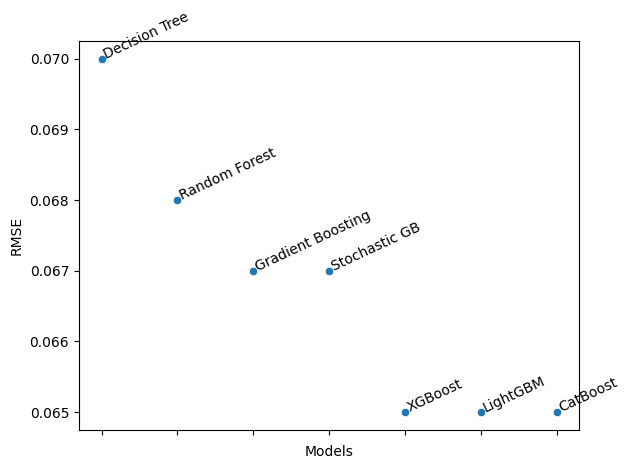

In [203]:
# Plot
chart = sns.scatterplot(x="Models", y="RMSE", markers="d",  data=df_models)
chart.set_xticklabels(chart.get_xticklabels(), rotation=25)
for i in range(len(df_models)):
    plt.text(df_models["Models"][i], df_models["RMSE"][i], df_models["Models"][i], rotation=25)
plt.tight_layout()
plt.savefig("plots/15models.png", dpi=100.)  
plt.show()
